<center>
    <h1><b>Heart Disease Prediction using Machine Learning Techniques</b></h1>
</center>

<p><b>Name:</b> Aashish Bansal</p>
<p><b>Registration No.:</b> 19BIT0346</p>
<p><b>Department:</b> Information Technology</p>
<p><b>School:</b> School of Information Technology and Engineering</p>


# Connecting to Data Source (Google Drive)

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


# Installing Libraries

In [ ]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Libraries

In [ ]:
from pyforest import *
lazy_imports()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Loading the Dataset

## About the Dataset

Source of Dataset : https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

In [ ]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/aashish22bansal/Heart-Disease-Prediction/main/data/framingham.csv")

# Exploratory Data Analysis

## Shape of the Dataset

In [ ]:
# Check number of columns and rows in data frame
#Shape of dataset

print ('Number of Examples :', df.shape[0], '\nNumber of Features : ', df.shape[1])

Number of Examples : 4238 
Number of Features :  16


In [ ]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

## Basic Information from the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Above results shows us that we've :
* (7) x int64 datatype attributes
* (9) x float64 datatype attributes.

## Basic Statistical Deductions

In [ ]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Descriptive Statistics :

* We can observe from above table that we have 123 examples.
* The Spread of Age is from 32 to 74.
* Resting blood pressure is distributed from 80 to 200 (in mm Hg).
* Similarly, thalach (maximum heart rate achieved) ranges from 60 to 182.
* While, oldpeak (ST depression induced by exercise relative to rest) values ranges from -2.60 to 3.70.

## Columns in the Dataset

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Data Visualization

## Plotting Data from all Columns

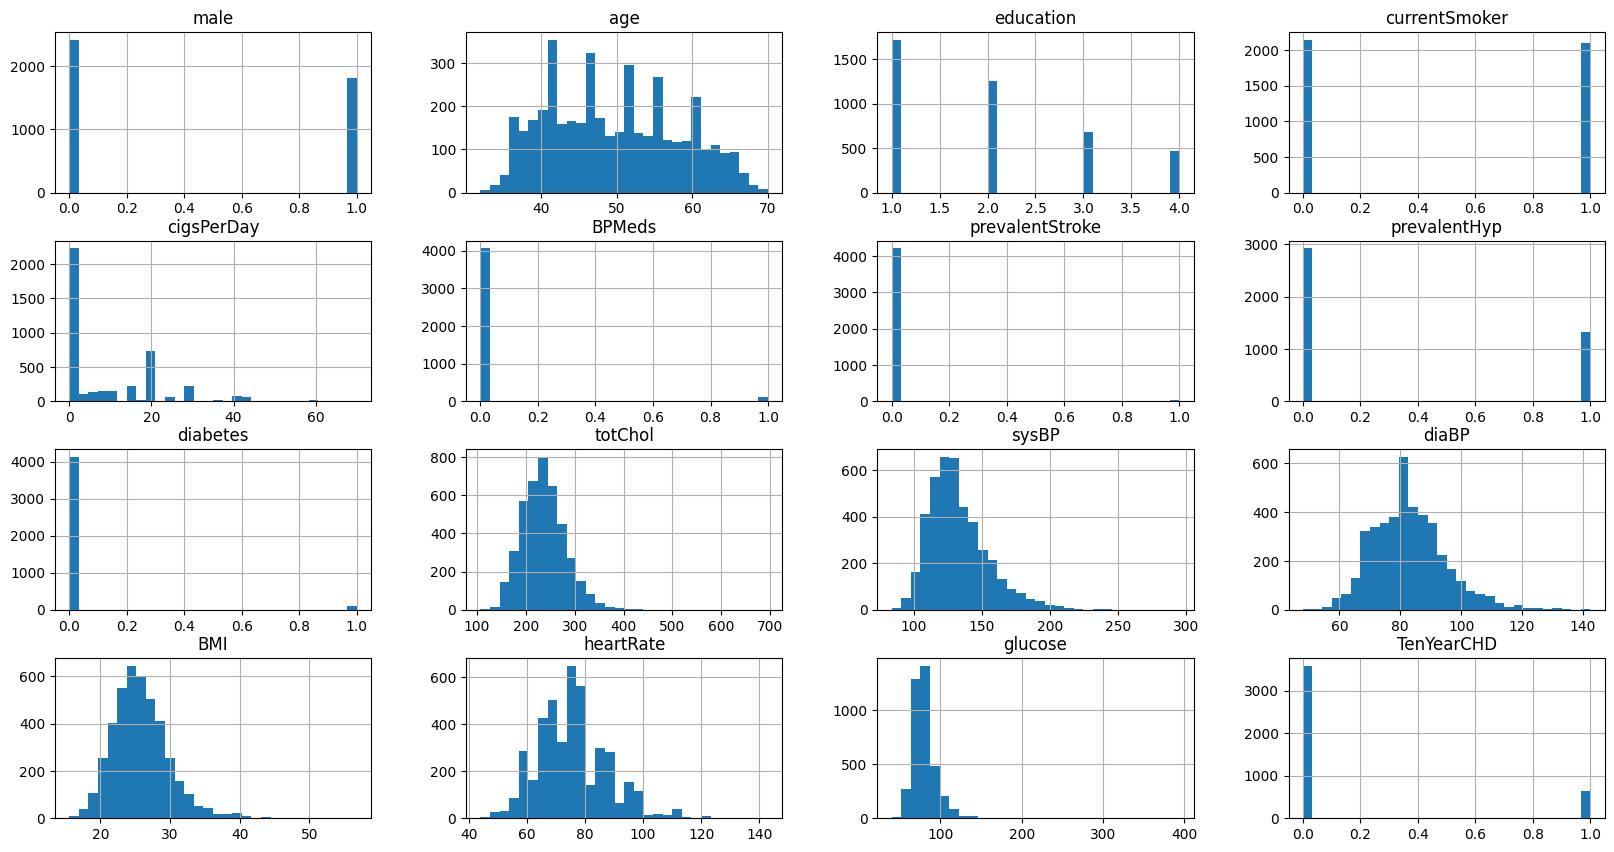

In [ ]:
#get familiar with the dataset 
df.hist(bins=30, 
        figsize=(20,40),
        layout=(15,4));

## Age Vs Heart Disease

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='TenYearCHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


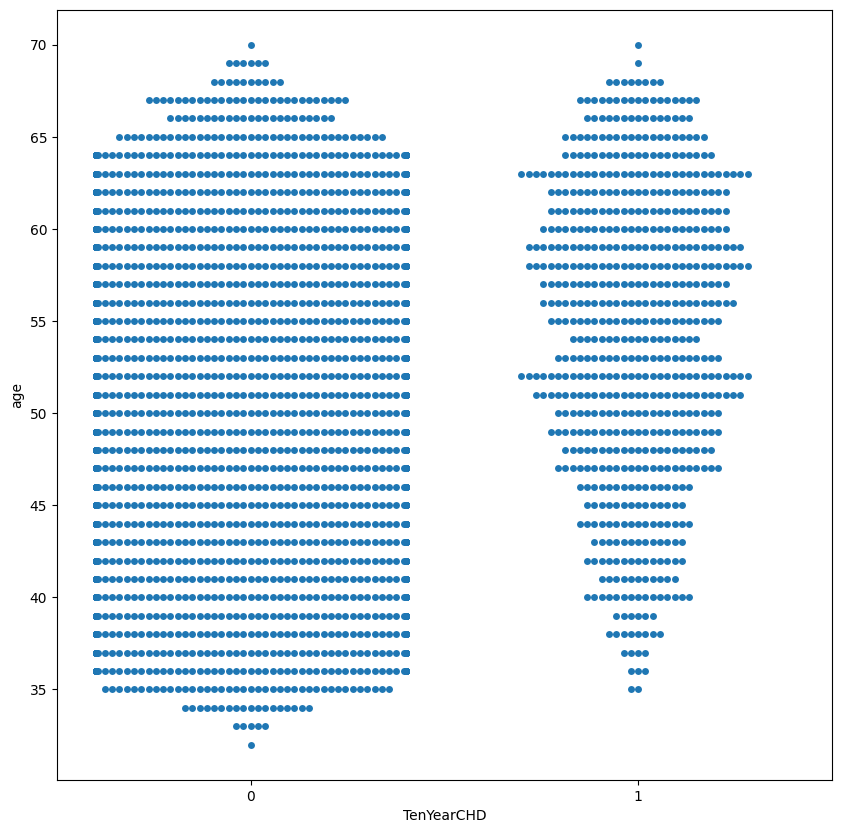

In [ ]:
# age vs CHD
plt.figure(figsize=(10,10))
sns.swarmplot(x='TenYearCHD', y='age', data=df)

<IPython.core.display.Javascript object>

<Axes: xlabel='TenYearCHD', ylabel='age'>

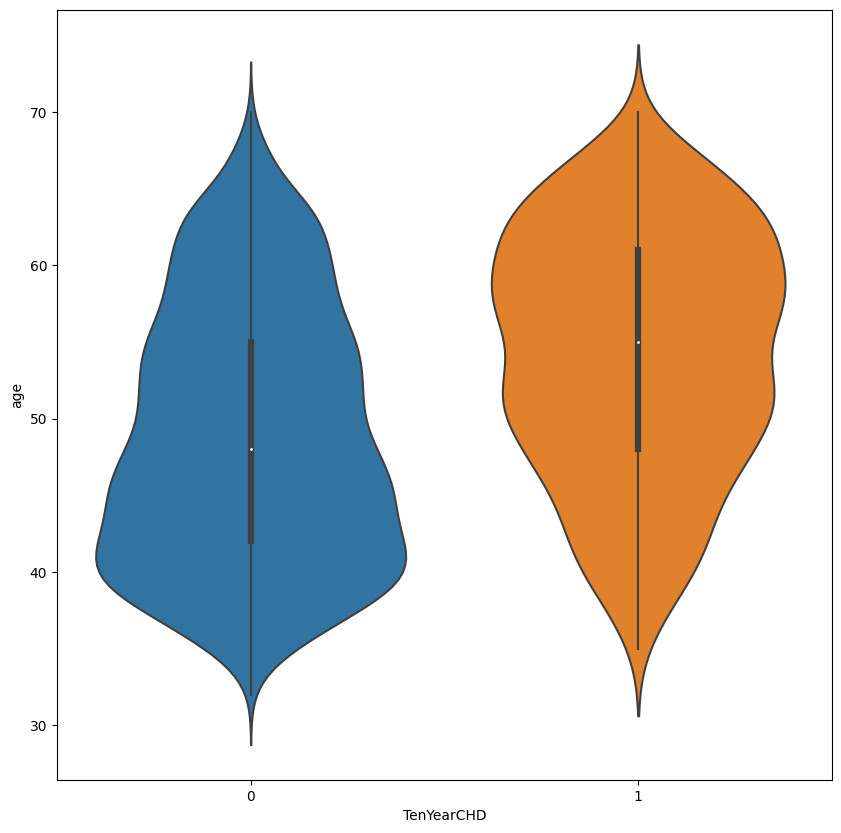

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=df)

Observations:
* Violinplot tells that most patients of age around 40-55 have 0 risk
* Most patients of age around 60-65 have risk of disease (CHD)

## Age vs Heart Disease for Smokers and Non-Smokers

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='TenYearCHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


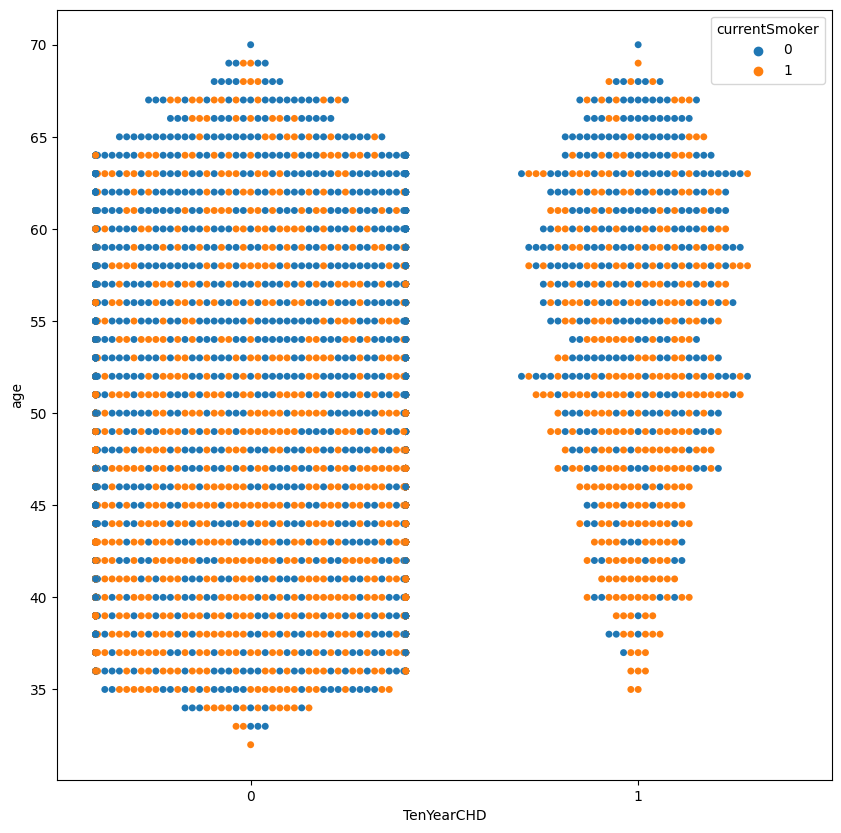

In [ ]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(10,10))
sns.swarmplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker')

<IPython.core.display.Javascript object>

<Axes: xlabel='TenYearCHD', ylabel='age'>

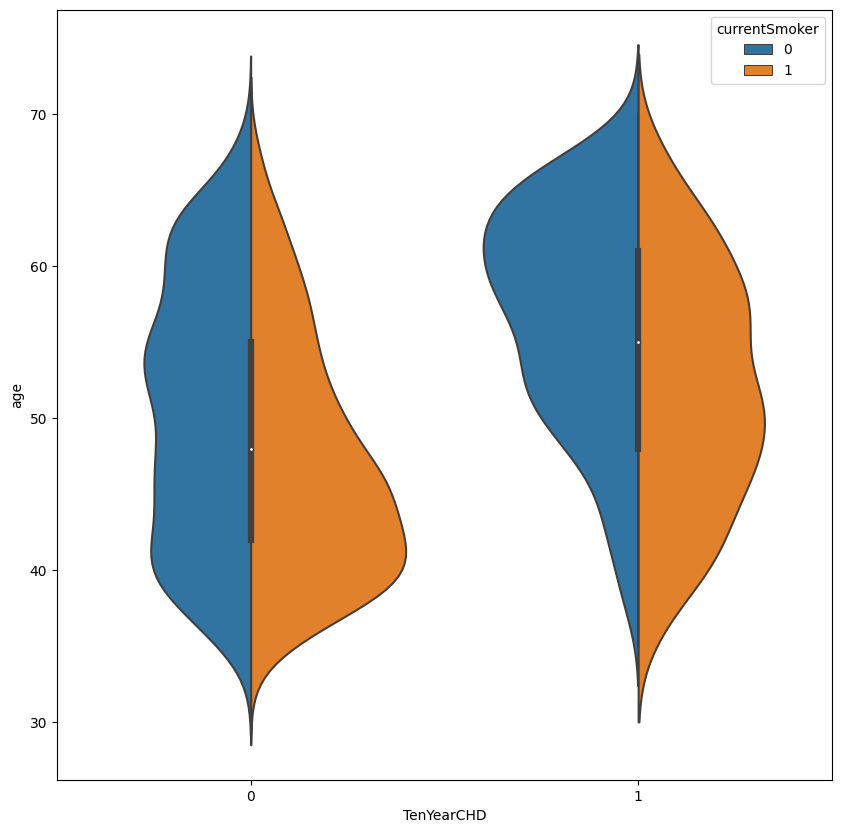

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker', split=True)

Observations:
* From this violinplot, we see that most of smokers having no risk of CHD are in age around 40 years
* But most of non-smokers having risk are in age around 65-70 years Also most smokers having risk are in age around 50 years

## Gender Count

<IPython.core.display.Javascript object>

<Axes: xlabel='male', ylabel='count'>

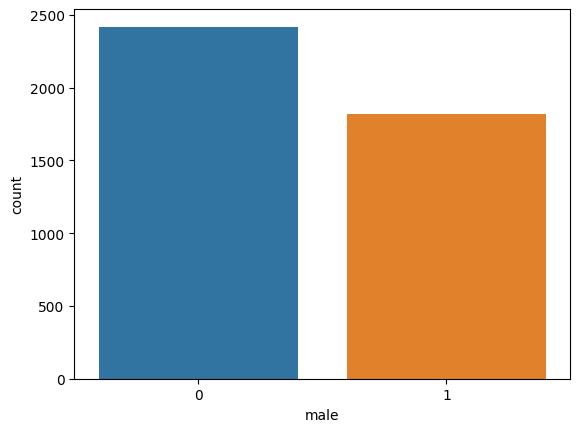

In [ ]:
# male and female countplot
sns.countplot(x=df['male'])

## Gender vs Heart Disease

<IPython.core.display.Javascript object>

<Axes: xlabel='male', ylabel='count'>

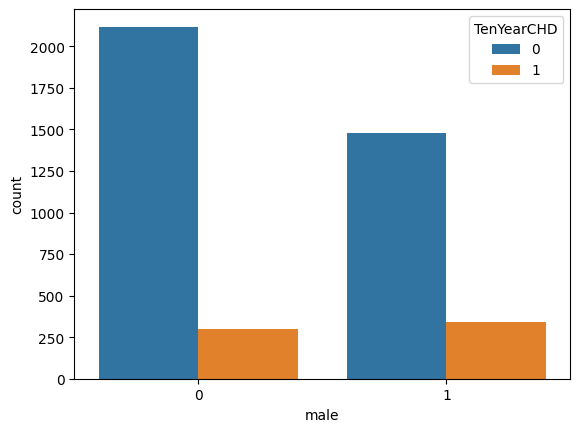

In [ ]:
# male and female having disease or not
sns.countplot(x=df['male'], hue=df['TenYearCHD'])

Observations:
* Here from the above countplot, we see that most data are females
* There are more females having no risk than males having no risk
* There are slightly more males having risk than females having risk

In [ ]:
df.iloc[:,:5]

male  age  education  currentSmoker  cigsPerDay
0        1   39        4.0              0         0.0
1        0   46        2.0              0         0.0
2        1   48        1.0              1        20.0
3        0   61        3.0              1        30.0
4        0   46        3.0              1        23.0
...    ...  ...        ...            ...         ...
4233     1   50        1.0              1         1.0
4234     1   51        3.0              1        43.0
4235     0   48        2.0              1        20.0
4236     0   44        1.0              1        15.0
4237     0   52        2.0              0         0.0

[4238 rows x 5 columns]

## Understanding Correlation

<IPython.core.display.Javascript object>

<Figure size 2000x1500 with 0 Axes>

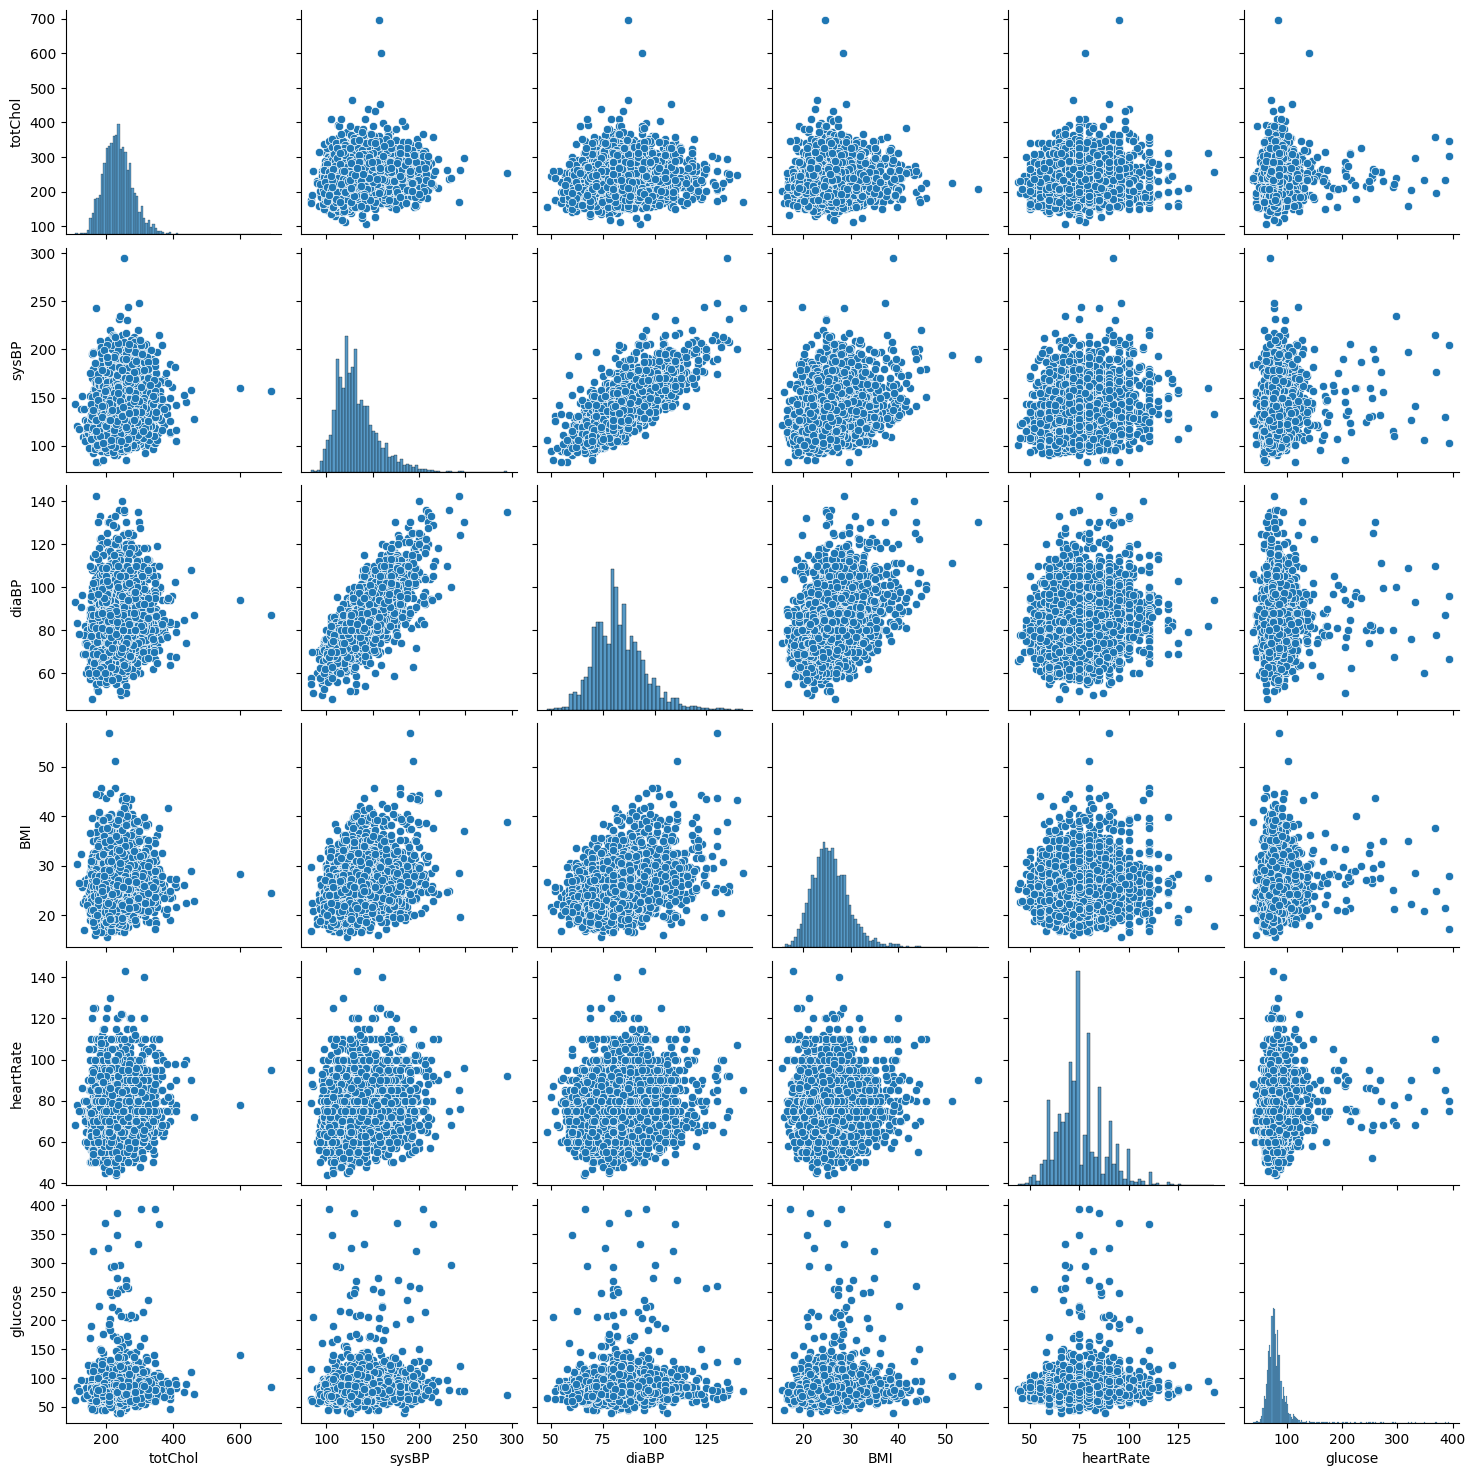

In [ ]:
# To understand correlation between some features, pairplot is used
plt.figure(figsize=(20,15))
sns.pairplot(df.loc[:,'totChol': 'glucose'])

<IPython.core.display.Javascript object>

<Axes: >

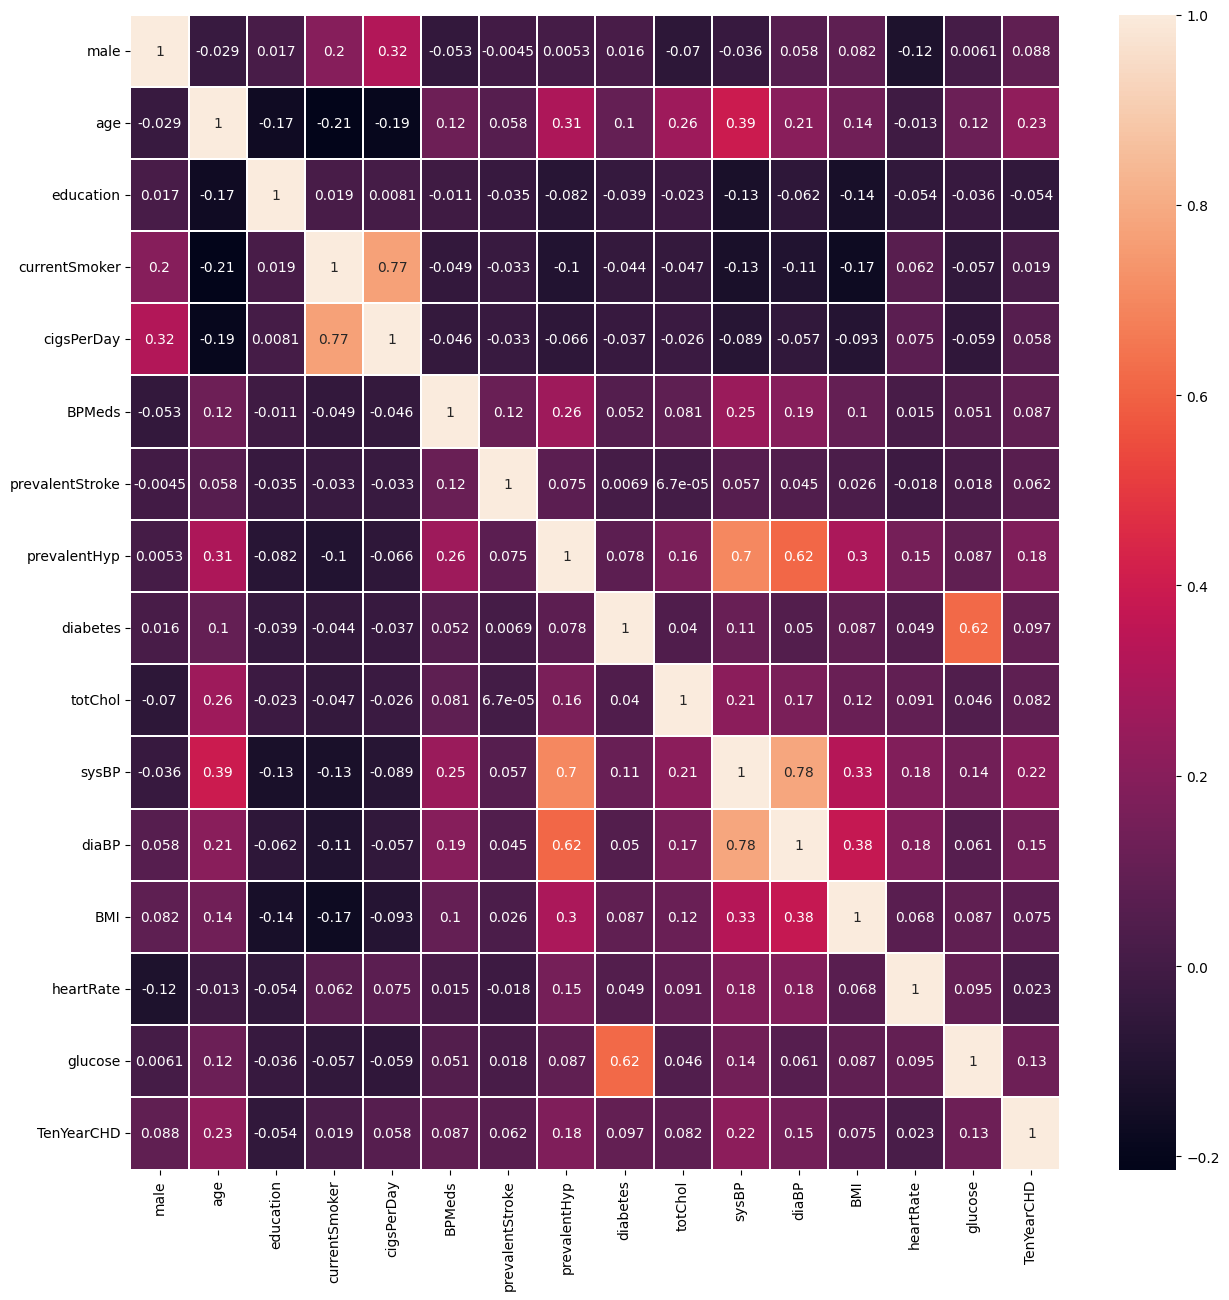

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

Observations:
* From pairplot and heatmap we see that sysBP and diaBP are highly correlated
* And currentSmoker and cigsPerDay are highly correlated

In [ ]:
# dropping features which are highly correlated
# features_to_drop = ['currentSmoker', 'diaBP']

# df.drop(features_to_drop, axis=1, inplace=True)

# Data Cleaning and Preparation

In [ ]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
# df.drop('education', axis=1, inplace=True)

In [ ]:
# renaming TenYearCHD to CHD
df.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [ ]:
# Check 5 rows of data set
df.head() 

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   CHD  
0    0  
1    0  
2    0  
3    1  
4    0

## Scaling data

### Checking the Scale

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


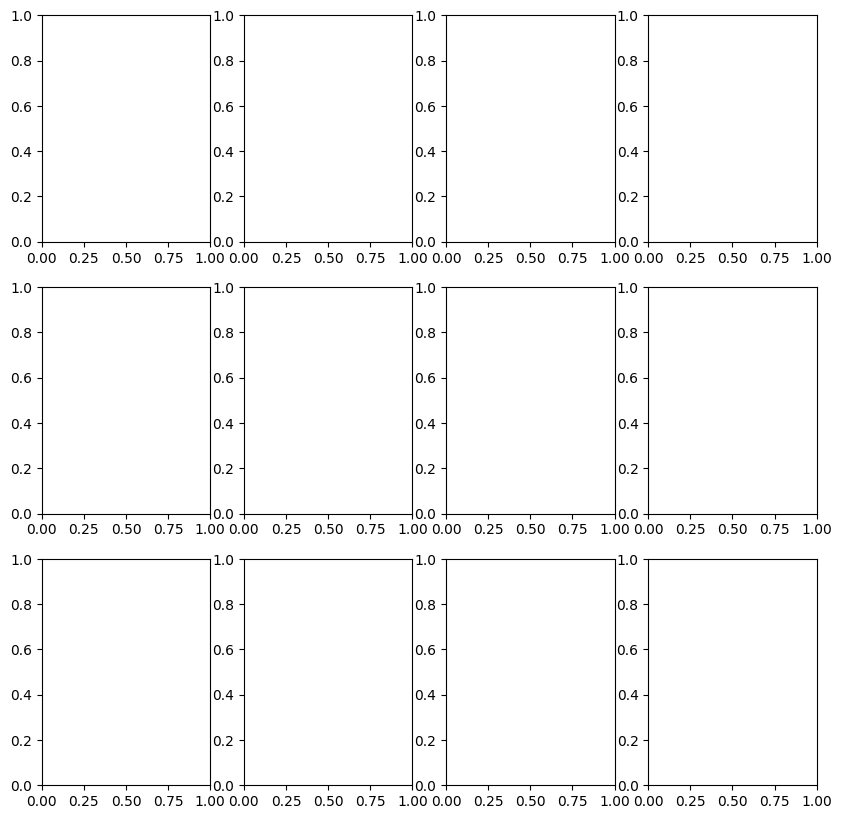

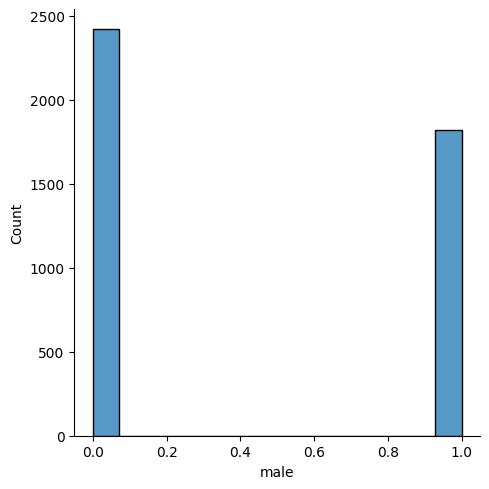

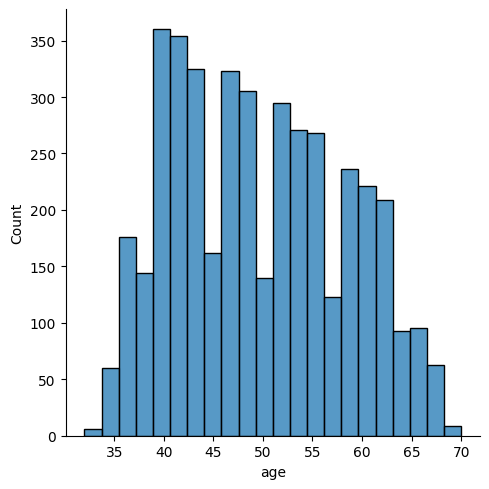

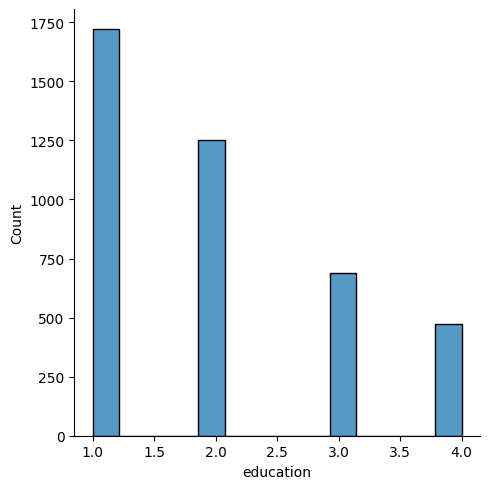

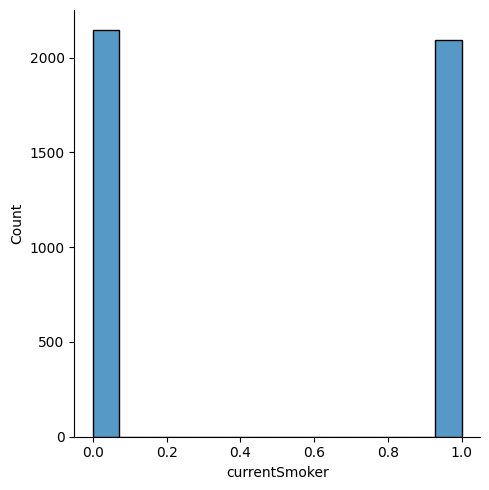

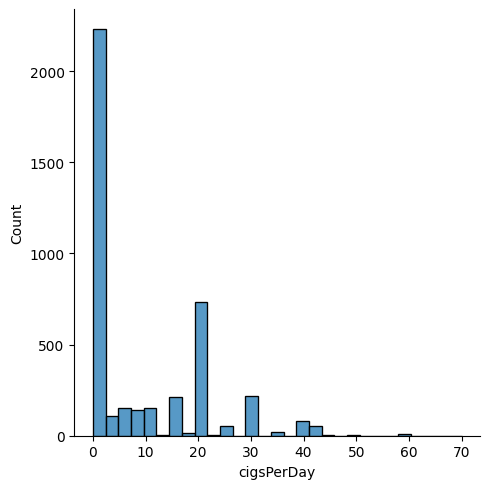

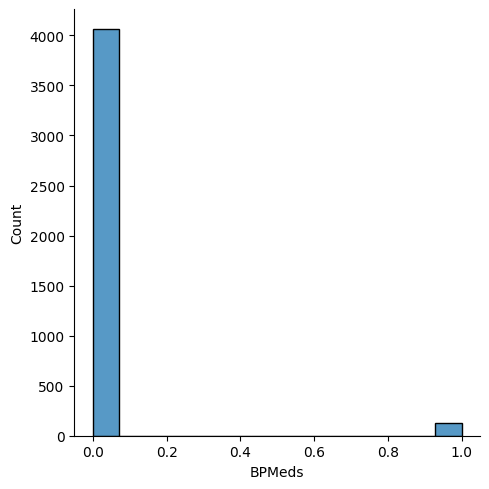

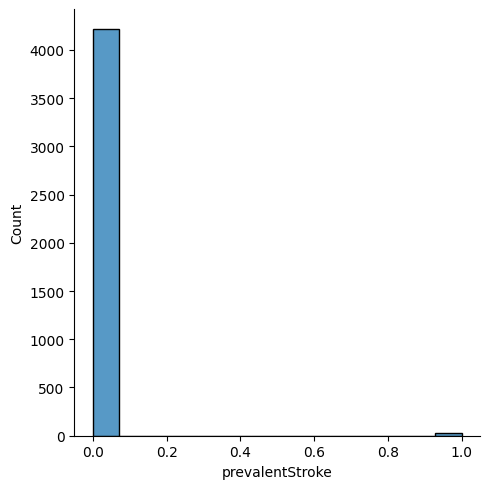

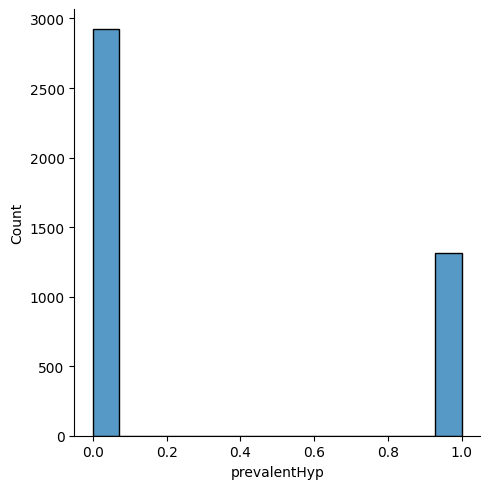

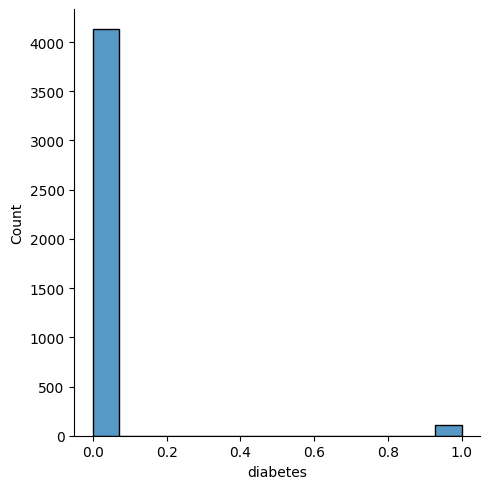

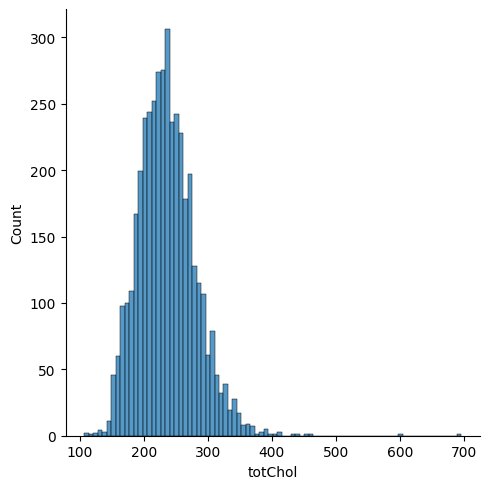

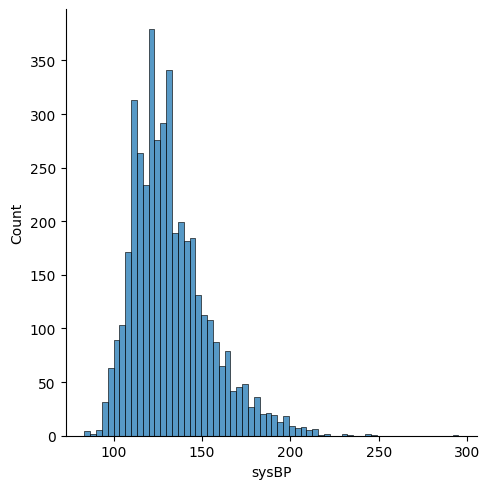

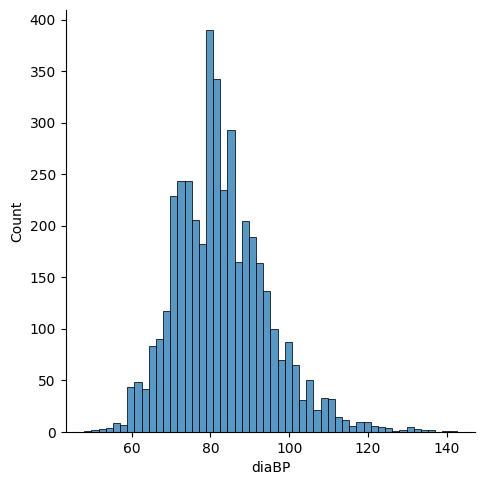

In [ ]:
# Normalization Checking
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df.items():
    sns.displot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

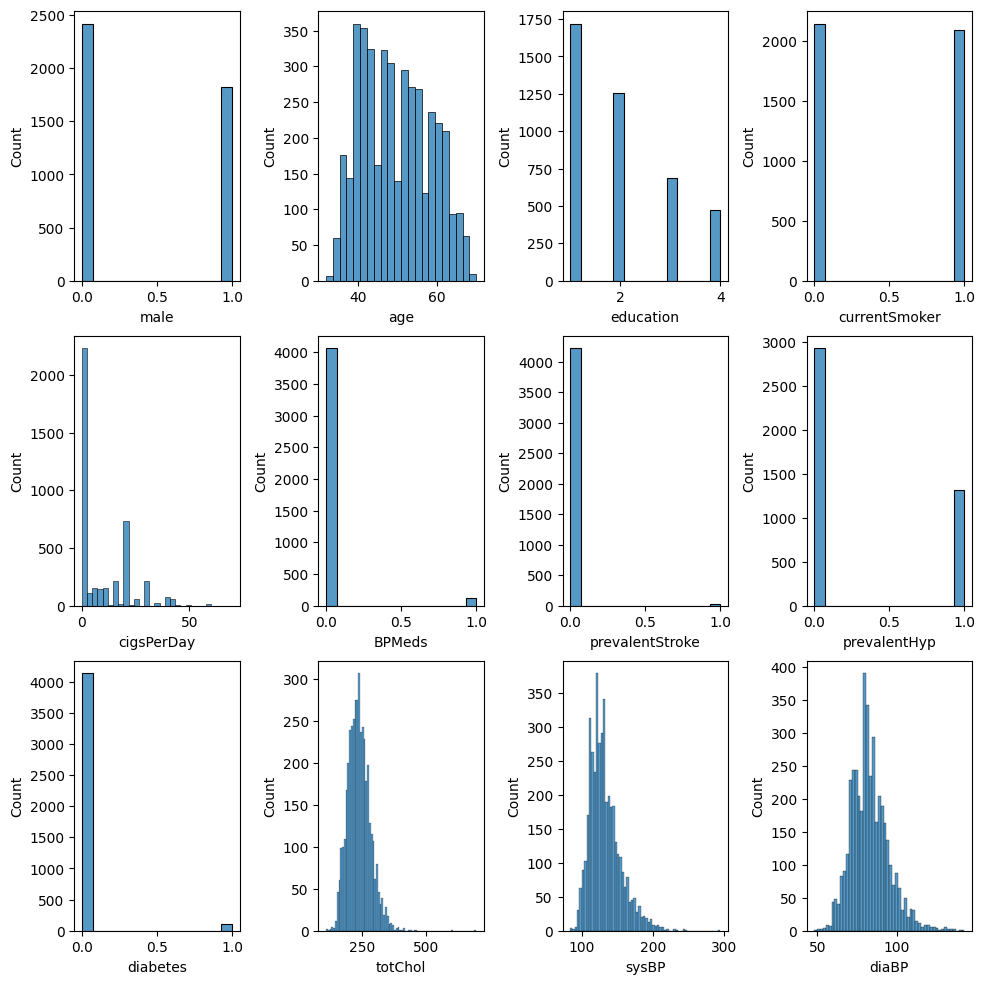

In [ ]:
# Normalization Checking
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df.items():
    sns.histplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

### Obtaining Discrete and Continous Columns

In [ ]:
# check for column that is not discrete to scale data

#all-columns list
df_all_colum=list(df.columns)

# discrete/categorical column list
discrete_cols=list(df.columns[df.round(decimals=0).isin([0,1]).all()])
discrete_cols.append('education')
discrete_cols.append('BPMeds')

#continuous column list
continuous_cols=list()
for i in df_all_colum:
    if i not in discrete_cols:
        if i not in['education', 'BPMeds']:
            continuous_cols.append(i)

In [ ]:
#check if the two list are correct
print('Discrete cols: ', discrete_cols)

Discrete cols:  ['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'CHD', 'education', 'BPMeds']


In [ ]:
print('Continuous cols:', continuous_cols)

Continuous cols: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

#scale continuous columns data
array_scaled = scaler.fit_transform(df[continuous_cols])

#turn array scaled to dataframe 
df_scaled_cols = pd.DataFrame(array_scaled, columns = [df[continuous_cols]])

#create a complete scaled data
df_scaled = df[df_all_colum]
df_scaled[continuous_cols] = df_scaled_cols[continuous_cols]

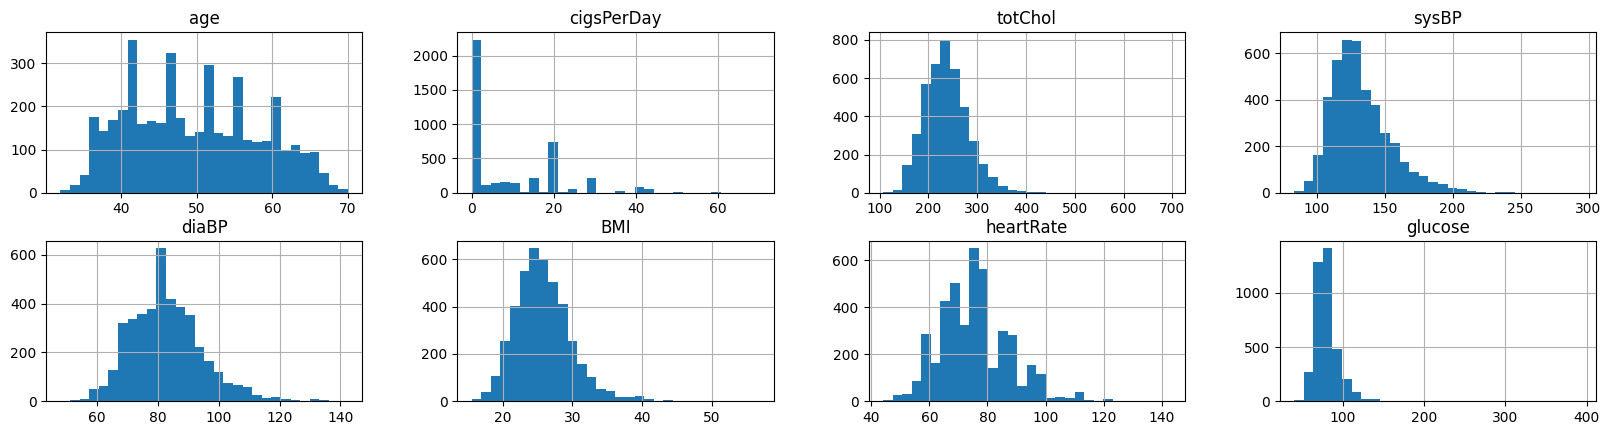

In [ ]:
#datafram before scaling
df[continuous_cols].hist(bins=30, 
                         figsize=(20,40),
                         layout=(15,4)
                        );

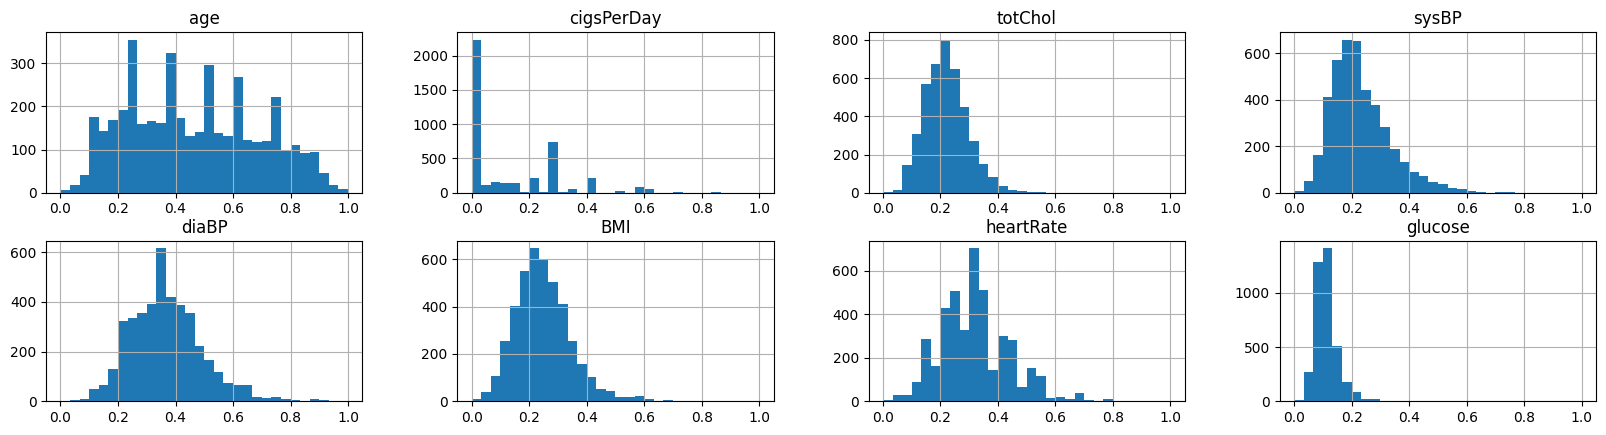

In [ ]:
#datafram after scaling
df_scaled[continuous_cols].hist(bins=30, 
                                figsize=(20,40),
                                layout=(15,4)
                                );

### StandardScaler

In [ ]:
# # Standardise some features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cols_to_standardise = ['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']
# train_data[cols_to_standardise] = scaler.fit_transform(train_data[cols_to_standardise])

In [ ]:
# #datafram before scaling
# df[continuous_cols].hist(bins=30, 
#                          figsize=(20,40),
#                          layout=(15,4)
#                         );

In [ ]:
# #datafram after scaling
# df_scaled[continuous_cols].hist(bins=30, 
#                                 figsize=(20,40),
#                                 layout=(15,4)
#                                 );

## Handling duplicate data 

In [ ]:
df_scaled.drop_duplicates()

male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1  0.184211        4.0              0    0.000000     0.0   
1        0  0.368421        2.0              0    0.000000     0.0   
2        1  0.421053        1.0              1    0.285714     0.0   
3        0  0.763158        3.0              1    0.428571     0.0   
4        0  0.368421        3.0              1    0.328571     0.0   
...    ...       ...        ...            ...         ...     ...   
4233     1  0.473684        1.0              1    0.014286     0.0   
4234     1  0.500000        3.0              1    0.614286     0.0   
4235     0  0.421053        2.0              1    0.285714     NaN   
4236     0  0.315789        1.0              1    0.214286     0.0   
4237     0  0.526316        2.0              0    0.000000     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0  0.149406  0.106383  0.232804   
1                   0             0         0  0.242784  0.177305  0.349206   
2                   0             0         0  0.234295  0.208038  0.338624   
3                   0             1         0  0.200340  0.314421  0.497354   
4                   0             0         0  0.302207  0.219858  0.380952   
...               ...           ...       ...       ...       ...       ...   
4233                0             1         0  0.349745  0.451537  0.465608   
4234                0             0         0  0.169779  0.203310  0.338624   
4235                0             0         0  0.239389  0.224586  0.253968   
4236                0             0         0  0.174873  0.203310  0.412698   
4237                0             0         0  0.275042  0.236407  0.370370   

           BMI  heartRate   glucose  CHD  
0     0.277024   0.363636  0.104520    0  
1     0.319680   0.515152  0.101695    0  
2     0.237518   0.313131  0.084746    0  
3     0.316045   0.212121  0.177966    1  
4     0.183228   0.414141  0.127119    0  
...        ...        ...       ...  ...  
4233  0.252787   0.222222  0.129944    1  
4234  0.101066   0.212121  0.079096    0  
4235  0.156568   0.404040  0.129944    0  
4236  0.087736   0.424242       NaN    0  
4237  0.143723   0.363636  0.189266    0  

[4238 rows x 16 columns]

## Handling missing data
Missing values can be done before EDA or after EDA. But before EDA, it will impute or drop missing values for all features, whether some features are needed or not

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_scaled.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64

In [ ]:
#check if there are any null value in dataset 
df_scaled.isnull().sum() 

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64

In [ ]:
df_scaled.isnull().sum().sum()

645

In [ ]:
missing_values_count = df_scaled.isnull().sum() 
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = (missing_values_count * 100) / (df_scaled.shape[0])
print("The Percentage of Missing Values for the Columns are:")
print(missing_values_percent)

The Percentage of Missing Values for the Columns are:
education     2.477584
cigsPerDay    0.684285
BPMeds        1.250590
totChol       1.179802
BMI           0.448325
heartRate     0.023596
glucose       9.155262
dtype: float64


Percent Missing Values :

1.62% trestbps
60.9% fbs
0.81% restecg
0.81% thalach
0.81% exang
4.87% oldpeak
13.8% slope
95.9% ca
42.2% thal
We'll Fill NAN's of all features with median values of that particular feature because mean / average filling values approach won't make any sense since we've discrete values in some features.

One can also try Backward / Forward fill method.

We can observe that fbs and ca has 60.9% and 95.9% missing values respectively so we can drop these features.

Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.

In [ ]:
print("Maximum missing percentage is {} and hence Imputation is required.".format(max(missing_values_percent)))

Maximum missing percentage is 9.155261915998112 and hence Imputation is required.


'\nthe visualization(matrix) does not show any obvious pattern or cluster in the missing \nvalues, hence, we assume that our data is missing completely at random(MCAR)\n'

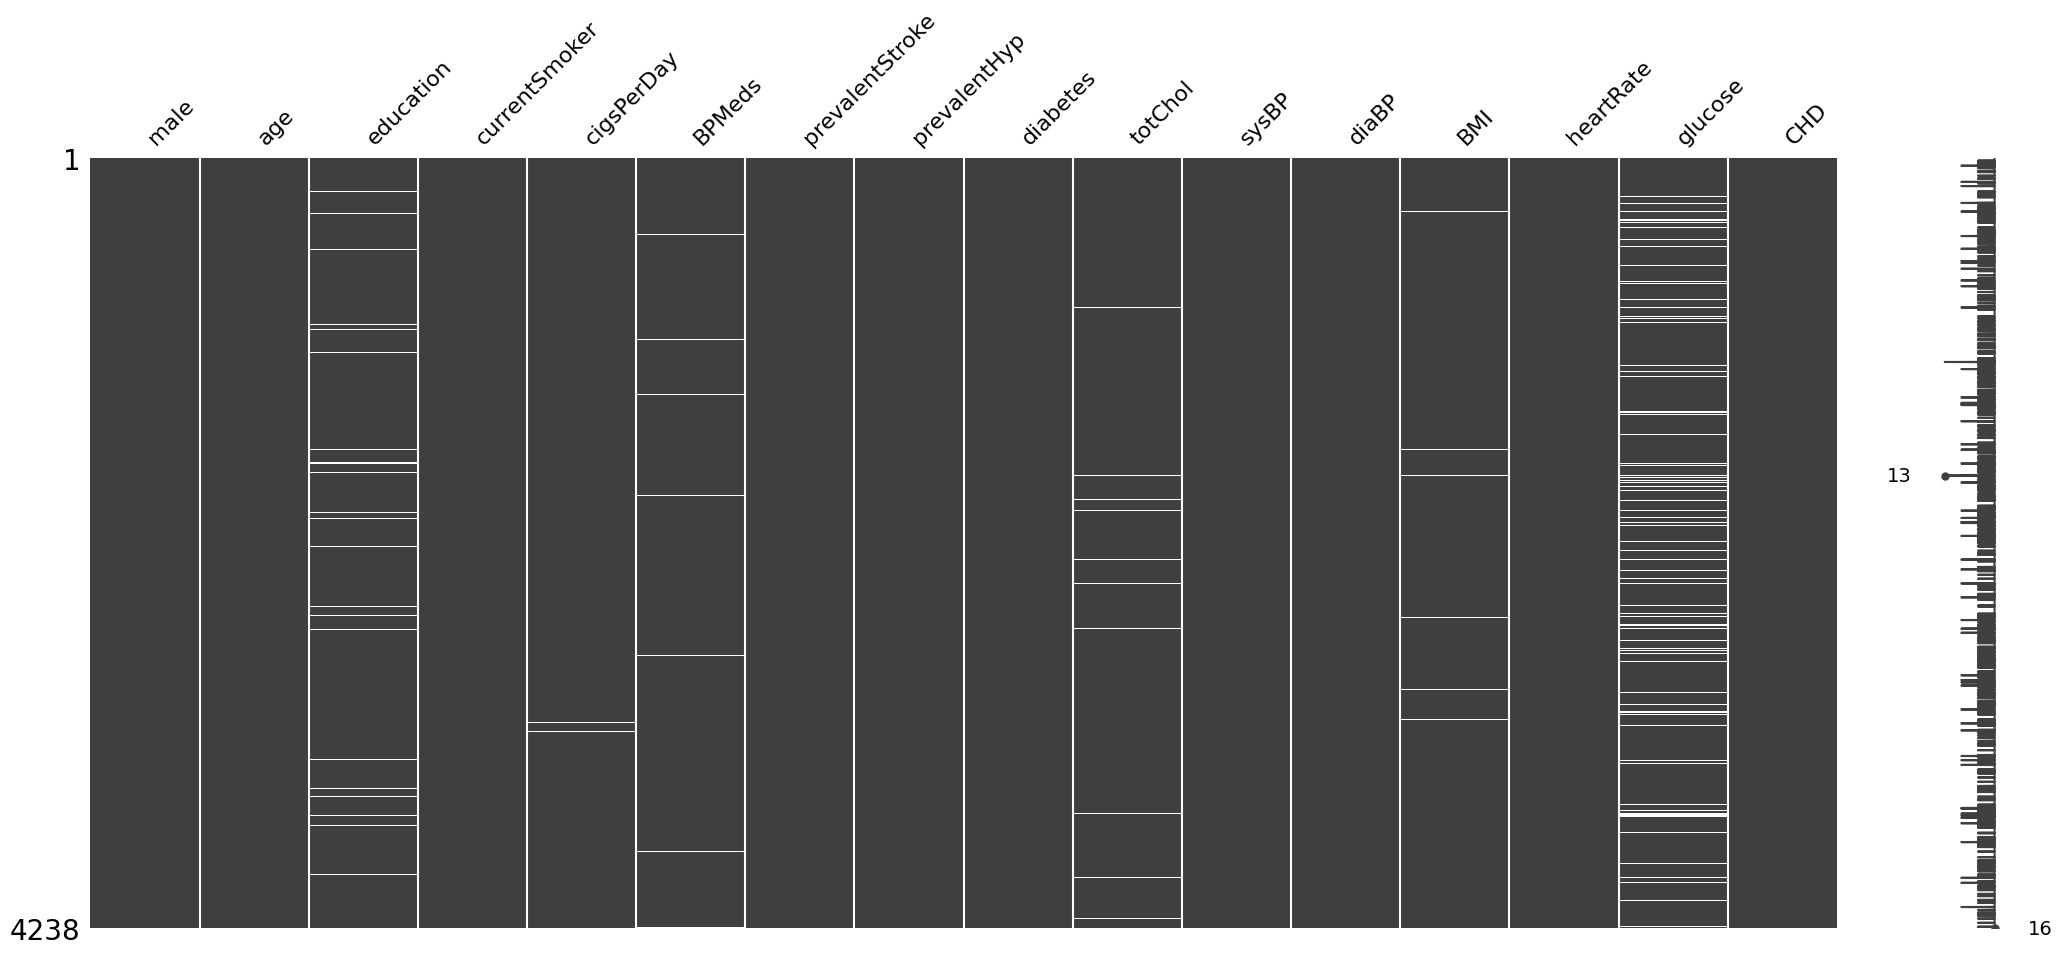

In [ ]:
#see if there is any pattern in missing values 
import missingno as msno
msno.matrix(df_scaled)

'''
the visualization(matrix) does not show any obvious pattern or cluster in the missing 
values, hence, we assume that our data is missing completely at random(MCAR)
'''

'\nThere seem to be an insignificant correlation between our missing value in colum(tochol)\nand column(heartRate). Thus, this reinforce our assumption that our missing value is missing completely \nat random (MCAR)\n'

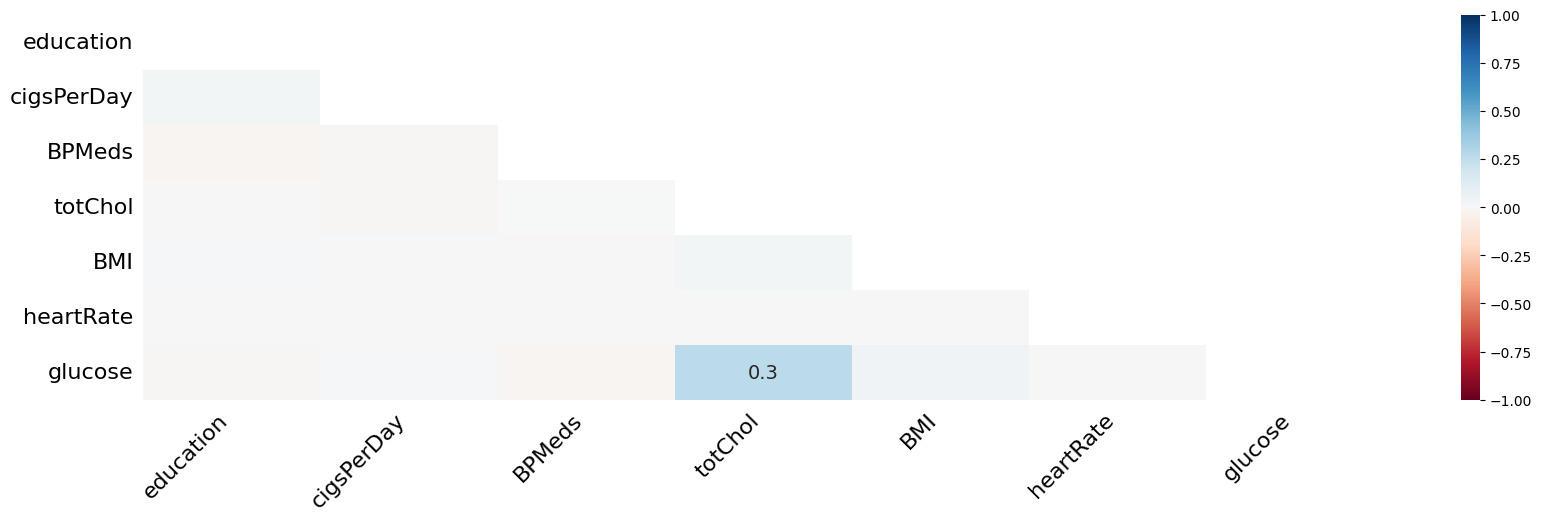

In [ ]:
#see if there is any correlation between missing values 
msno.heatmap(df_scaled, figsize=(20, 5))
'''
There seem to be an insignificant correlation between our missing value in colum(tochol)
and column(heartRate). Thus, this reinforce our assumption that our missing value is missing completely 
at random (MCAR)
'''

### SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
new_train_data_simple_imputer = pd.DataFrame(imputer.fit_transform(df_scaled))
new_train_data_simple_imputer.columns = df_scaled.columns
new_train_data_simple_imputer.index = df_scaled.index

<Axes: >

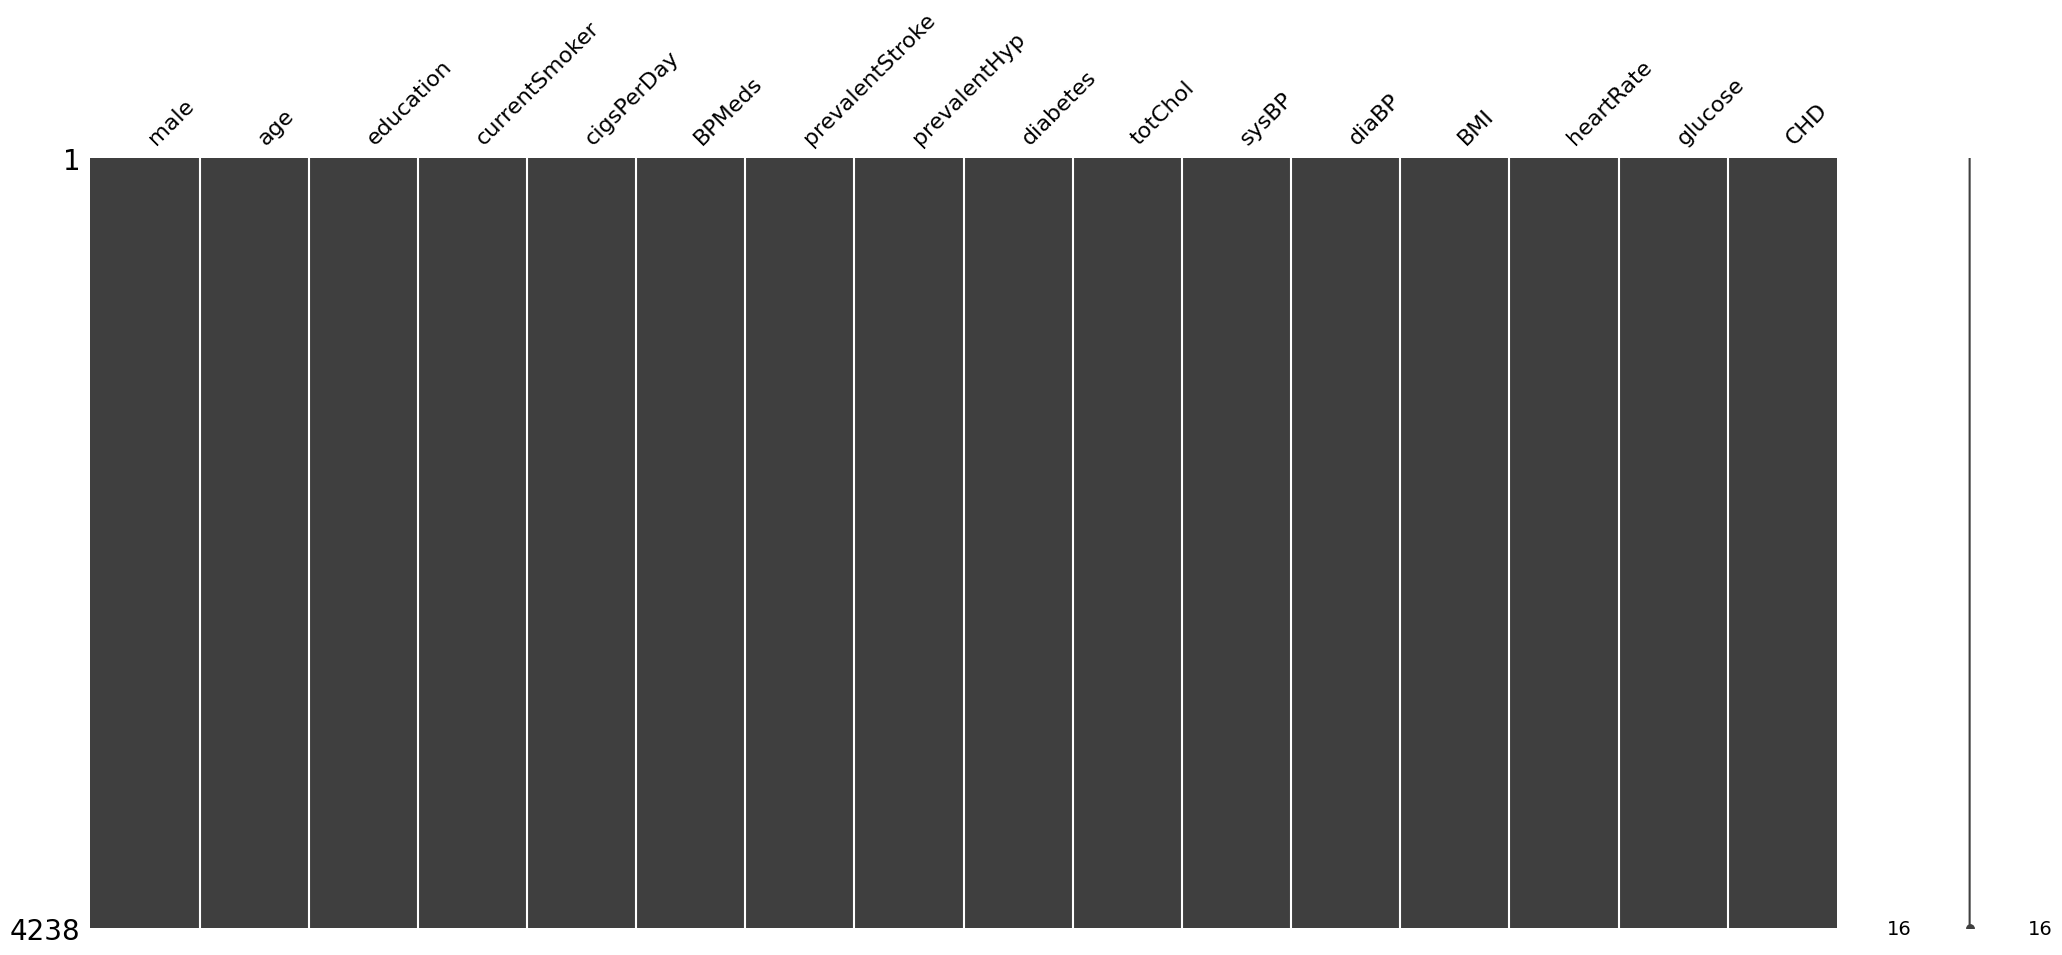

In [ ]:
#visualize to see if there are still missing data
msno.matrix(new_train_data_simple_imputer)

In [ ]:
# Data before Imputation
df_scaled.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64

In [ ]:
# Data after Imputation
new_train_data_simple_imputer.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CHD                0
dtype: int64

In [ ]:
new_train_data_simple_imputer.head()

male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0   1.0  0.184211        4.0            0.0    0.000000     0.0   
1   0.0  0.368421        2.0            0.0    0.000000     0.0   
2   1.0  0.421053        1.0            1.0    0.285714     0.0   
3   0.0  0.763158        3.0            1.0    0.428571     0.0   
4   0.0  0.368421        3.0            1.0    0.328571     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0              0.0           0.0       0.0  0.149406  0.106383  0.232804   
1              0.0           0.0       0.0  0.242784  0.177305  0.349206   
2              0.0           0.0       0.0  0.234295  0.208038  0.338624   
3              0.0           1.0       0.0  0.200340  0.314421  0.497354   
4              0.0           0.0       0.0  0.302207  0.219858  0.380952   

        BMI  heartRate   glucose  CHD  
0  0.277024   0.363636  0.104520  0.0  
1  0.319680   0.515152  0.101695  0.0  
2  0.237518   0.313131  0.084746  0.0  
3  0.316045   0.212121  0.177966  1.0  
4  0.183228   0.414141  0.127119  0.0

In [ ]:
# df_scaled_simple = new_train_data_simple_imputer.copy()

### IterativeImputer

In [ ]:
#As we confirm that our missing value is MCAR, we will use iterative imputing to fill in NA value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#iterative imputer module, impute on the scaled dataset
imputer = IterativeImputer()
df_impute = imputer.fit_transform(df_scaled)

#impute dataframe 
df_impute = pd.DataFrame(data=df_impute, columns=df.columns)

In [ ]:
#double check for missing value
df_impute.isnull().values.any()

False

<Axes: >

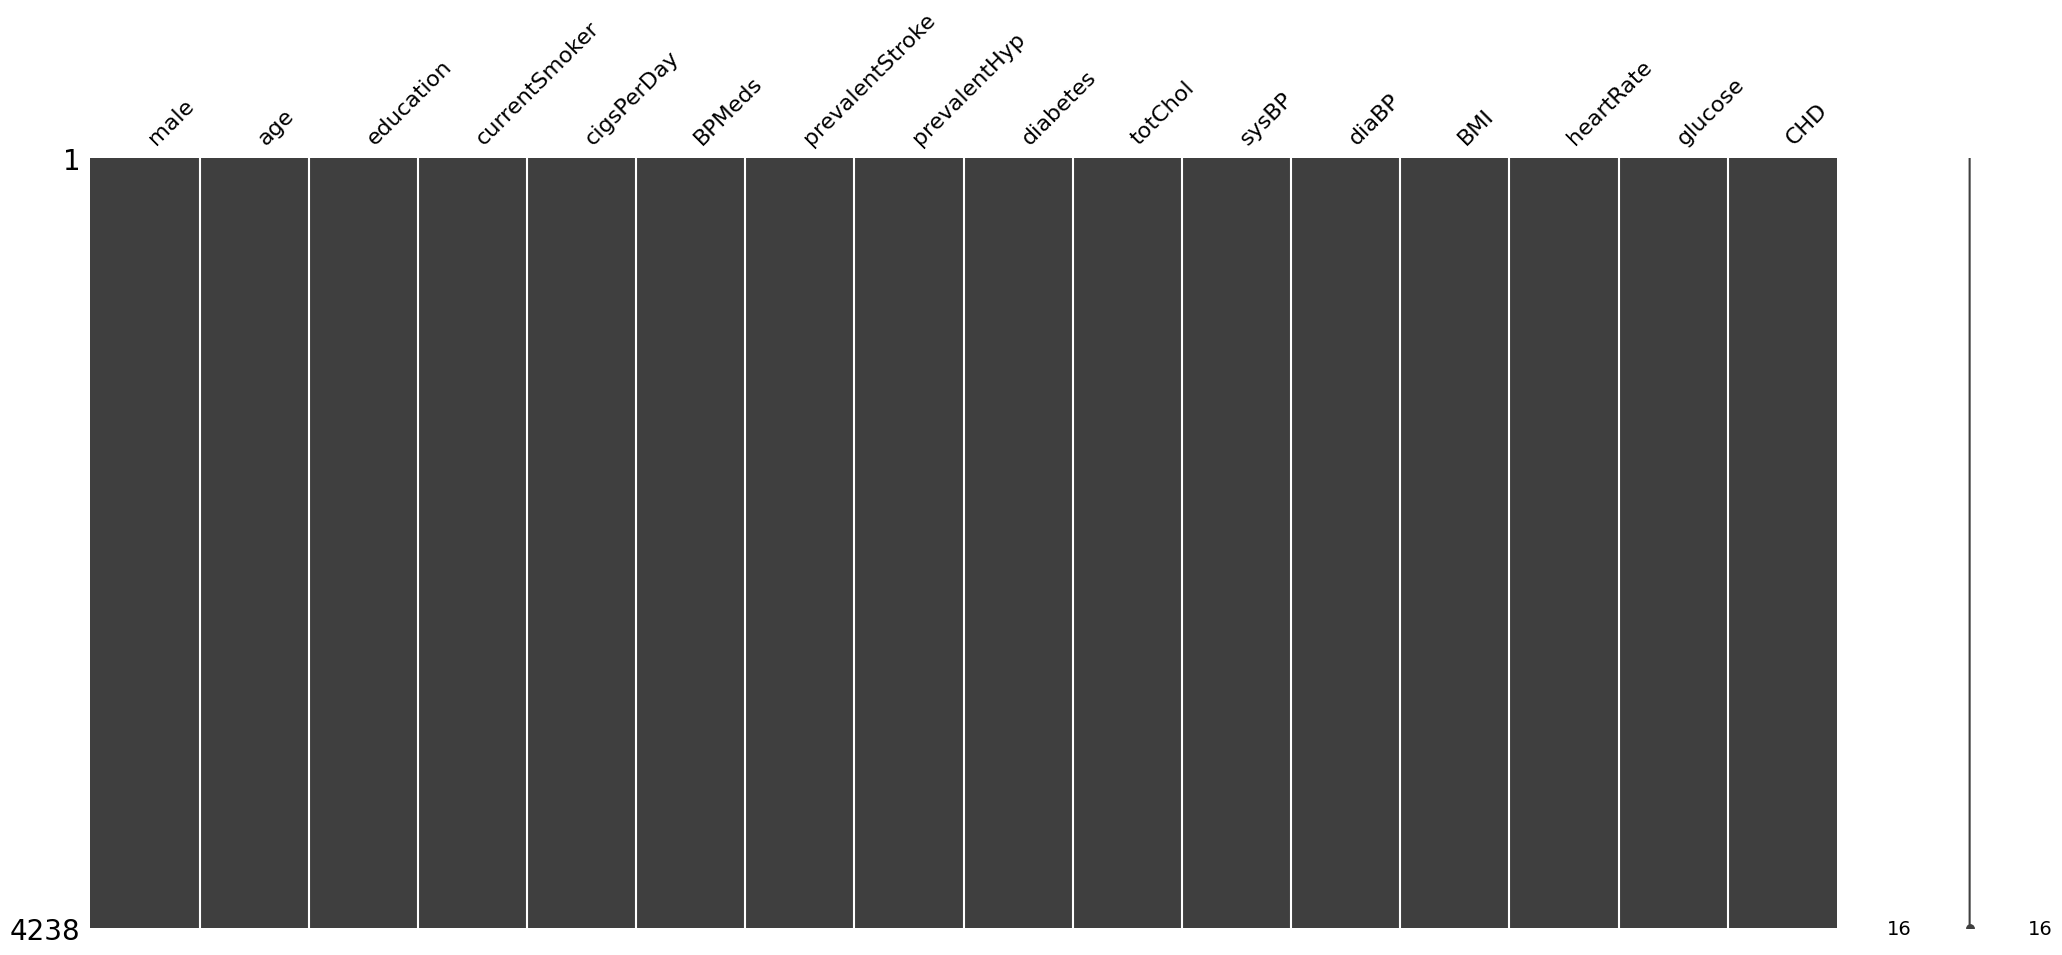

In [ ]:
#visualize to see if there are still missing data
msno.matrix(df_impute)

In [ ]:
#after imputing, sometime data isn't rounded correctly
#BPMeds  
df_impute['BPMeds'] = df_impute['BPMeds'].round(decimals=0) 
df_impute['BPMeds'].value_counts()
#education  
# df_impute['education'] = df_impute['education'].round(decimals=0) 
# df_impute['education'].value_counts()

0.0    4114
1.0     124
Name: BPMeds, dtype: int64

## Handling ouliers

In [ ]:
from sklearn.model_selection import train_test_split

#Separate label (y) and predictor (X)
X = df_impute.drop('CHD', axis=1)
y = df_impute['CHD']

#Split the data set for winsorization (onliy winsorize on the train set and NOT on the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#check 
print('X_train:',X_train.shape,', X_test:', X_test.shape)

X_train: (3390, 15) , X_test: (848, 15)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

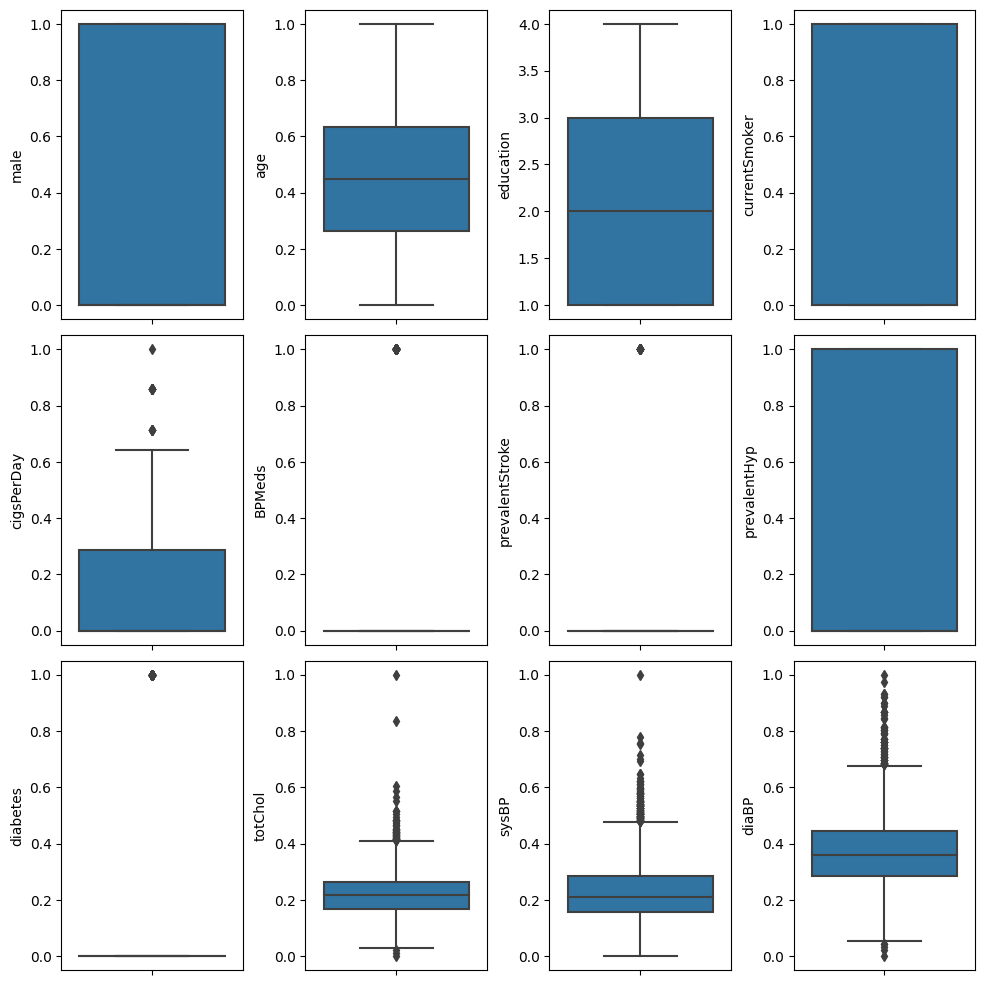

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in df_impute.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

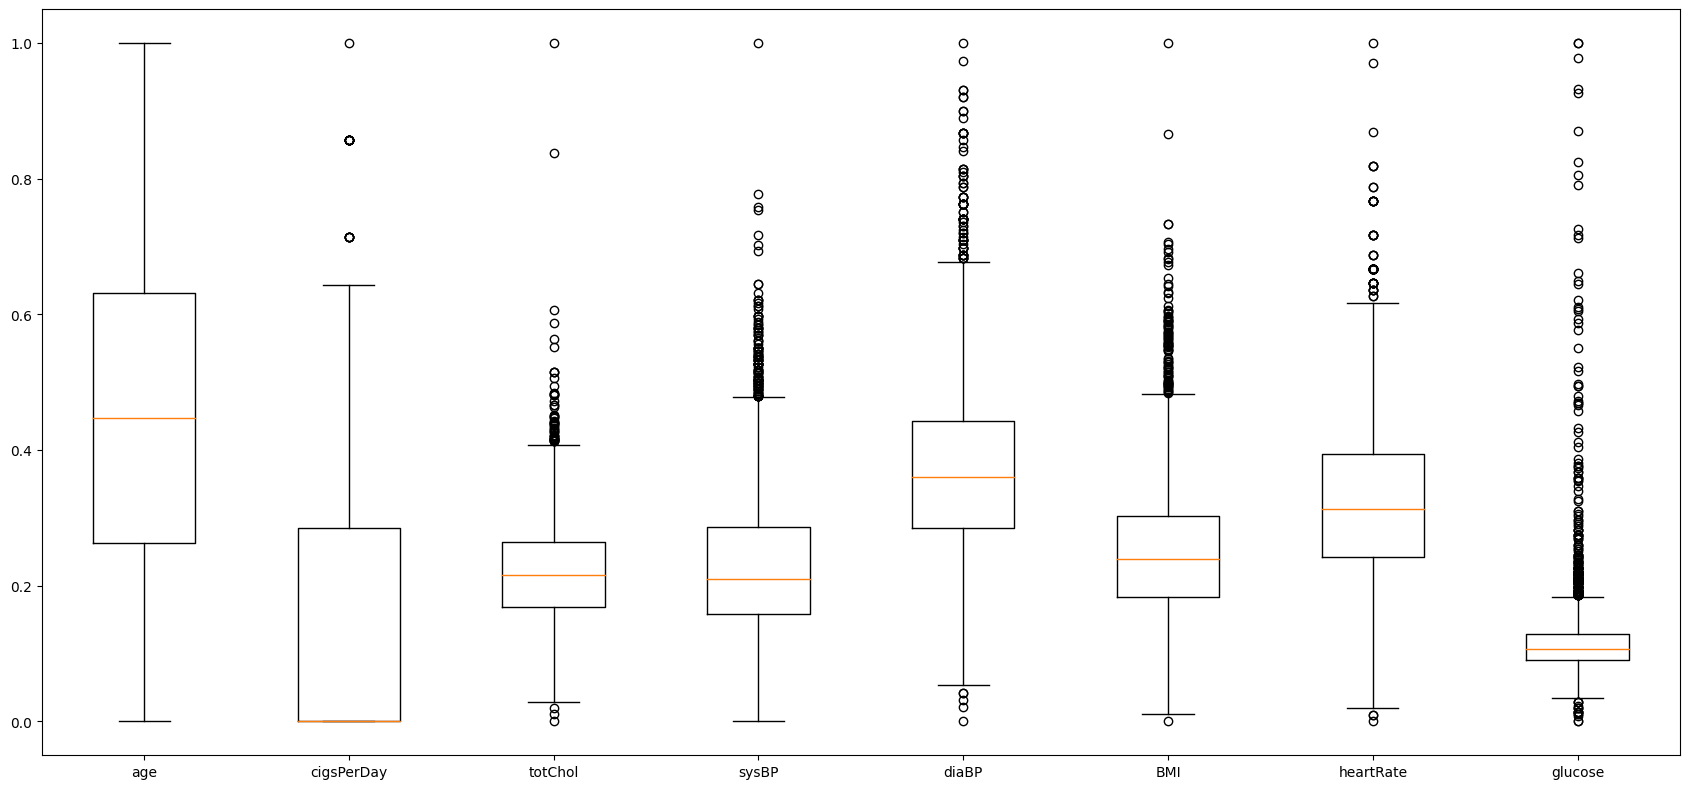

In [ ]:
#visualize outlier (before winsorization)
plt.rcParams["figure.figsize"] = [17, 8]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(x=df_impute[continuous_cols]);
plt.xticks(ticks=range(1,9), labels=np.array(continuous_cols));

Conclusion of Boxplot :

Outliers found in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [ ]:
# for i in df.columns: 
#     sns.countplot(df[i], hue = df['TenYearCHD'], palette = 'Set1')
#     plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
from scipy.stats import mstats

# df_winzore = df_impute
#Winzorize the 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' , 'cigPerDay' columns
totChol_wins = mstats.winsorize(X_train['totChol'], limits=[0.02, 0.009])
sysBP_wins = mstats.winsorize(X_train['sysBP'], limits=[0.02, 0.03])
diaBP_wins = mstats.winsorize(X_train['diaBP'], limits=[0.02, 0.01])
BMI_wins = mstats.winsorize(X_train['BMI'], limits=[0.02, 0.01])
heartRate_wins = mstats.winsorize(X_train['heartRate'], limits=[0.03, 0.01])
glucose_wins = mstats.winsorize(X_train['glucose'], limits=[0.02, 0.02])
cigsPerDay_wins = mstats.winsorize(X_train['cigsPerDay'], limits=[0.02, 0.01])

# Add the winsorized 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'Glucose' columns back to the train DataFrame
X_train['totChol'] = totChol_wins
X_train['sysBP'] = sysBP_wins
X_train['diaBP'] = diaBP_wins
X_train['BMI'] = BMI_wins
X_train['heartRate'] = heartRate_wins
X_train['glucose'] =glucose_wins
X_train['cigsPerDay'] =cigsPerDay_wins


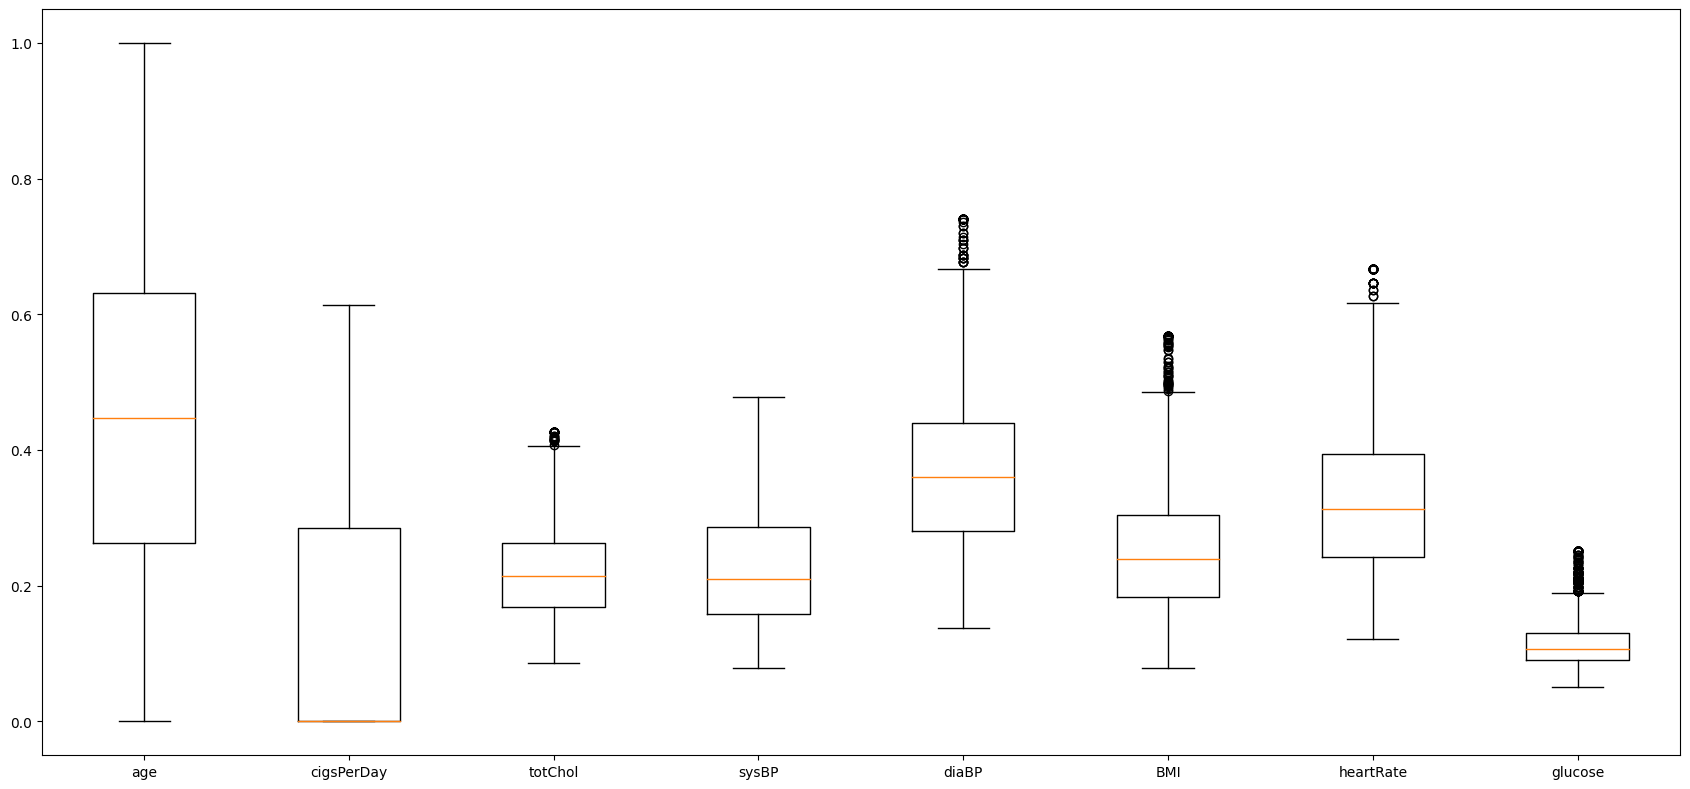

In [ ]:
# visualize outlier (after winsorization)
plt.boxplot(x=X_train[continuous_cols]);
plt.xticks(ticks=range(1,9), labels=np.array(continuous_cols));

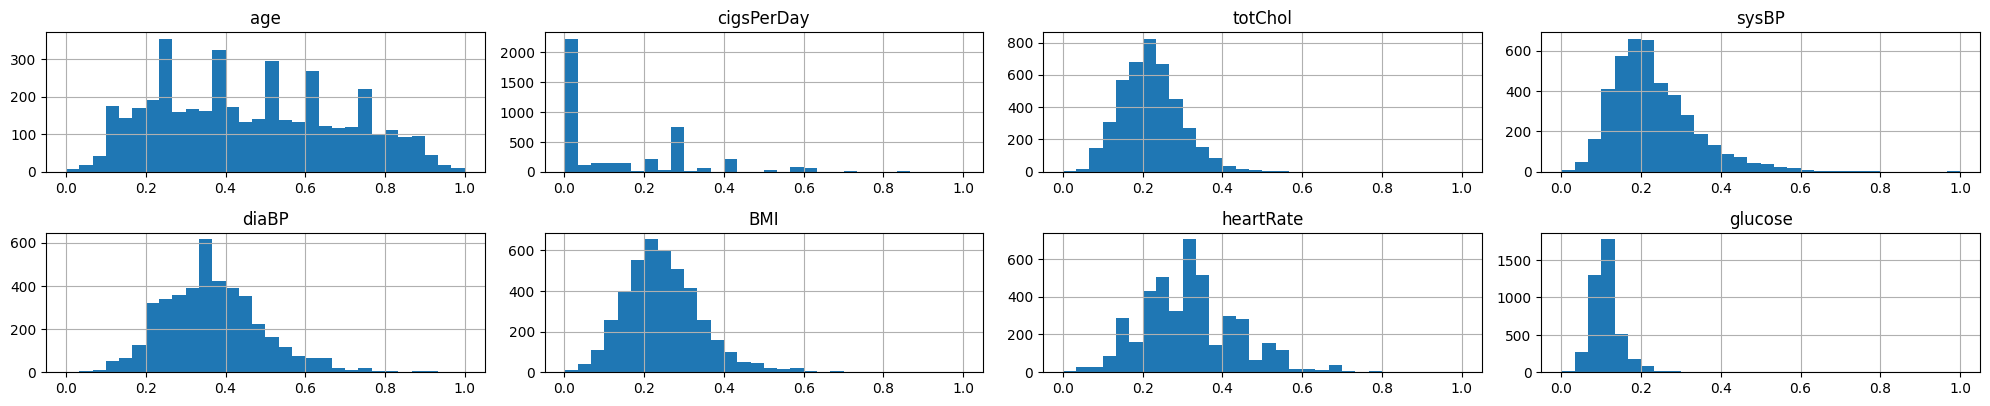

In [ ]:
# oulier distribution before winsorization
df_impute[continuous_cols].hist(bins=30, 
               figsize=(20,30),
               layout=(15,4));

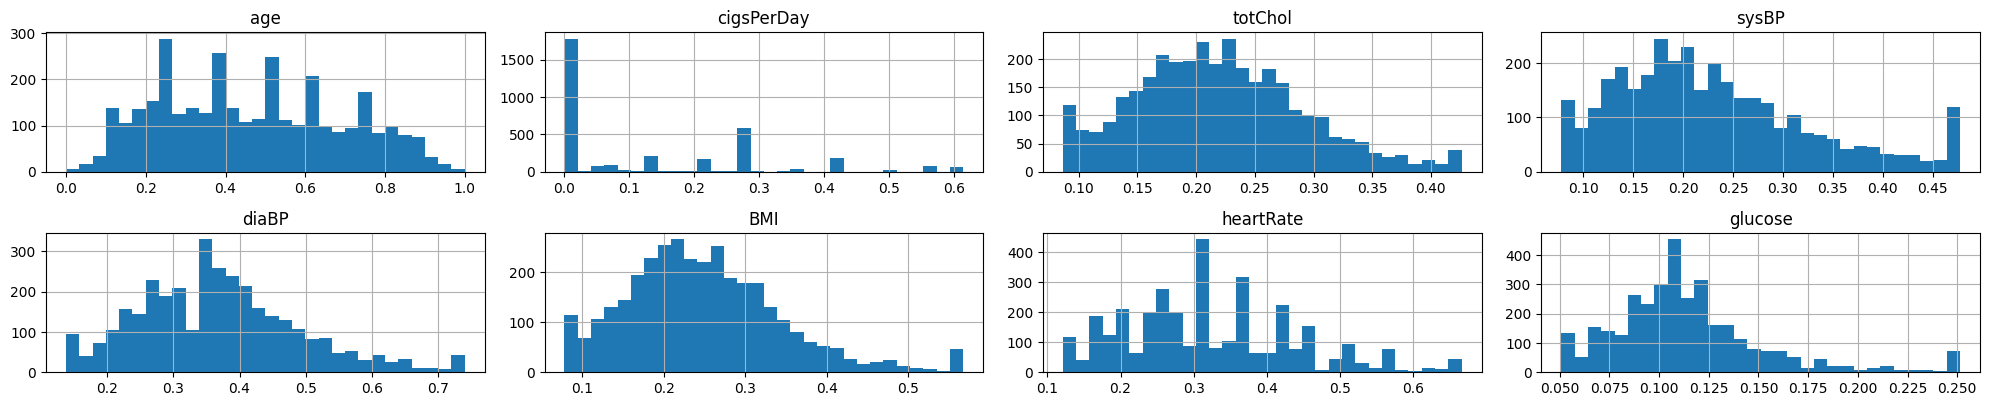

In [ ]:
# oulier distribution after winsorization
X_train[continuous_cols].hist(bins=30, 
               figsize=(20,30),
               layout=(15,4));

## Handling imbalanced data

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#SMOTE-tomek (SMOTE-Tomek is a combination of oversampling (SMOTE) and undersampling (Tomek links) techniques)
from imblearn.combine import SMOTETomek

#Create the SMOTE-tomek variable 
smote_tomek = SMOTETomek(random_state=42)

#Applie SMOTE-tomek to train data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

#Original train dataset 
X_train.count(), y_train.value_counts()

(male               3390
 age                3390
 education          3390
 currentSmoker      3390
 cigsPerDay         3390
 BPMeds             3390
 prevalentStroke    3390
 prevalentHyp       3390
 diabetes           3390
 totChol            3390
 sysBP              3390
 diaBP              3390
 BMI                3390
 heartRate          3390
 glucose            3390
 dtype: int64,
 0.0    2875
 1.0     515
 Name: CHD, dtype: int64)

<Axes: >

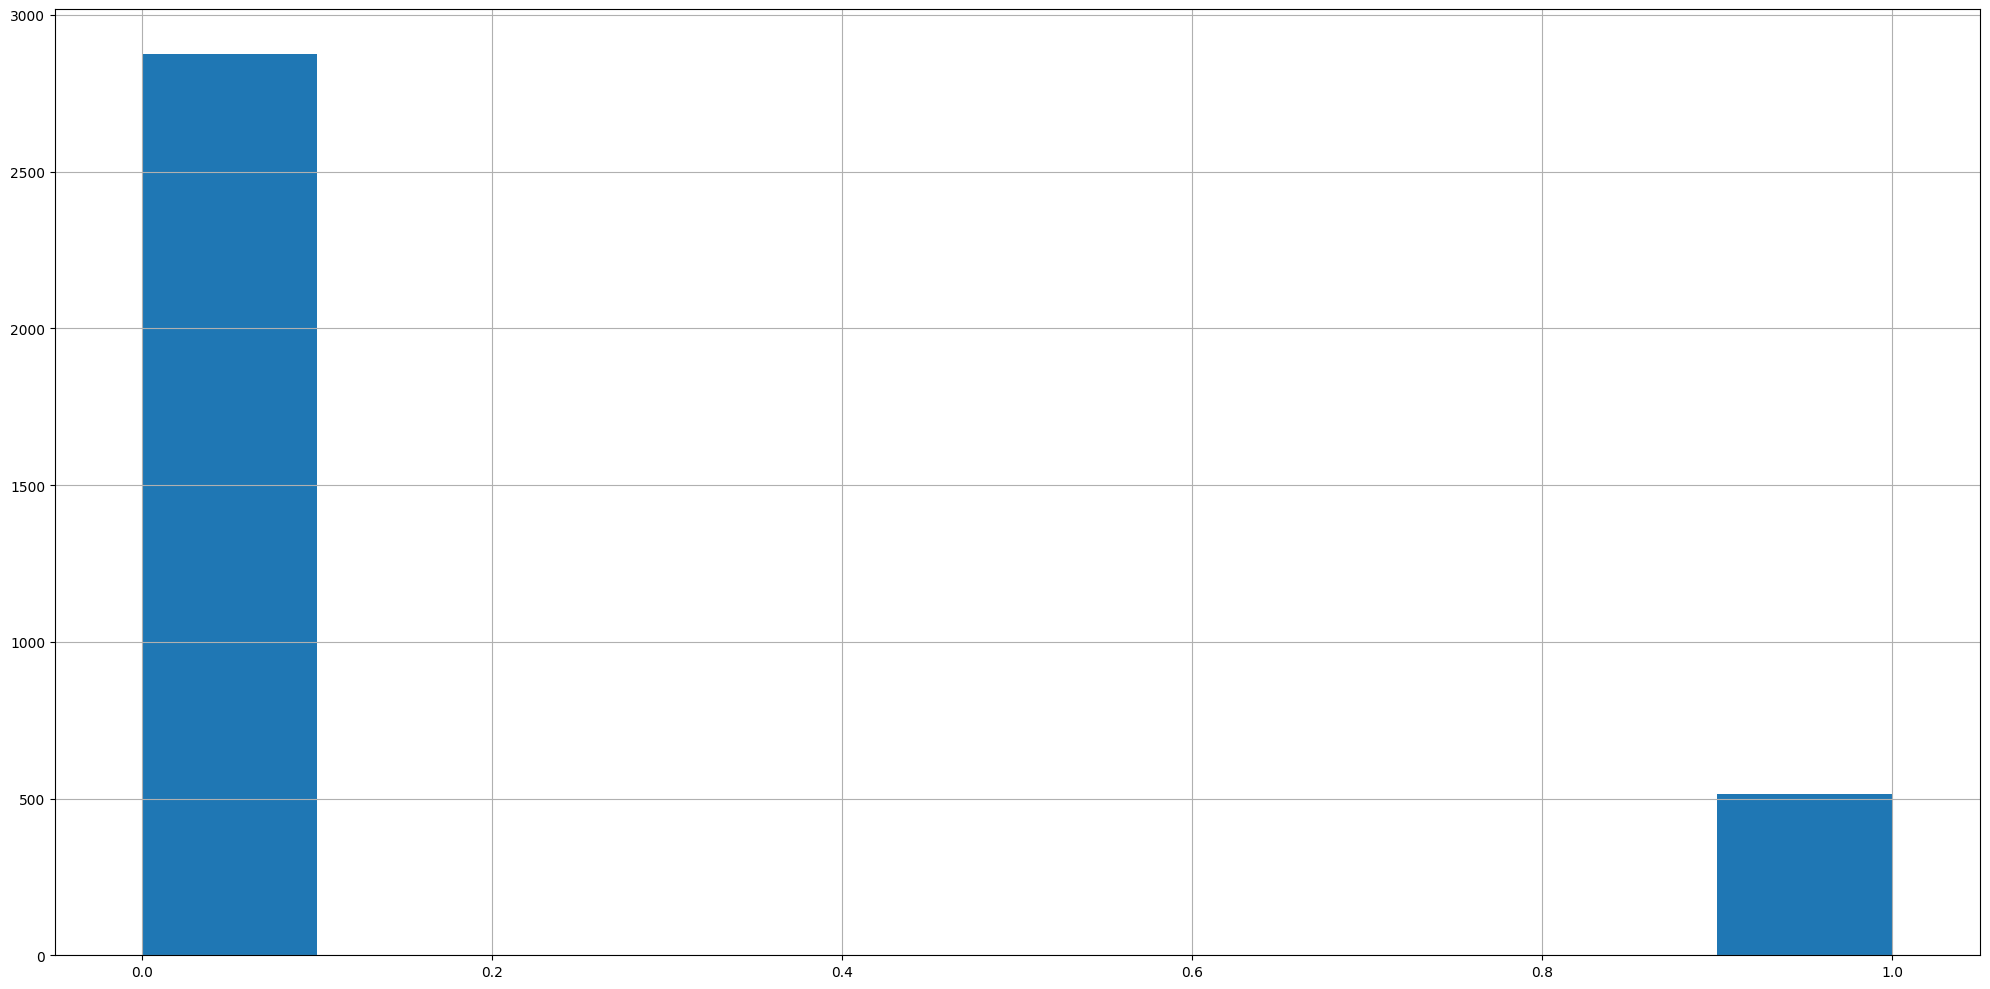

In [ ]:
#visualize original imbalanced data
y_train.hist(figsize=(20,10))

In [ ]:
#Resample train dataset 
X_train_resampled.count(), y_train_resampled.value_counts()

(male               5672
 age                5672
 education          5672
 currentSmoker      5672
 cigsPerDay         5672
 BPMeds             5672
 prevalentStroke    5672
 prevalentHyp       5672
 diabetes           5672
 totChol            5672
 sysBP              5672
 diaBP              5672
 BMI                5672
 heartRate          5672
 glucose            5672
 dtype: int64,
 0.0    2836
 1.0    2836
 Name: CHD, dtype: int64)

<Axes: >

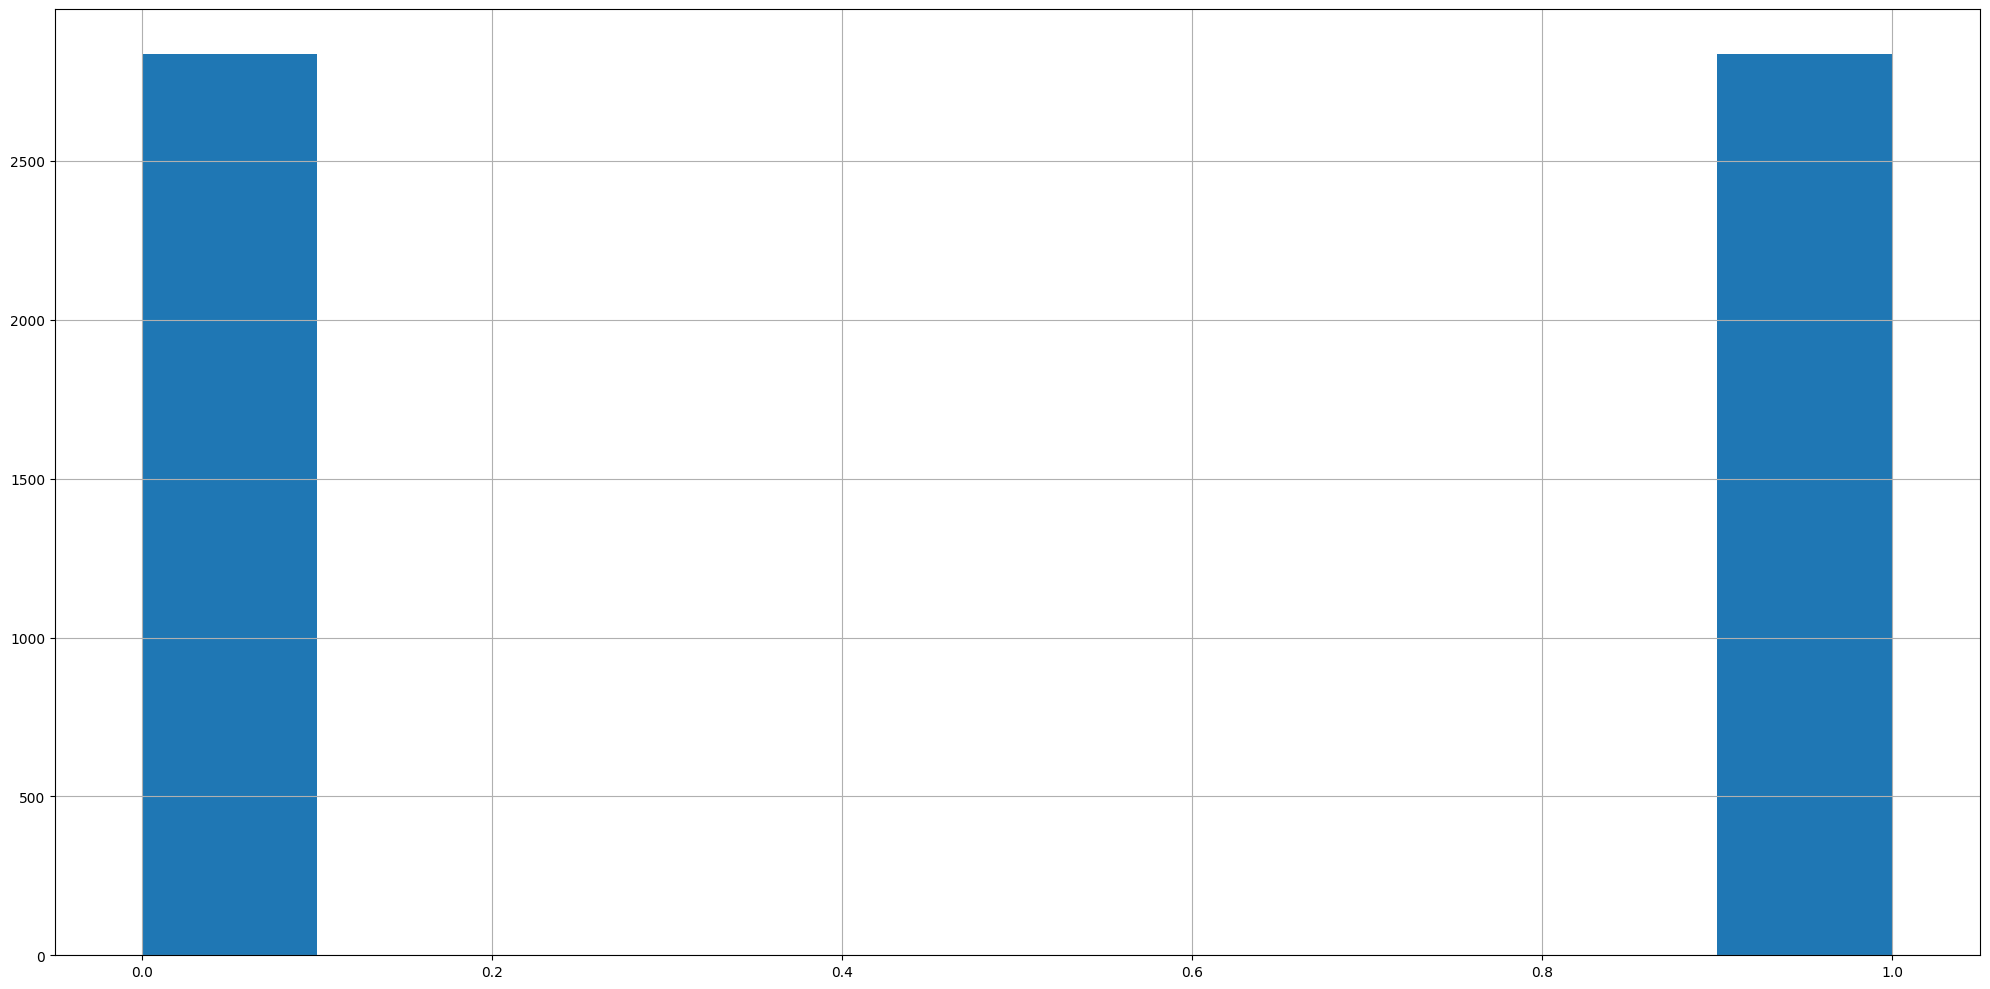

In [ ]:
#visualize balanced data after SMOTE-tomek
y_train_resampled.hist(figsize=(20,10))

# Feature Selection

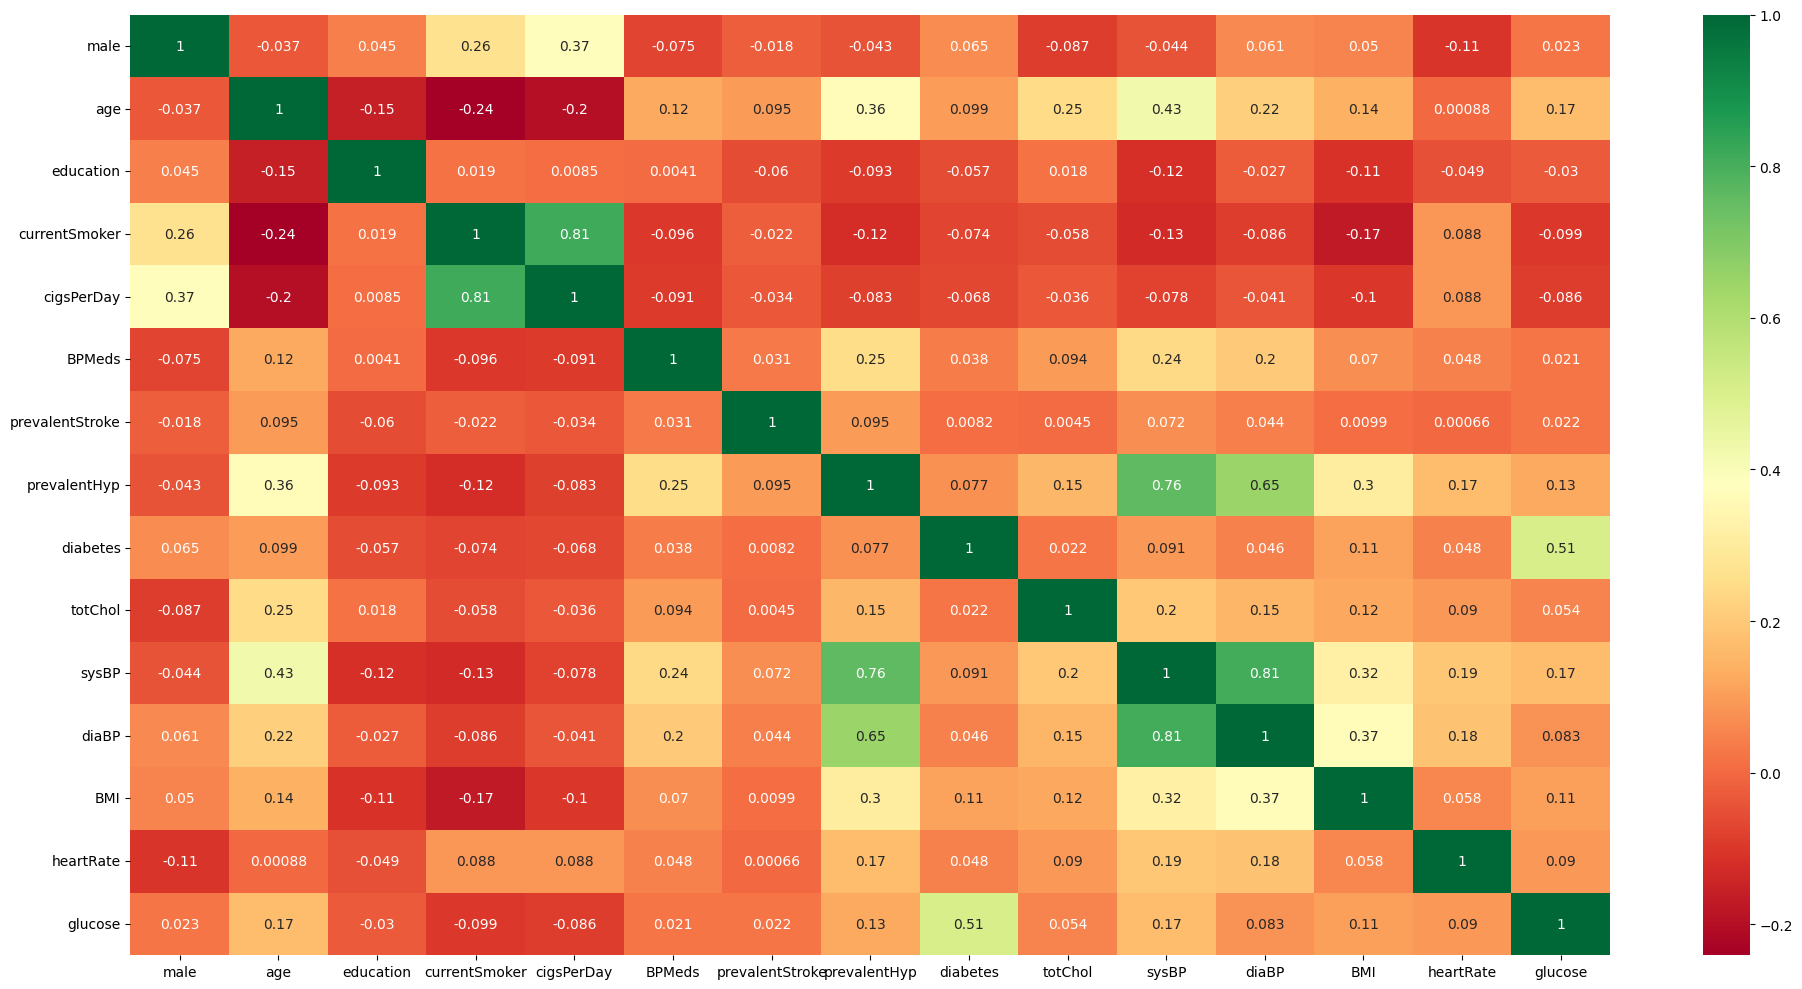

In [ ]:
import seaborn as sns 

#visualize features
corrmat= X_train_resampled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g=sns.heatmap(X_train_resampled[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# remove label column from bianry(categorical) list
discrete_cols.remove('CHD')

#calculating chi2 score for CATEGORICAL variables
bestfeature = SelectKBest(score_func=chi2, k=7)
fit = bestfeature.fit(X_train_resampled[discrete_cols], y_train_resampled)

# Pass the result into a dataframe
dfp_values = pd.DataFrame(fit.pvalues_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_resampled[discrete_cols].columns)
featureScores = pd.concat([dfcolumns,dfscores,dfp_values],axis=1)
featureScores.columns = ['Specs','Score','p-value']  
featureScores_largest = featureScores.nlargest(7,'Score') 
print(featureScores.nlargest(7,'Score'))

             Specs       Score       p-value
3     prevalentHyp  185.357485  3.279112e-42
0             male   39.246649  3.735088e-10
6           BPMeds   37.083337  1.131868e-09
4         diabetes   30.403849  3.508313e-08
5        education   17.763244  2.501698e-05
2  prevalentStroke   16.942421  3.853083e-05
1    currentSmoker    1.450073  2.285162e-01


In [ ]:
#my feature list
feature_list = list(X_train_resampled.columns)
feature_list.remove('education') 
feature_list.remove('currentSmoker')
feature_list.remove('glucose')

feature_list

['male',
 'age',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate']

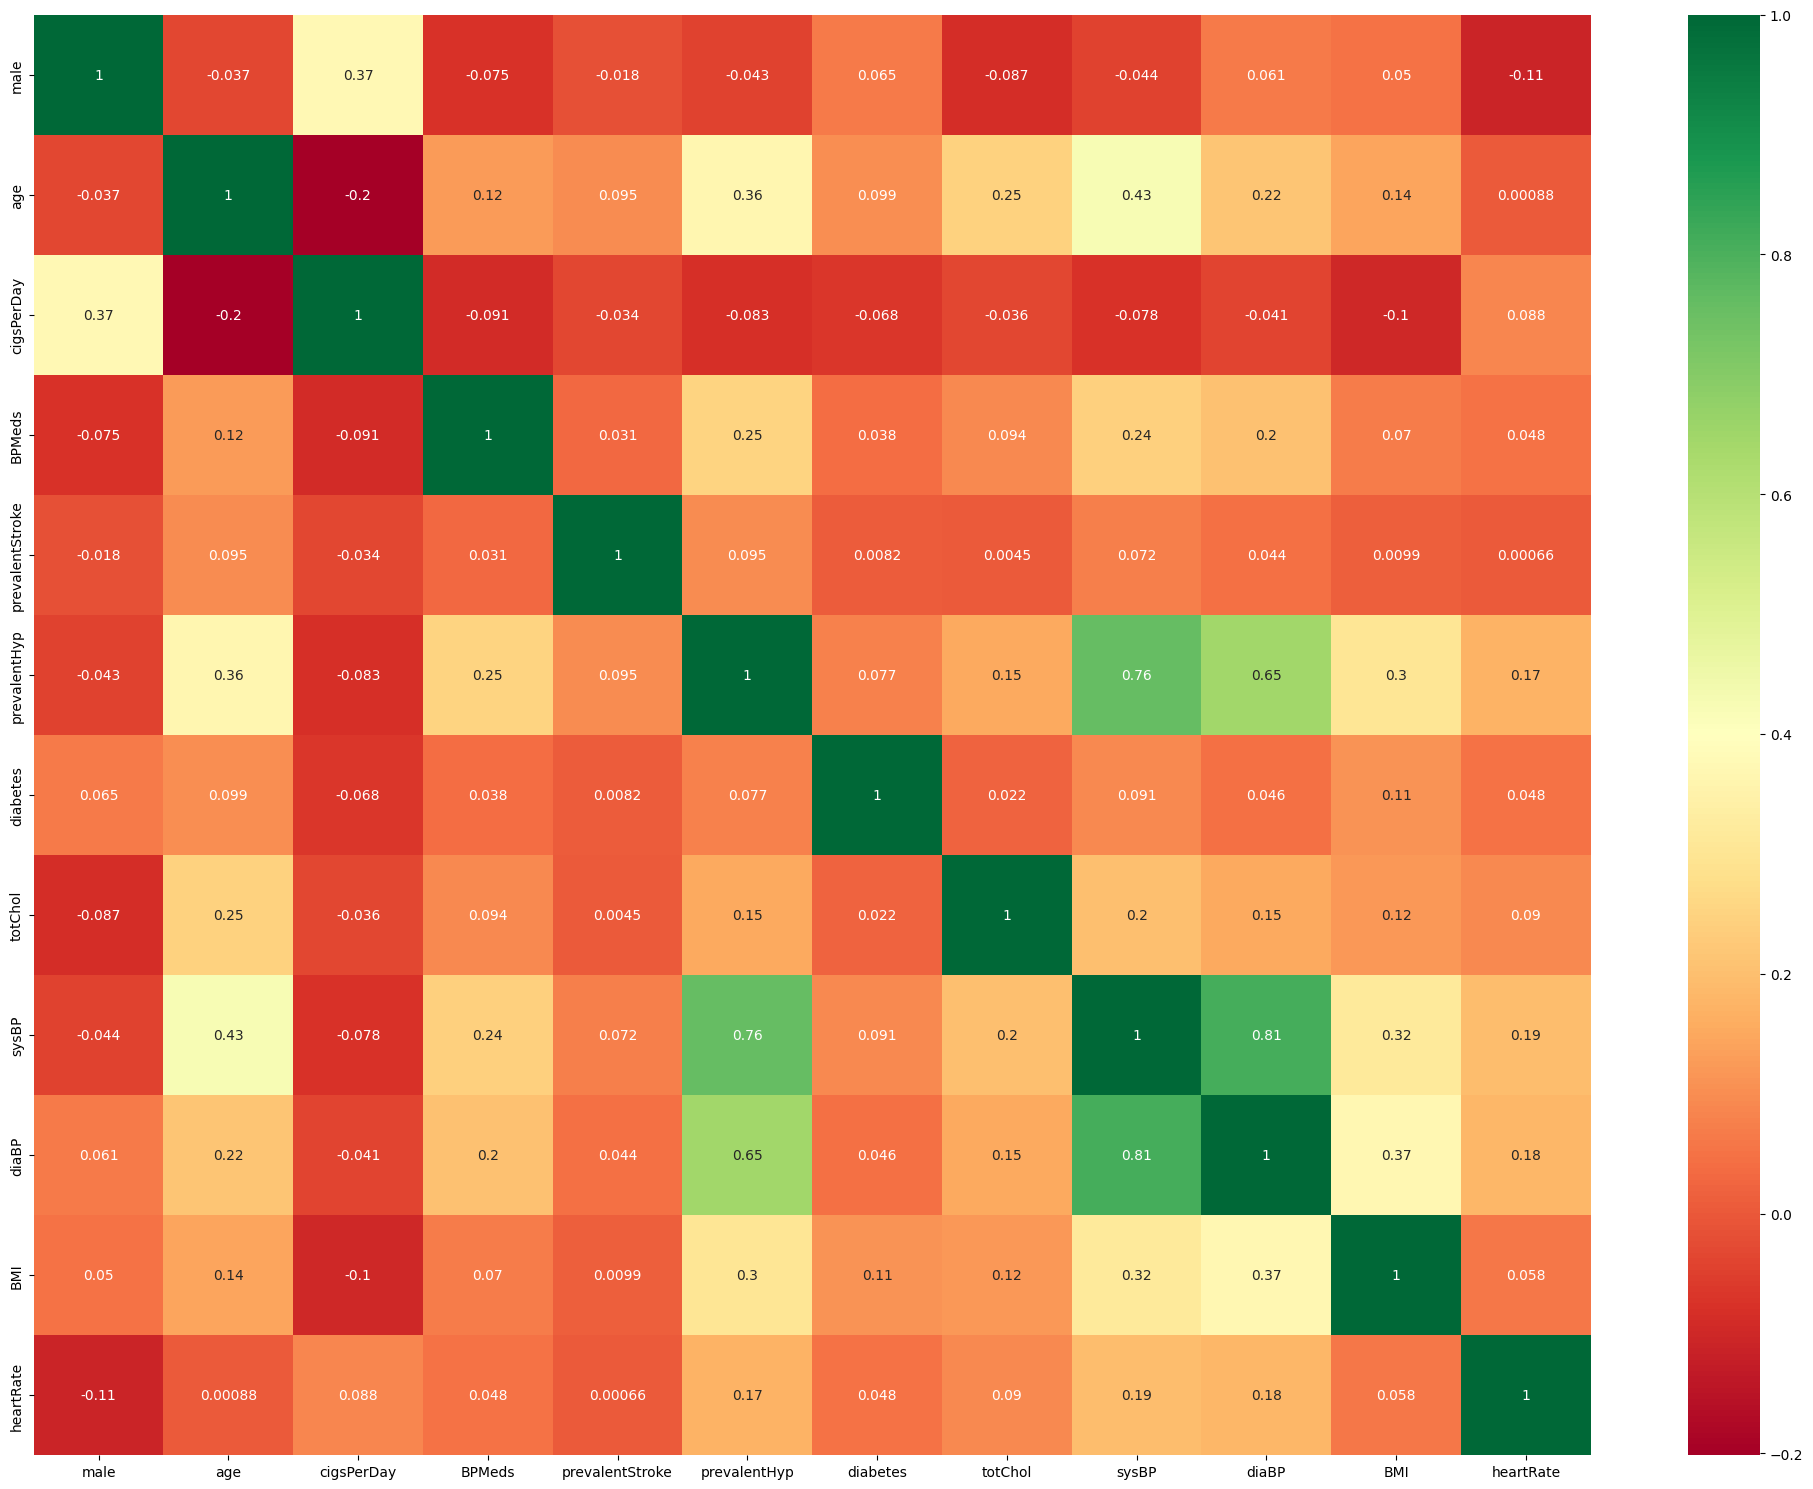

In [ ]:
import seaborn as sns 
# visulize top features 
plt.figure(figsize=(20,15))
g=sns.heatmap(X_train_resampled[feature_list].corr(),annot=True, cmap='RdYlGn')

# Model Fitting

## Logistic Regression

In [ ]:
X_train_resampled.shape

(5672, 15)

### Importing Model Library

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### Setting Class Weights

In [ ]:
# Class Weighting (more weight on Minority Class - Class 1)
class_weight_LR = {0: 1, 1: 1.2}

### Normal Parameter Training

#### Creating Model Function

In [ ]:
# Create LogisticRegression Model
Model_LogisticRegression_Normal = LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weight_LR)

#### Fitting Model

In [ ]:
Model_LogisticRegression_Normal.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 1.2}, max_iter=1000,
                   solver='liblinear')

#### Predicting

In [ ]:
y_train_proba_LR_normal = Model_LogisticRegression_Normal.predict_proba(X_train)
y_test_proba_LR_normal = Model_LogisticRegression_Normal.predict_proba(X_test)

In [ ]:
y_train_pred_LR_normal = Model_LogisticRegression_Normal.predict(X_train)
y_test_pred_LR_normal = Model_LogisticRegression_Normal.predict(X_test)

#### Model Evaluations

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_pred_LR_normal)

array([[704,  15],
       [120,   9]])

<Axes: >

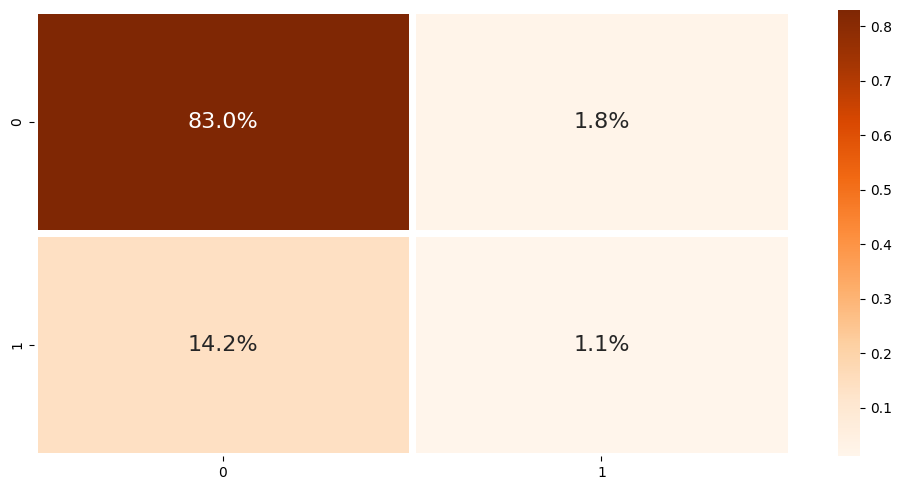

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_test_pred_LR_normal) 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_LR_normal))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred_LR_normal))

Training Accuracy:  0.8542772861356932
Testing Accuracy:  0.8408018867924528


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_pred_LR_normal))
print('Testing Precision: ', precision_score(y_test, y_test_pred_LR_normal))

Training Precision:  0.6615384615384615
Testing Precision:  0.375


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_pred_LR_normal))
print('Testing Recall: ', recall_score(y_test, y_test_pred_LR_normal))

Training Recall:  0.08349514563106795
Testing Recall:  0.06976744186046512


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_pred_LR_normal))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred_LR_normal))

Training F1-Score:  0.1482758620689655
Testing F1-Score:  0.1176470588235294


#### Model Results

##### Classification Report (Precision, Recall & F1 Score)

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_LR = classification_report(y_test, y_test_pred_LR_normal, output_dict=True)
pd.DataFrame(classification_report_LR)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.854369    0.375000  0.840802    0.614684      0.781446
recall       0.979138    0.069767  0.840802    0.524453      0.840802
f1-score     0.912508    0.117647  0.840802    0.515078      0.791592
support    719.000000  129.000000  0.840802  848.000000    848.000000

##### ROC Curve

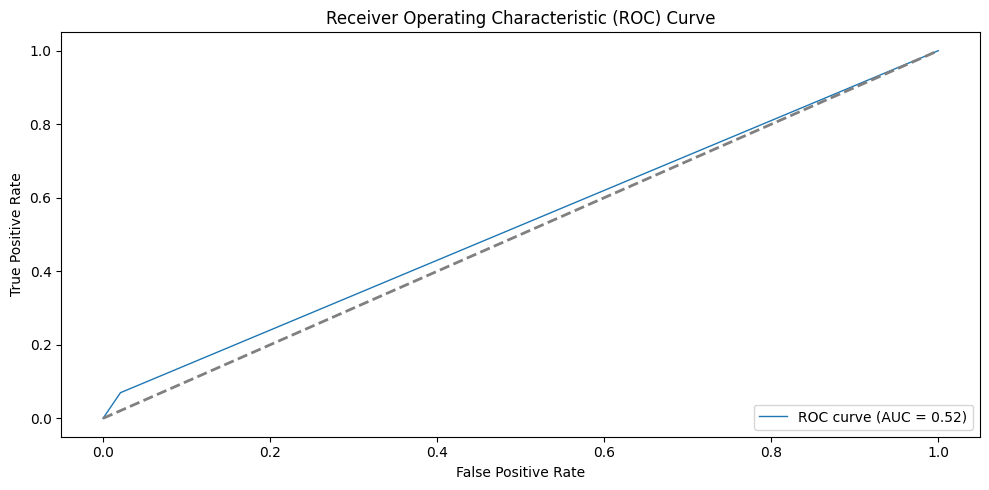

In [ ]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_pred_LR_normal)
roc_auc_LR = auc(fpr_LR, tpr_LR)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr_LR, tpr_LR, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score_LR_Normal = Model_LogisticRegression_Normal.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_LR_Normal, train_tpr_LR_Normal, thresholds_LR_Normal = roc_curve(y_train, y_train_score_LR_Normal)

# Calculate the probability scores of each point in the test set
y_test_score_LR_Normal = Model_LogisticRegression_Normal.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_LR_Normal, test_tpr_LR_Normal, test_thresholds_LR_Normal = roc_curve(y_test, y_test_score_LR_Normal)

Training AUC: 0.7398254115660616


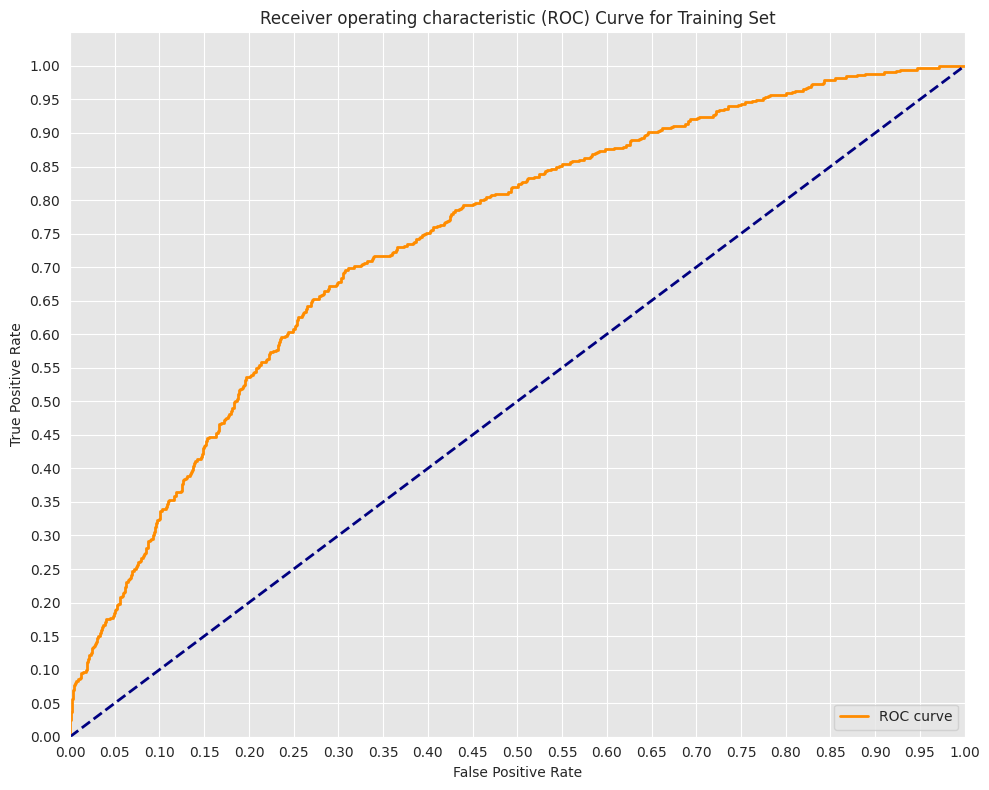

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr_LR_Normal, train_tpr_LR_Normal, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr_LR_Normal, train_tpr_LR_Normal)))
plt.show()

Test AUC: 0.7009196666343219



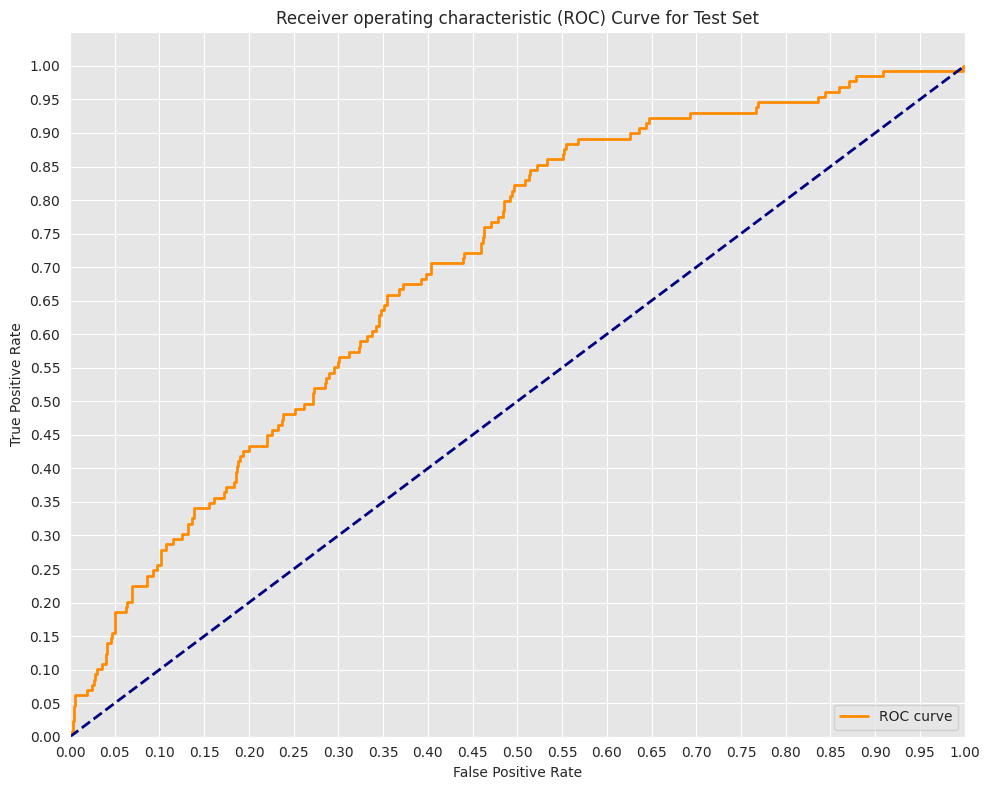

In [ ]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr_LR_Normal, test_tpr_LR_Normal, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr_LR_Normal, test_tpr_LR_Normal)))
print('')
plt.show()

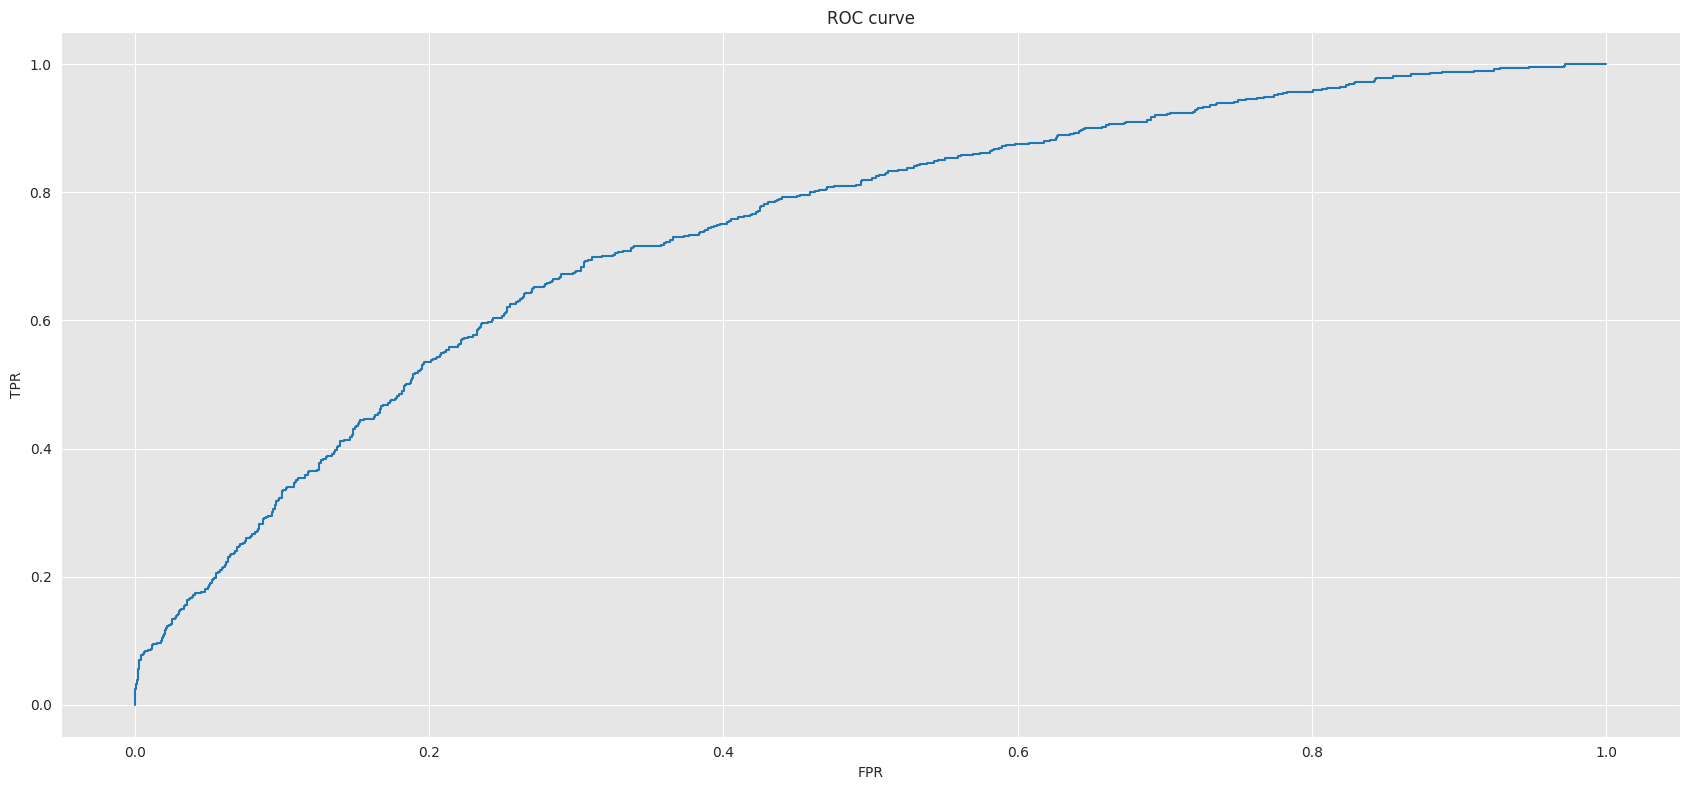

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba_LR_normal[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

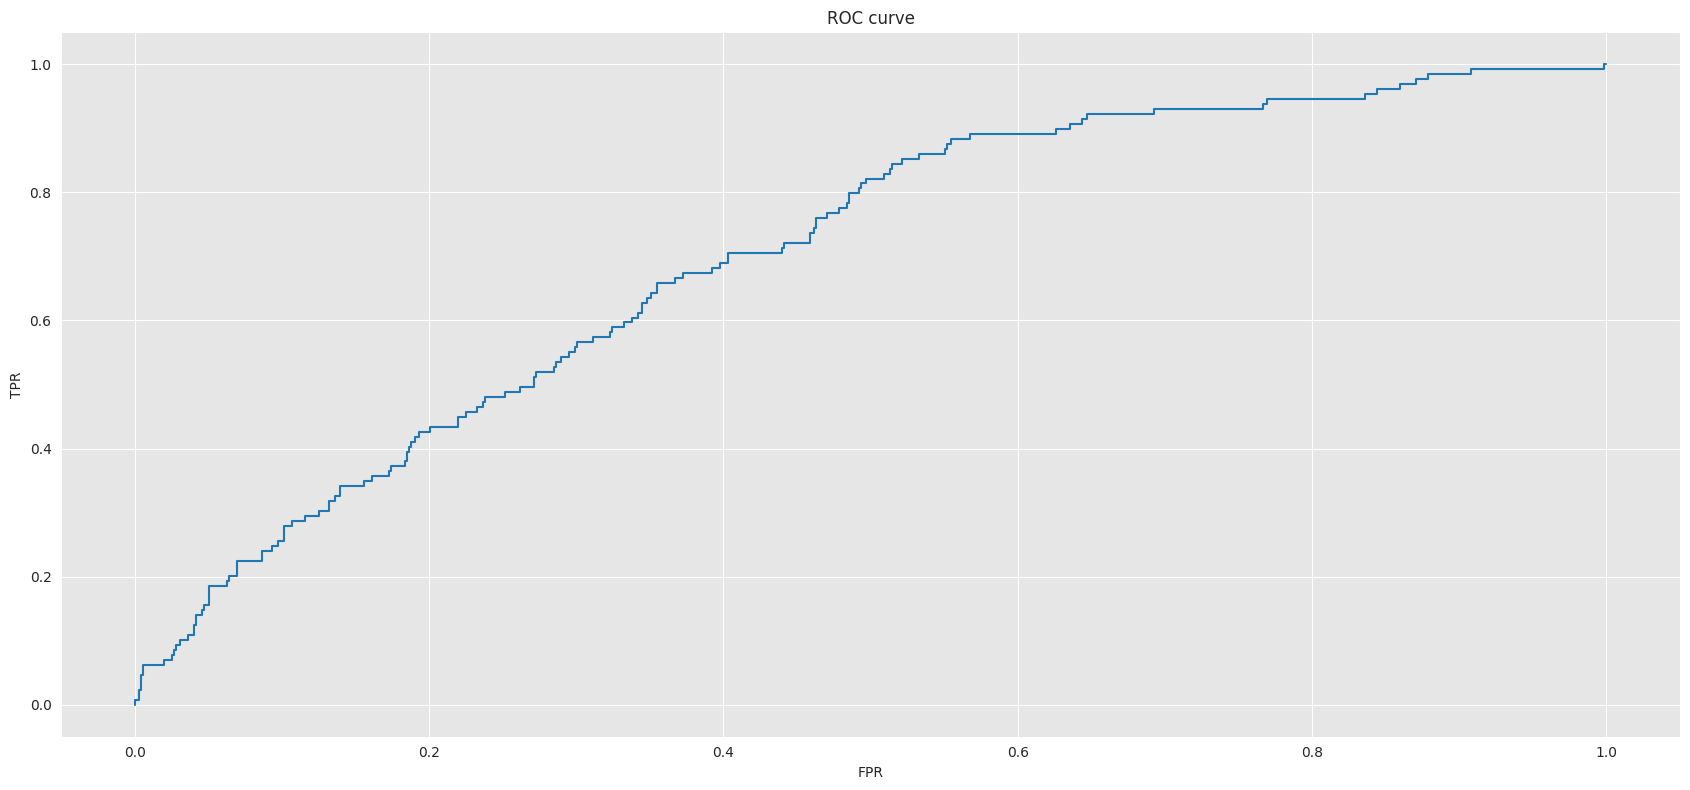

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba_LR_normal[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

##### ROC AUC (On Training Data)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train, y_train_proba_LR_normal[:,1])

0.7398254115660616

##### ROC AUC (On Testing Data)

In [ ]:
roc_auc_score(y_test, y_test_proba_LR_normal[:,1])

0.7009196666343219

### Tuned Parameter Training

#### Defining Tunning Parameters

In [ ]:
# Defining Tunning Parameters
Hyperparameters_LR = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

#### Creating GridSearchCV Model

In [ ]:
# Creating GridSearchCV Model
Model_GridSearch_LR_Tuned = GridSearchCV(Model_LogisticRegression_Normal, Hyperparameters_LR, cv = 5, scoring = 'roc_auc')

#### Fitting data into GridSearchCV

In [ ]:
# Fitting data into GridSearchCV
Model_GridSearch_LR_Tuned.fit(X_train_resampled[feature_list] , y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1, 1: 1.2},
                                          max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

#### Obtaining best Hyperparameters results and Model Score

In [ ]:
# Obtaining best Hyperparameters results and Model Score
print(Model_GridSearch_LR_Tuned.best_params_, Model_GridSearch_LR_Tuned.best_score_)

{'C': 1, 'penalty': 'l2'} 0.7369241545030849


In [ ]:
# Model_GridSearch_LR_Tuned_Fit = Model_GridSearch_LR_Tuned.fit(X_train_resampled[feature_list] , y_train_resampled)

#### Obtaining Model Coefficients

In [ ]:
# Model Coefficients
Model_GridSearch_LR_Tuned.best_estimator_.coef_

array([[ 0.39748222,  3.1047755 ,  1.71314713,  0.30881182,  0.70444861,
         0.1907968 ,  0.55130593,  1.34247191,  1.95220185,  0.55771219,
        -0.31704156, -0.40588839]])

#### Model Intercepts

In [ ]:
# Model Intercepts
Model_GridSearch_LR_Tuned.best_estimator_.intercept_

array([-2.75168864])

#### Predicting

In [ ]:
y_train_proba_LR_Tuned = Model_GridSearch_LR_Tuned.predict_proba(X_train[feature_list])[:,1]
y_test_proba_LR_Tuned = Model_GridSearch_LR_Tuned.predict_proba(X_test[feature_list])[:,1]

In [ ]:
y_train_predict_LR_Tuned = Model_GridSearch_LR_Tuned.predict(X_train[feature_list])
y_test_predict_LR_Tuned = Model_GridSearch_LR_Tuned.predict(X_test[feature_list])

#### Checking Threshold Value

In [ ]:
# Threshold value can be adjusted to prioritize certain types of errors over others.
# ex: customize threshold to increase sensitivity  to patience with the disease (reduce false negative)
y_pred_test_LR_Tuned = (y_test_proba_LR_Tuned > 0.5).astype(int)

#### Model Evaluations

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion matrix 

In [ ]:
confusion_matrix(y_test, y_test_predict_LR_Tuned)

array([[427, 292],
       [ 39,  90]])

<Axes: >

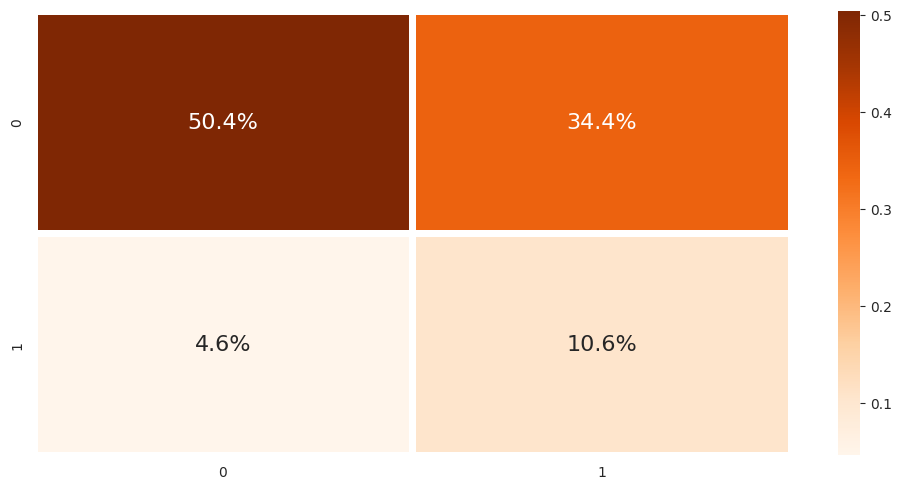

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_test_predict_LR_Tuned) 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_predict_LR_Tuned))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_predict_LR_Tuned))

Training Accuracy:  0.6182890855457227
Testing Accuracy:  0.6096698113207547


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_predict_LR_Tuned))
print('Testing Precision: ', precision_score(y_test, y_test_predict_LR_Tuned))

Training Precision:  0.2501603592046183
Testing Precision:  0.2356020942408377


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_predict_LR_Tuned))
print('Testing Recall: ', recall_score(y_test, y_test_predict_LR_Tuned))

Training Recall:  0.7572815533980582
Testing Recall:  0.6976744186046512


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_predict_LR_Tuned))
print('Testing F1-Score: ', f1_score(y_test, y_test_predict_LR_Tuned))

Training F1-Score:  0.37608486017357756
Testing F1-Score:  0.3522504892367906


#### Model Results

##### Classification Report (Precision, Recall & F1 Score)

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_LR = classification_report(y_test, y_test_predict_LR_Tuned, output_dict=True)
pd.DataFrame(classification_report_LR)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.916309    0.235602   0.60967    0.575956      0.812758
recall       0.593880    0.697674   0.60967    0.645777      0.609670
f1-score     0.720675    0.352250   0.60967    0.536463      0.664629
support    719.000000  129.000000   0.60967  848.000000    848.000000

##### ROC Curve

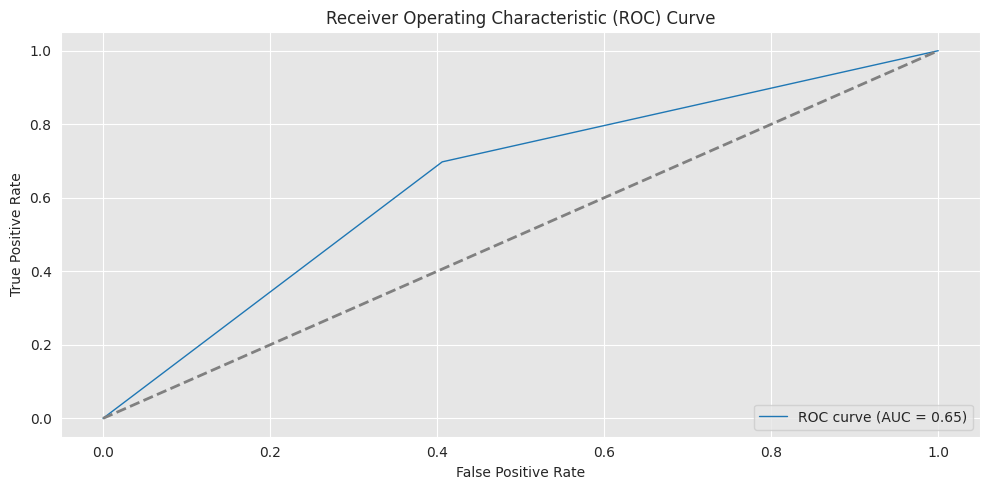

In [ ]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_predict_LR_Tuned)
roc_auc_LR = auc(fpr_LR, tpr_LR)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr_LR, tpr_LR, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### ROC AUC (On Training Data)

In [ ]:
roc_auc_score(y_train, y_train_proba_LR_Tuned)

0.7373062051498522

##### ROC AUC (On Testing Data)

In [ ]:
roc_auc_score(y_test, y_test_proba_LR_Tuned)

0.6947202725577084

## Decision Tree Classifier

### Importing Model Library

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Normal Parameter Tuning

#### Creating Model Function

In [ ]:
Model_DecisionTreeClassifier_Normal = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
# that fraction of samples(if float) or that many number(if int) of samples is atleast present in the node 
# before splitting, then only split that node

# for min_samples_split as 180 I got a better accuracy and train score and difference was less
# but f1 score was very bad for positive class
# and setting min_samples_split as 40, we got good results for all metrics

#### Fitting Model

In [ ]:
Model_DecisionTreeClassifier_Normal.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=40, random_state=0)

#### Predicting

In [ ]:
y_train_proba_DT_normal = Model_DecisionTreeClassifier_Normal.predict_proba(X_train)
y_test_proba_DT_normal = Model_DecisionTreeClassifier_Normal.predict_proba(X_test)

In [ ]:
y_train_pred_DT_normal = Model_DecisionTreeClassifier_Normal.predict(X_train)
y_test_pred_DT_normal = Model_DecisionTreeClassifier_Normal.predict(X_test)

#### Model Evaluations

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_pred_DT_normal)

array([[674,  45],
       [115,  14]])

<Axes: >

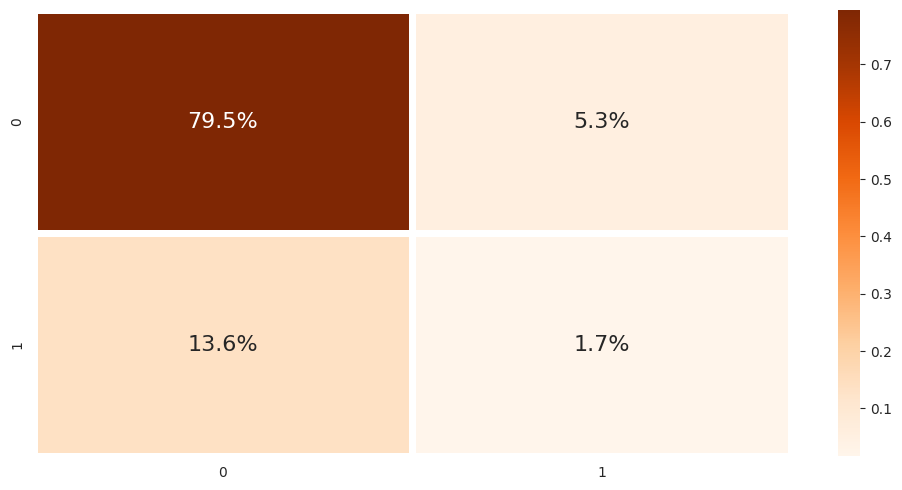

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_test_pred_DT_normal) 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_DT_normal))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred_DT_normal))

Training Accuracy:  0.8746312684365781
Testing Accuracy:  0.8113207547169812


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_pred_DT_normal))
print('Testing Precision: ', precision_score(y_test, y_test_pred_DT_normal))

Training Precision:  0.6642335766423357
Testing Precision:  0.23728813559322035


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_pred_DT_normal))
print('Testing Recall: ', recall_score(y_test, y_test_pred_DT_normal))

Training Recall:  0.3533980582524272
Testing Recall:  0.10852713178294573


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_pred_DT_normal))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred_DT_normal))

Training F1-Score:  0.46134347275031684
Testing F1-Score:  0.14893617021276598


#### Modal Results

##### Classification Report (Precision, Recall & F1 Score)

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_LR = classification_report(y_test, y_test_pred_DT_normal, output_dict=True)
pd.DataFrame(classification_report_LR)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.854246    0.237288  0.811321    0.545767      0.760393
recall       0.937413    0.108527  0.811321    0.522970      0.811321
f1-score     0.893899    0.148936  0.811321    0.521418      0.780573
support    719.000000  129.000000  0.811321  848.000000    848.000000

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

##### ROC AUC (On Training Data)

In [ ]:
roc_auc_score(y_train, y_train_proba_DT_normal[:,1])

0.9047709582102152

##### ROC AUC (On Testing Data)

In [ ]:
roc_auc_score(y_test, y_test_proba_DT_normal[:,1])

0.5725598645836703

##### ROC Curve

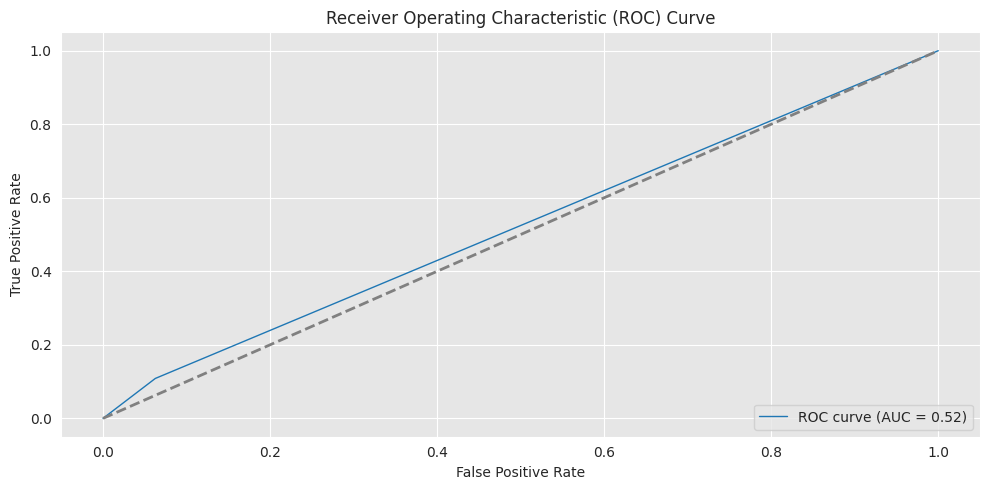

In [ ]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_pred_DT_normal)
roc_auc_LR = auc(fpr_LR, tpr_LR)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr_LR, tpr_LR, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

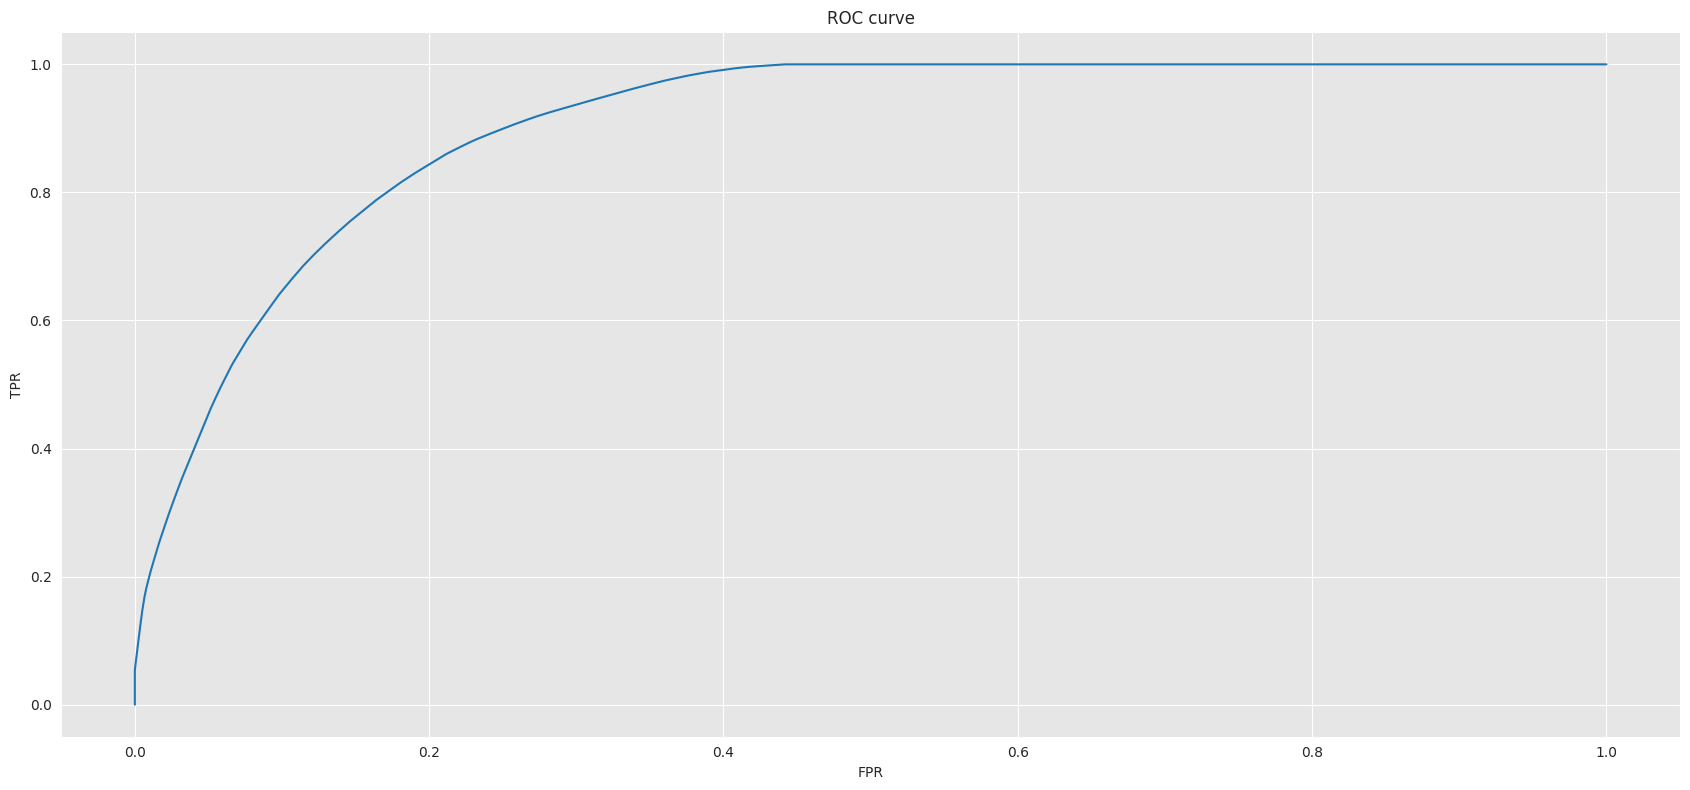

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba_DT_normal[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

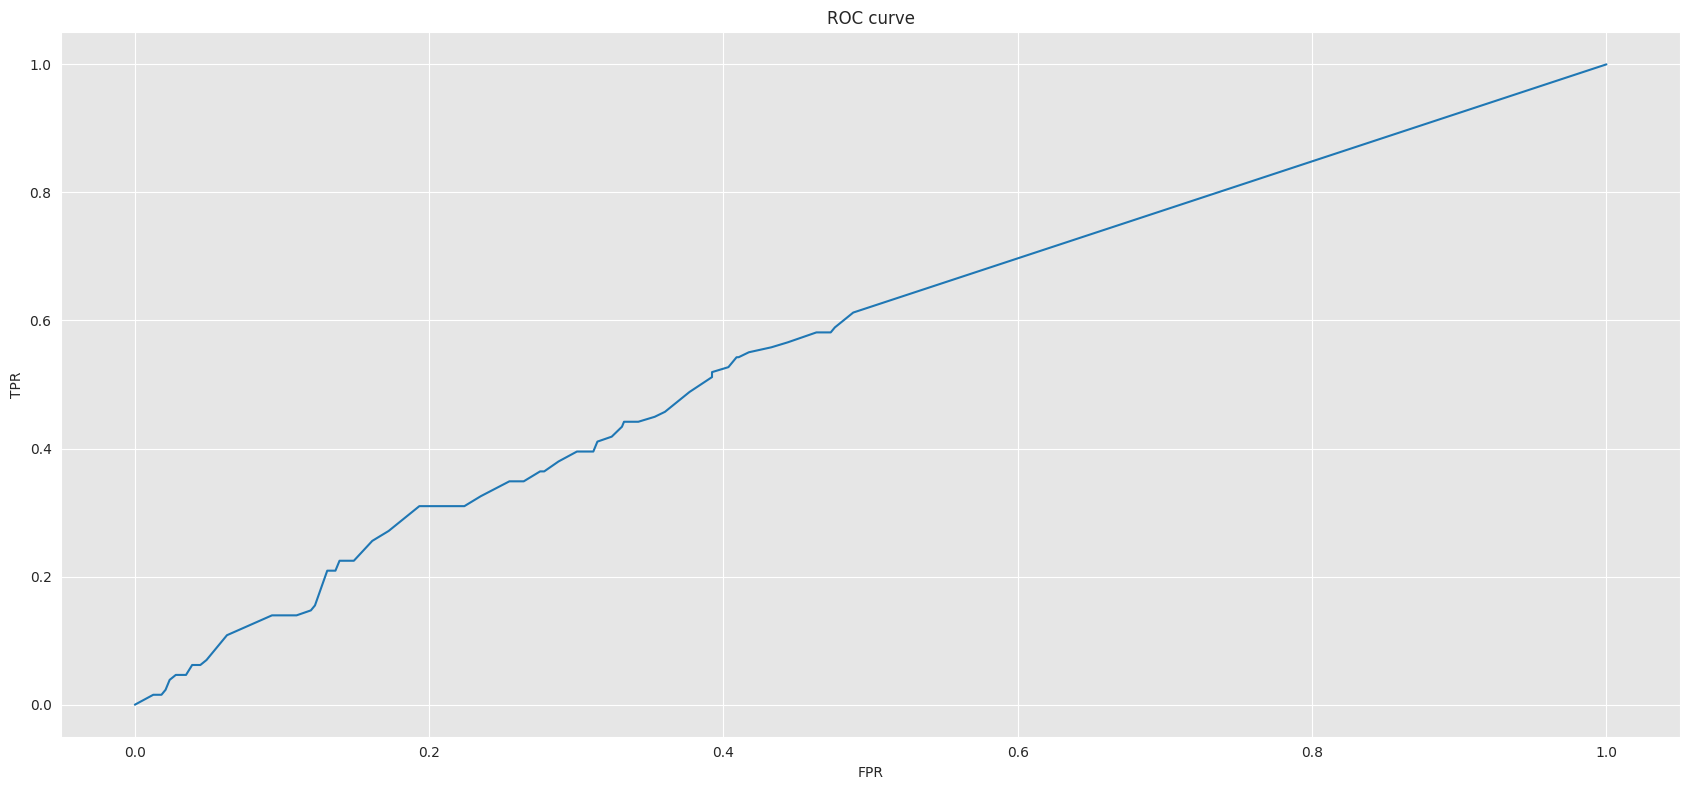

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba_DT_normal[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### Obtaining the Decision Tree

In [ ]:
# Exporting the tree in text format
from sklearn.tree import export_text
text_format_DT = export_text(Model_DecisionTreeClassifier_Normal, feature_names = list(df_impute.columns[:15]))
print('Decision tree in text format : \n%s'%text_format_DT)

Decision tree in text format : 
|--- age <= 0.43
|   |--- sysBP <= 0.46
|   |   |--- cigsPerDay <= 0.14
|   |   |   |--- totChol <= 0.42
|   |   |   |   |--- age <= 0.28
|   |   |   |   |   |--- glucose <= 0.23
|   |   |   |   |   |   |--- heartRate <= 0.19
|   |   |   |   |   |   |   |--- heartRate <= 0.18
|   |   |   |   |   |   |   |   |--- sysBP <= 0.08
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- sysBP >  0.08
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- heartRate >  0.18
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- heartRate >  0.19
|   |   |   |   |   |   |   |--- diaBP <= 0.31
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- diaBP >  0.31
|   |   |   |   |   |   |   |   |--- BMI <= 0.19
|   |   |   |   |   |   |   |   |   |--- diaBP <= 0.49
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 0.19
|   |   |   |   |   |   |   |   |   

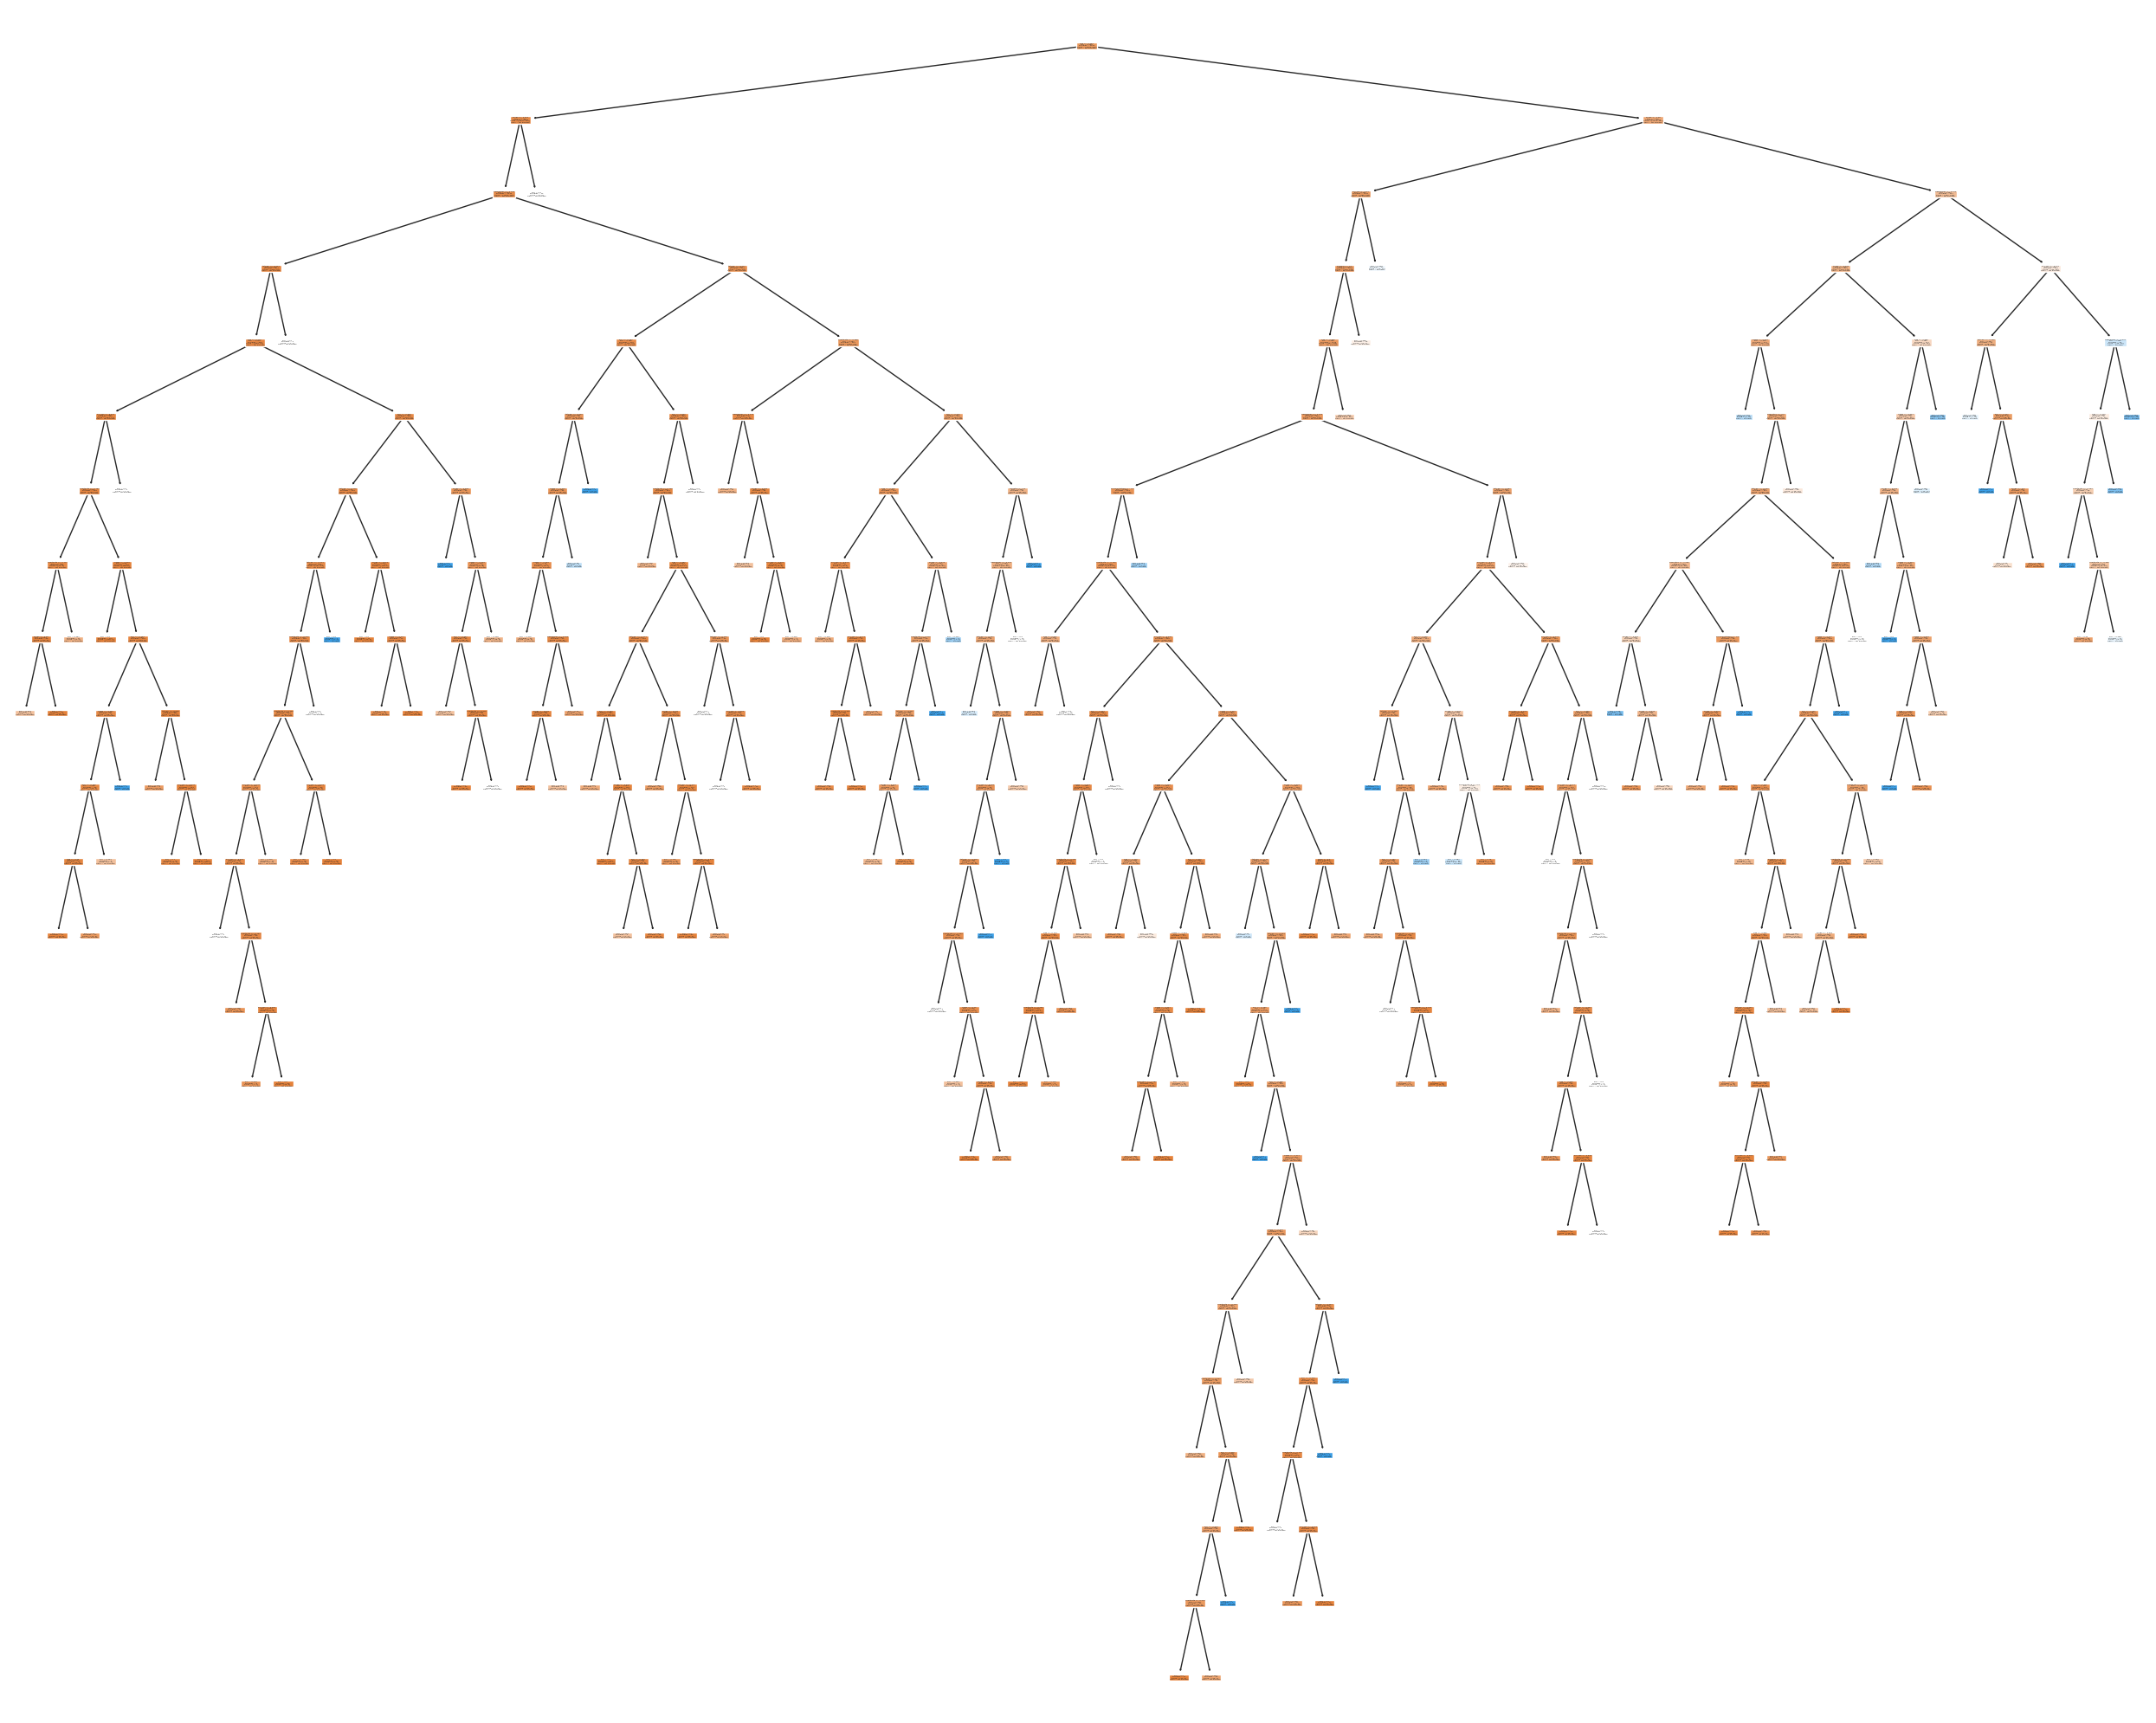

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Model_DecisionTreeClassifier_Normal,
                   feature_names=X_train_resampled.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

### Tuned Parameter Training

#### Defining Tunning Parameters

In [ ]:
hyperparameters_DT = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

#### Creating GridSearchCV Model

In [ ]:
# Creating GridSearchCV Model
Model_GridSearch_DT_Tuned = GridSearchCV(Model_DecisionTreeClassifier_Normal, hyperparameters_DT, cv = 5, scoring = 'roc_auc')

#### Fitting data into GridSearchCV

In [ ]:
# Fitting data into GridSearchCV
Model_GridSearch_DT_Tuned.fit(X_train_resampled[feature_list] , y_train_resampled)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_split=40,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc')

#### Obtaining best Hyperparameters results and Model Score

In [ ]:
# Obtaining best Hyperparameters results and Model Score
print(Model_GridSearch_DT_Tuned.best_params_, Model_GridSearch_DT_Tuned.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5} 0.8160547105876489


In [ ]:
best_estimator_DT = Model_GridSearch_DT_Tuned.best_estimator_
best_estimator_DT

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=40, random_state=0)

#### Re-fitting Data into the Model

In [ ]:
# Model_DecisionTreeClassifier_Refit.fit(X_train, y_train)

#### Obtaining Model Coefficients

In [ ]:
# Model Coefficients
# Model_GridSearch_DT_Tuned.best_estimator_.coef_
Model_GridSearch_DT_Tuned.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=40, random_state=0)

#### Model Intercepts

In [ ]:
# Model Intercepts
Model_GridSearch_LR_Tuned.best_estimator_.intercept_

array([-2.75168864])

#### Predicting

In [ ]:
y_train_proba_DT_Tuned = Model_GridSearch_DT_Tuned.predict_proba(X_train[feature_list])[:,1]
y_test_proba_DT_Tuned = Model_GridSearch_DT_Tuned.predict_proba(X_test[feature_list])[:,1]

In [ ]:
y_train_predict_DT_Tuned = Model_GridSearch_DT_Tuned.predict(X_train[feature_list])
y_test_predict_DT_Tuned = Model_GridSearch_DT_Tuned.predict(X_test[feature_list])

#### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_predict_DT_Tuned)

array([[570, 149],
       [ 91,  38]])

<Axes: >

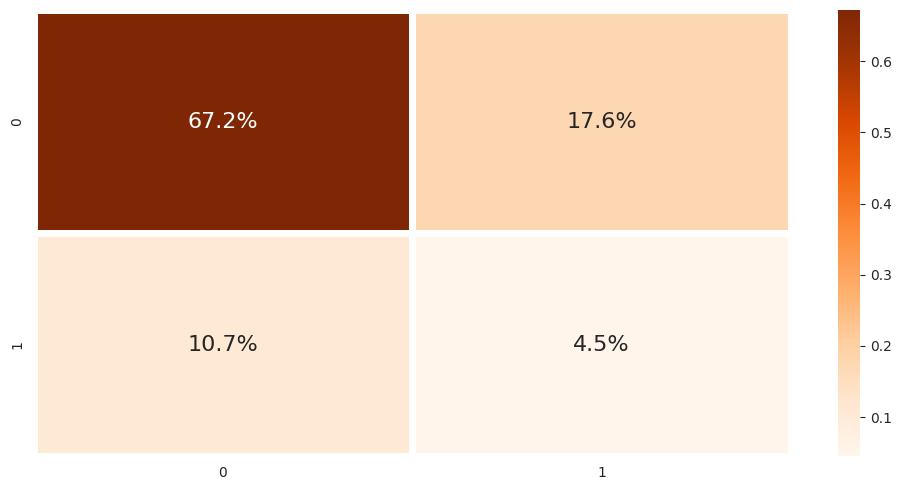

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_predict_DT_Tuned) 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_predict_DT_Tuned))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_predict_DT_Tuned))

Training Accuracy:  0.8224188790560472
Testing Accuracy:  0.7169811320754716


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_predict_DT_Tuned))
print('Testing Precision: ', precision_score(y_test, y_test_predict_DT_Tuned))

Training Precision:  0.43899018232819076
Testing Precision:  0.20320855614973263


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_predict_DT_Tuned))
print('Testing Recall: ', recall_score(y_test, y_test_predict_DT_Tuned))

Training Recall:  0.6077669902912621
Testing Recall:  0.29457364341085274


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_predict_DT_Tuned))
print('Testing F1-Score: ', f1_score(y_test, y_test_predict_DT_Tuned))

Training F1-Score:  0.509771986970684
Testing F1-Score:  0.24050632911392408


##### Accuracy Score

In [ ]:
accuracy_DT = accuracy_score(y_test_predict_DT_Tuned, y_test)*100
print('Accuracy score for Decision tree is %f'%accuracy_DT)

Accuracy score for Decision tree is 71.698113


##### Train Score

In [ ]:
train_score_DT = Model_GridSearch_DT_Tuned.score(X_train_resampled[feature_list], y_train_resampled)*100
print('Train score for Decision tree is %f'%train_score_DT)

Train score for Decision tree is 94.010416


##### Difference between Training and Testing Score

In [ ]:
print('Difference between train and test scores for Decision tree is : %f'%(train_score_DT - accuracy_DT))

Difference between train and test scores for Decision tree is : 22.312303


#### Model Results

In [ ]:
score_DT = pd.DataFrame(Model_GridSearch_DT_Tuned.cv_results_)
score_DT

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010314      0.001583         0.003905        0.000800   
1        0.007808      0.000870         0.002752        0.000174   
2        0.007286      0.000127         0.003033        0.000790   
3        0.007283      0.000176         0.002596        0.000112   
4        0.007545      0.000127         0.003310        0.000363   
5        0.010288      0.000425         0.004246        0.001523   
6        0.011879      0.001411         0.004297        0.000714   
7        0.010128      0.000356         0.003468        0.000156   
8        0.009900      0.000286         0.003167        0.000187   
9        0.010257      0.000638         0.003399        0.000391   
10       0.014449      0.000435         0.003447        0.000097   
11       0.014975      0.001045         0.003745        0.000399   
12       0.014174      0.000527         0.003189        0.000196   
13       0.015389      0.000969         0.004008        0.001734   
14       0.013278      0.000289         0.002919        0.000180   
15       0.022005      0.000658         0.003309        0.000367   
16       0.022255      0.000833         0.003235        0.000132   
17       0.021115      0.000821         0.003320        0.000169   
18       0.017804      0.001131         0.002911        0.000238   
19       0.015515      0.001042         0.003607        0.000601   
20       0.026031      0.002172         0.003486        0.000112   
21       0.024068      0.001866         0.003359        0.000100   
22       0.023494      0.001806         0.004091        0.000486   
23       0.018496      0.001654         0.003635        0.000363   
24       0.015081      0.000655         0.003358        0.000133   
25       0.008745      0.000353         0.003165        0.000488   
26       0.008429      0.000233         0.003216        0.000178   
27       0.008529      0.000267         0.003066        0.000100   
28       0.008276      0.000258         0.002915        0.000146   
29       0.008442      0.000539         0.003850        0.001323   
30       0.012001      0.001494         0.003393        0.000110   
31       0.012713      0.001604         0.003608        0.000601   
32       0.012065      0.001902         0.003988        0.001402   
33       0.011159      0.000499         0.003296        0.000205   
34       0.011271      0.000309         0.003557        0.000134   
35       0.017256      0.000457         0.004532        0.000934   
36       0.021592      0.001129         0.004875        0.000306   
37       0.021990      0.001058         0.004886        0.000677   
38       0.021500      0.002134         0.004643        0.000119   
39       0.019663      0.000729         0.004644        0.000238   
40       0.036919      0.002574         0.004372        0.000154   
41       0.034281      0.001410         0.004686        0.001059   
42       0.033168      0.001541         0.004905        0.000626   
43       0.027702      0.002784         0.004822        0.001085   
44       0.021438      0.000924         0.004547        0.000414   
45       0.043100      0.005866         0.004427        0.000095   
46       0.042037      0.005202         0.004870        0.000722   
47       0.036500      0.003766         0.005018        0.000911   
48       0.027843      0.003045         0.004602        0.000399   
49       0.022070      0.001424         0.005089        0.000677   

   param_criterion param_max_depth param_min_samples_leaf  \
0             gini               2                      5   
1             gini               2                     10   
2             gini               2                     20   
3             gini               2                     50   
4             gini               2                    100   
5             gini               3                      5   
6             gini               3                     10   
7             gini               3             

##### Classification Report (Precision, Recall & F1 Score)

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_DT = classification_report(y_test, y_test_predict_DT_Tuned, output_dict=True)
pd.DataFrame(classification_report_DT)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.862330    0.203209  0.716981    0.532769      0.762063
recall       0.792768    0.294574  0.716981    0.543671      0.716981
f1-score     0.826087    0.240506  0.716981    0.533297      0.737007
support    719.000000  129.000000  0.716981  848.000000    848.000000

##### ROC Curve

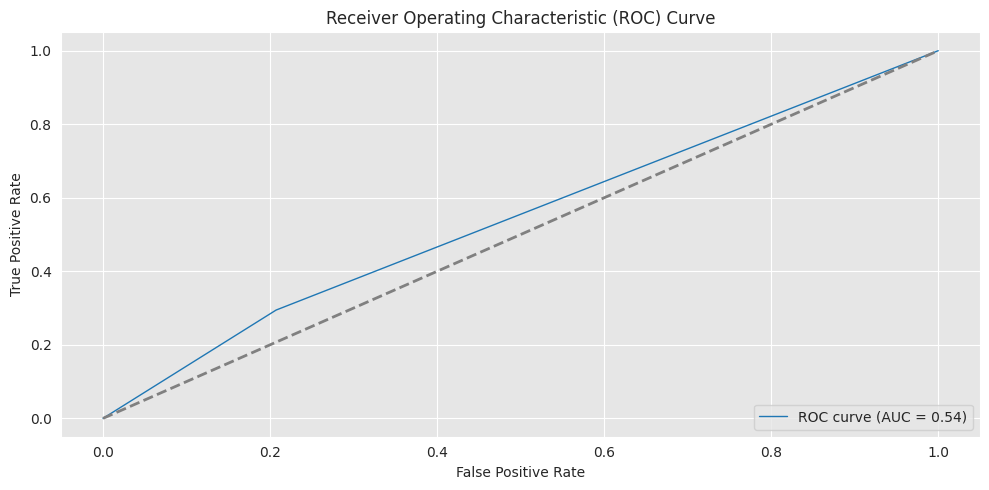

In [ ]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_test_predict_DT_Tuned)
roc_auc_DT = auc(fpr_DT, tpr_DT)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr_DT, tpr_DT, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

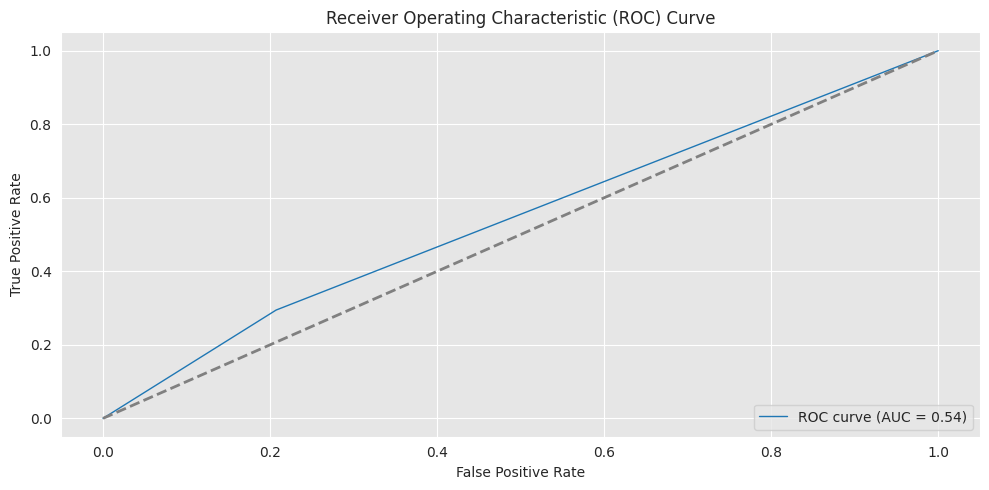

In [ ]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_predict_DT_Tuned)
roc_auc_LR = auc(fpr_LR, tpr_LR)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr_LR, tpr_LR, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

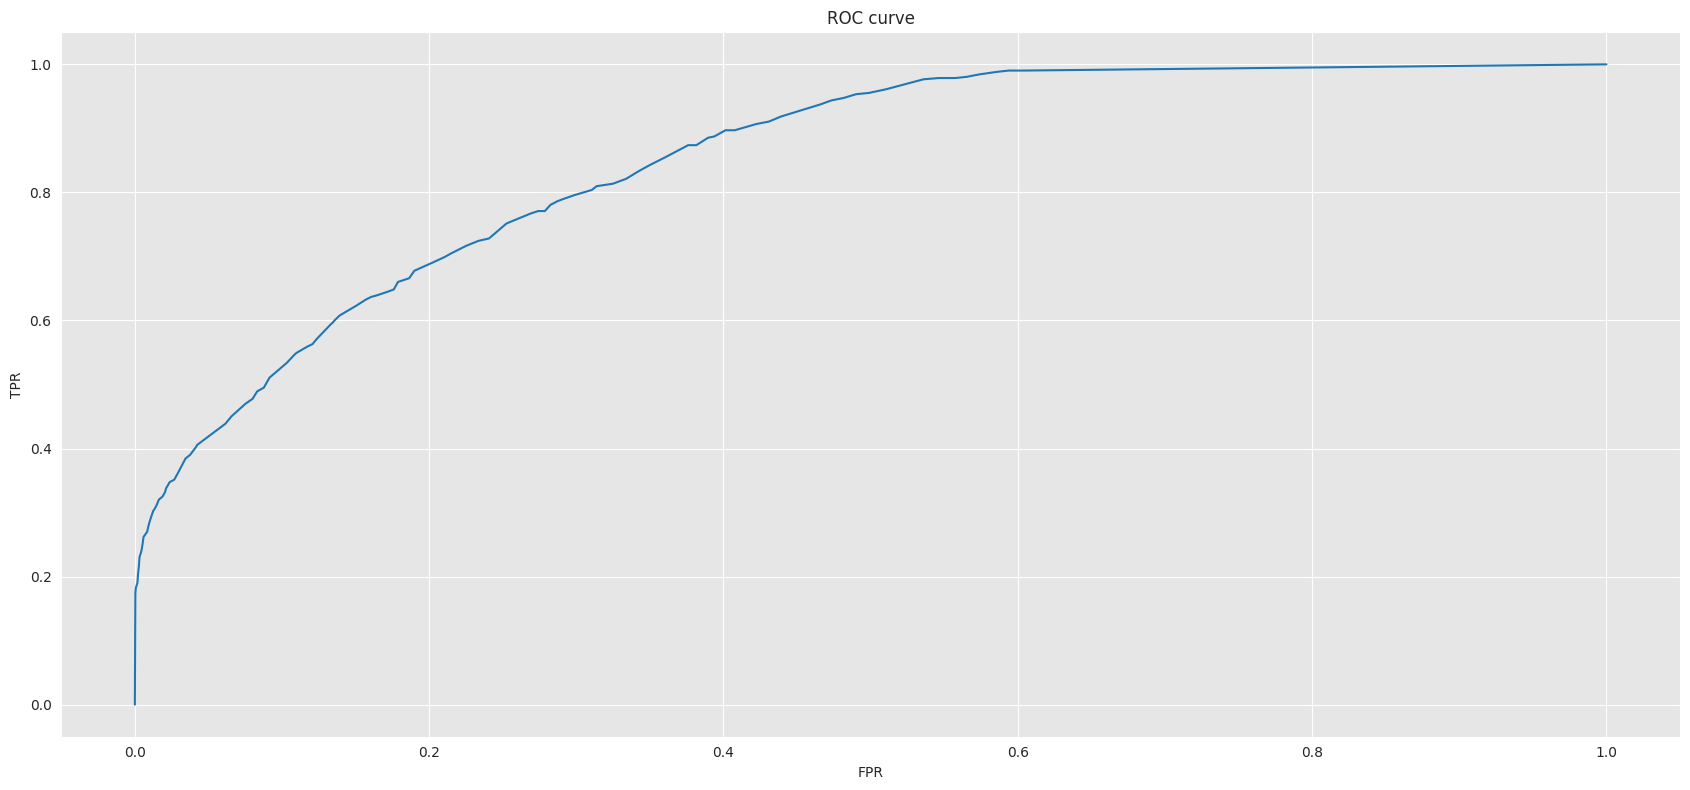

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba_DT_Tuned)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

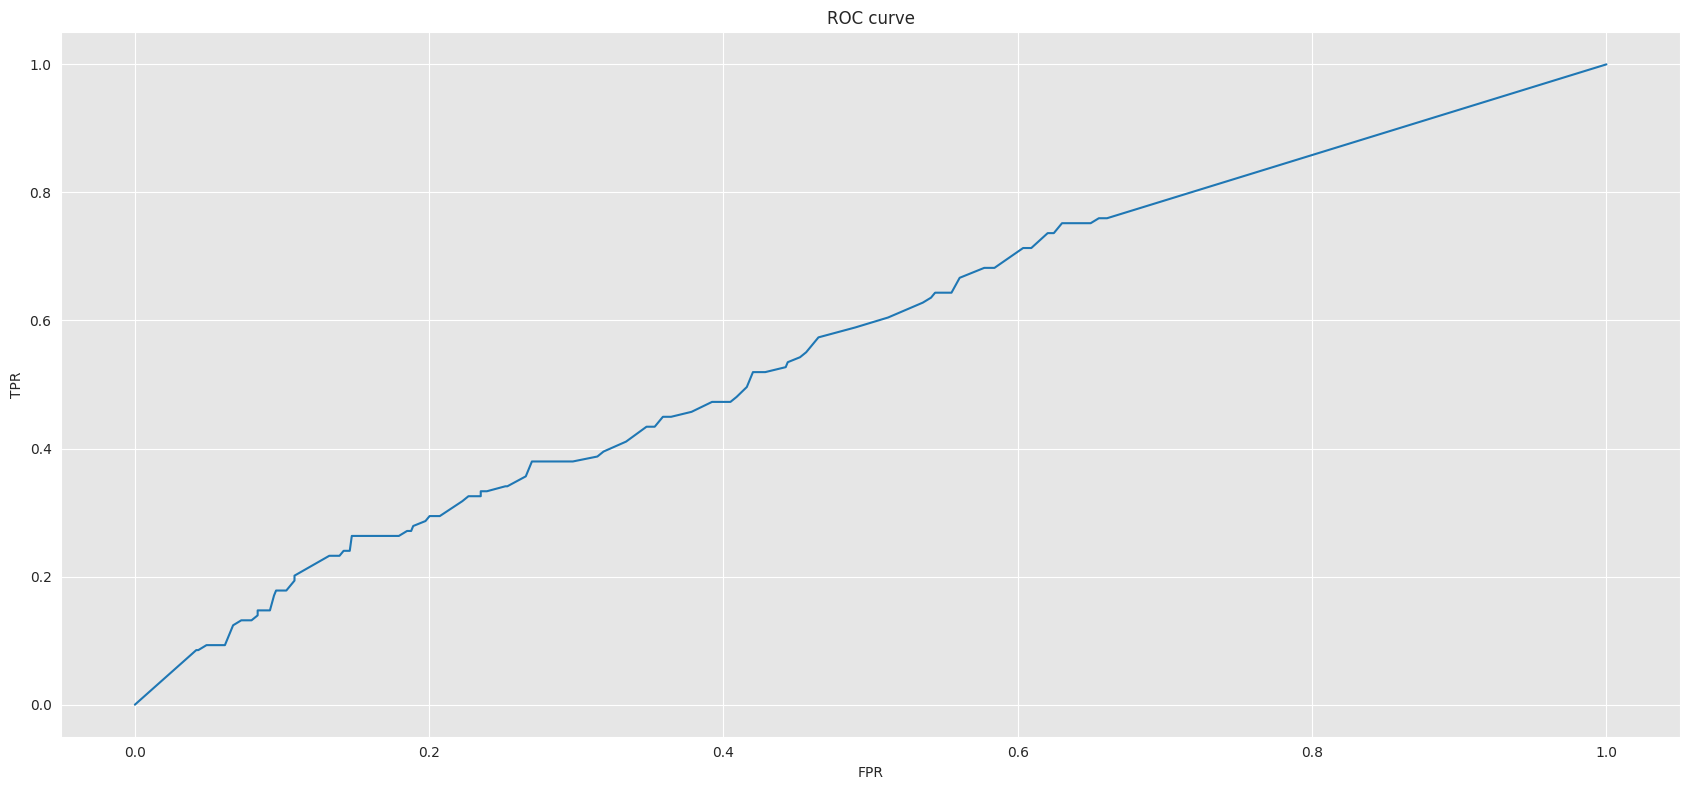

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba_DT_Tuned)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test_predict_DT_Tuned, y_test)

array([[570,  91],
       [149,  38]])

##### Classification Report

In [ ]:
print(classification_report(y_test_predict_DT_Tuned, y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       661
         1.0       0.29      0.20      0.24       187

    accuracy                           0.72       848
   macro avg       0.54      0.53      0.53       848
weighted avg       0.68      0.72      0.70       848



## Random Forest Classifier

### Importing Model Library

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Normal Parameter Training

#### Creating Model Function

In [ ]:
Model_RandomForestClassifier_Normal = RandomForestClassifier(n_estimators = 150, min_samples_split = 10, random_state = 0)

#### Fitting Model

In [ ]:
Model_RandomForestClassifier_Normal.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=0)

#### Predicting

In [ ]:
y_train_proba_RF_normal = Model_RandomForestClassifier_Normal.predict_proba(X_train)
y_test_proba_RF_normal = Model_RandomForestClassifier_Normal.predict_proba(X_test)

In [ ]:
y_train_pred_RF_normal = Model_RandomForestClassifier_Normal.predict(X_train)
y_test_pred_RF_normal = Model_RandomForestClassifier_Normal.predict(X_test)

#### Model Evaluations

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_pred_RF_normal)

array([[713,   6],
       [126,   3]])

<Axes: >

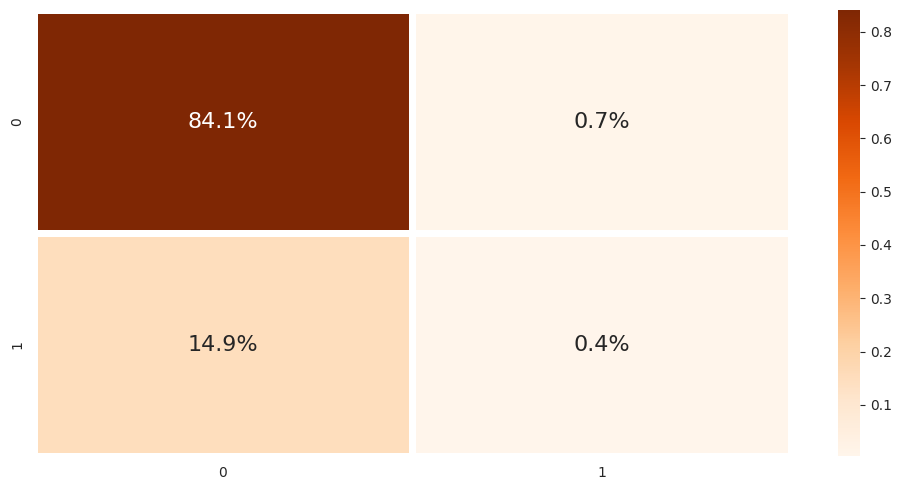

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_test_pred_RF_normal)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_RF_normal))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred_RF_normal))

Training Accuracy:  0.9165191740412979
Testing Accuracy:  0.8443396226415094


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_pred_RF_normal))
print('Testing Recall: ', recall_score(y_test, y_test_pred_RF_normal))

Training Recall:  0.45048543689320386
Testing Recall:  0.023255813953488372


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_pred_RF_normal))
print('Testing Precision: ', precision_score(y_test, y_test_pred_RF_normal))

Training Precision:  1.0
Testing Precision:  0.3333333333333333


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_pred_RF_normal))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred_RF_normal))

Training F1-Score:  0.6211512717536813
Testing F1-Score:  0.04347826086956522


#### Model Results

##### Classification Report (Precision, Recall & F1 Score)

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_DT = classification_report(y_test, y_test_predict_DT_Tuned, output_dict=True)
pd.DataFrame(classification_report_DT)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.862330    0.203209  0.716981    0.532769      0.762063
recall       0.792768    0.294574  0.716981    0.543671      0.716981
f1-score     0.826087    0.240506  0.716981    0.533297      0.737007
support    719.000000  129.000000  0.716981  848.000000    848.000000

##### ROC Curve

In [ ]:
roc_auc_score(y_train, y_train_proba_RF_normal[:,1])

0.996837146475306

In [ ]:
roc_auc_score(y_test, y_test_proba_RF_normal[:,1])

0.6515185820098974

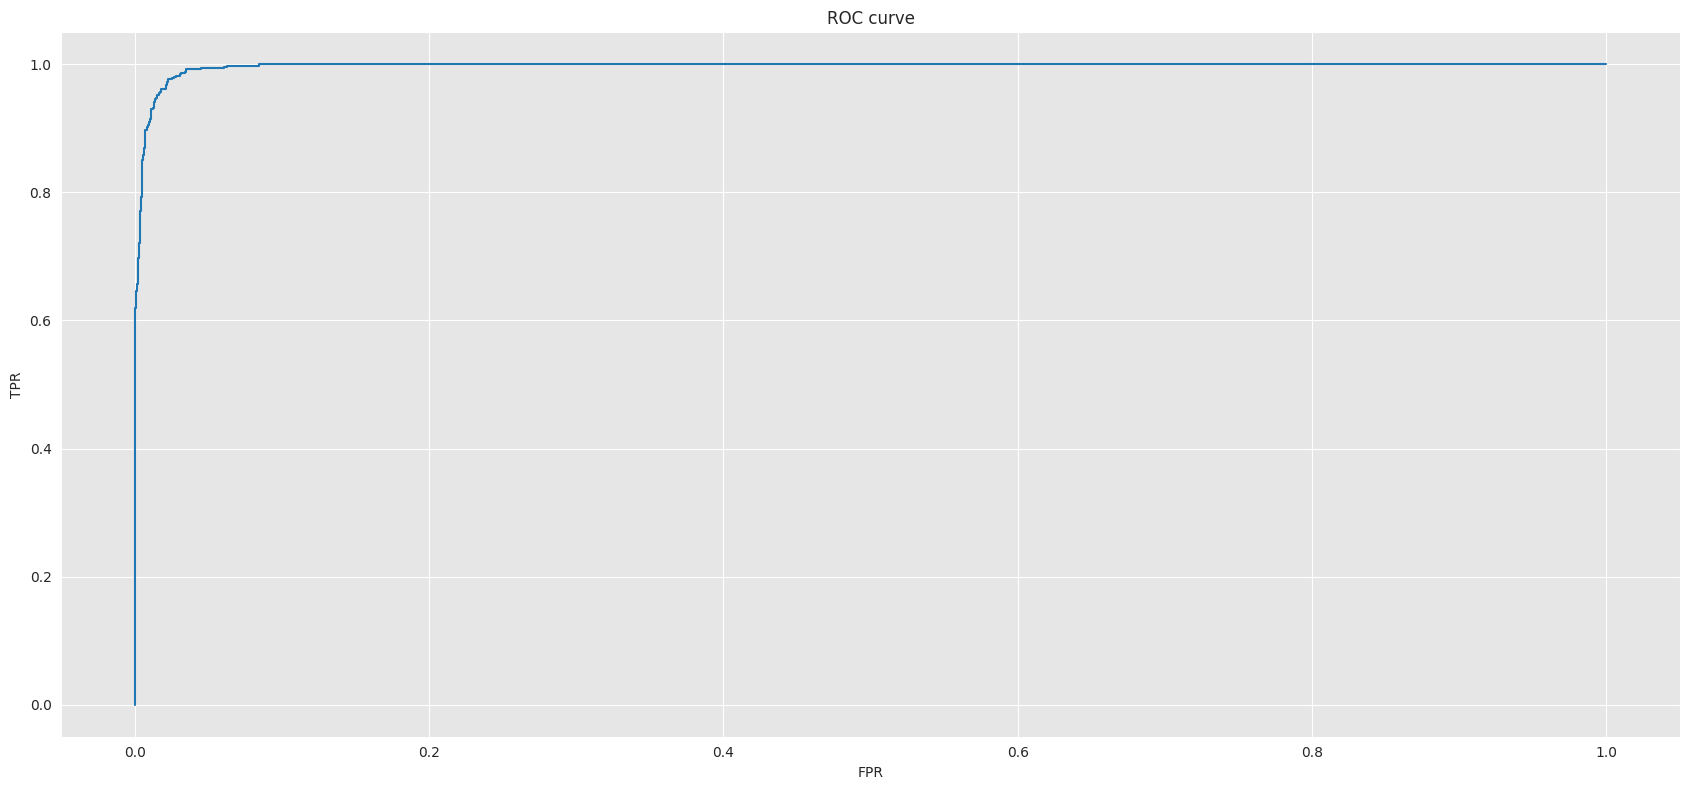

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba_RF_normal[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

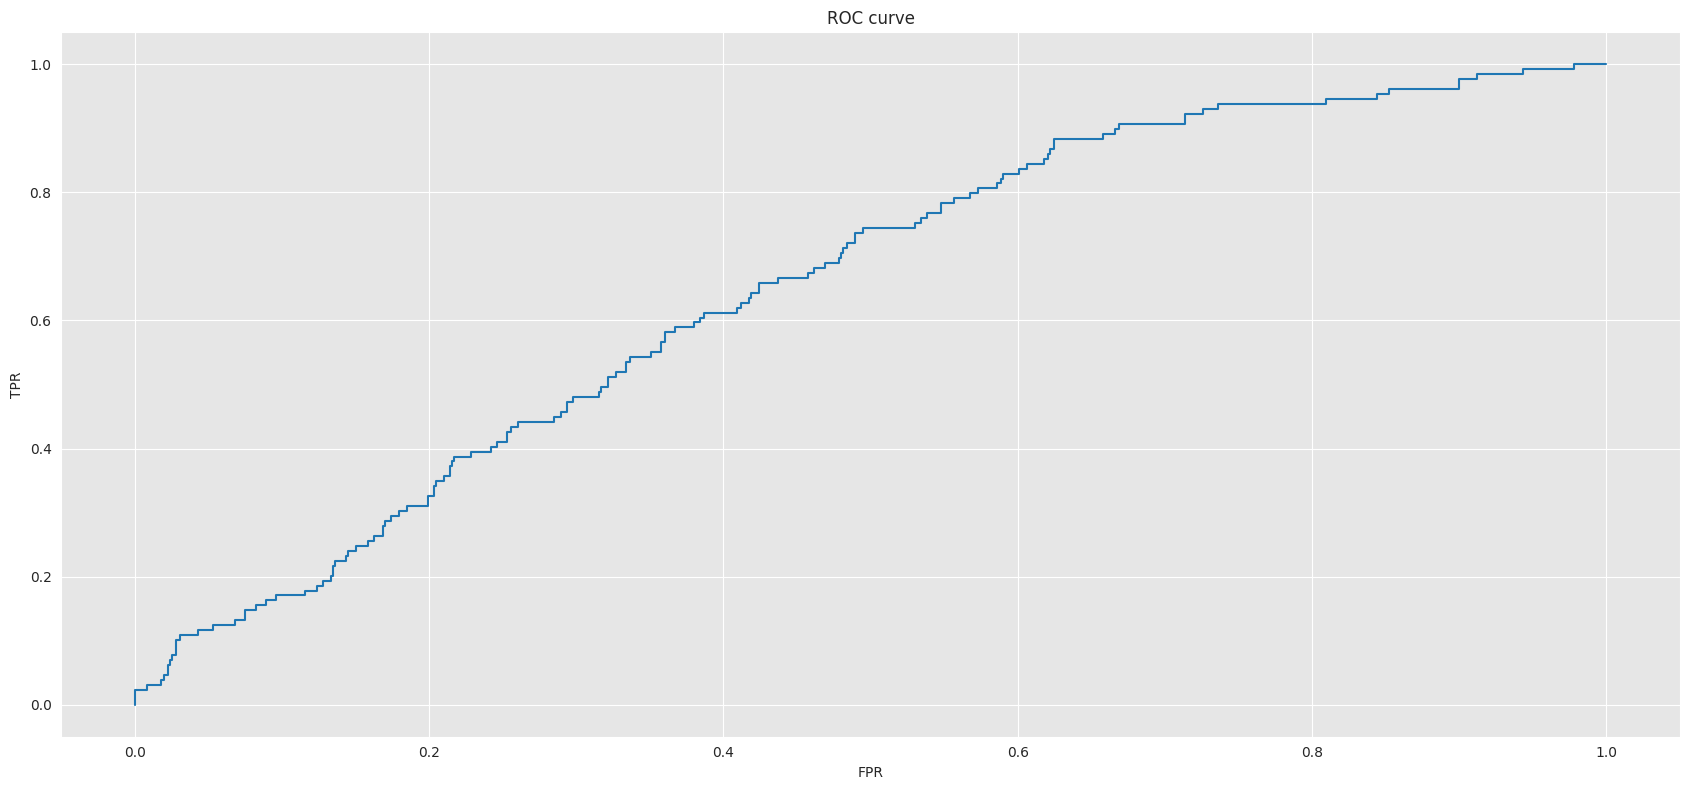

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba_RF_normal[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Tuned Parameter Training

#### Defining Tuning Parameters

In [ ]:
n_estimators = [5,20,50,100]                                    # number of trees in the random forest
max_features = ['sqrt']                                         # number of features in consideration at every split ('auto' is deprecated)
max_depth    = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10]                                  # minimum sample number to split a node
min_samples_leaf = [1, 3, 4]                                    # minimum sample number that can be stored in a leaf node
bootstrap = [True, False]                                       # method used to sample data points

hyperparameters_RF = {'n_estimators': n_estimators,
                      'max_features': max_features,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap
                      }

#### Creating GridSearchCV Model

In [ ]:
# Creating GridSearchCV Model
Model_GridSearchCV_RF_Tuned = GridSearchCV(Model_RandomForestClassifier_Normal, hyperparameters_RF, cv = 5, scoring = 'roc_auc')

#### Creating RandomizedSearchCV Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Model_RandomizedSearchCV_RF_Tuned = RandomizedSearchCV(estimator = Model_RandomForestClassifier_Normal,
                                      param_distributions = hyperparameters_RF,
                                      n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
Model_RandomizedSearchCV_RF_Tuned

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(min_samples_split=10,
                                                    n_estimators=150,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

#### Fitting data into RandomizedSearchCV

In [ ]:
Model_RandomizedSearchCV_RF_Tuned.fit(X_train_resampled[feature_list] , y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(min_samples_split=10,
                                                    n_estimators=150,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
# Fitting data into GridSearchCV
# WAY TOO TIME CONSUMING
# Model_GridSearchCV_RF_Tuned.fit(X_train_resampled[feature_list] , y_train_resampled),

#### Obtaining best Hyperparameters results and Model Score

In [ ]:
print(Model_RandomizedSearchCV_RF_Tuned.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=40, random_state=0)


In [ ]:
# Obtaining best Hyperparameters results and Model Score
print(Model_RandomizedSearchCV_RF_Tuned.best_params_, Model_RandomizedSearchCV_RF_Tuned.best_score_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False} 0.8802964827634432


In [ ]:
print(Model_RandomizedSearchCV_RF_Tuned.cv_results_)

{'mean_fit_time': array([0.23722939, 0.05574284, 0.15735846, 0.06139345, 0.04449329,
       0.13752685, 0.43609486, 0.59574065, 0.39868774, 0.19343095,
       0.82843857, 0.09402709, 0.51473141, 1.06939473, 1.09821391,
       0.04643154, 0.53931379, 0.81983771, 0.24318447, 0.98539877,
       0.56154633, 0.16492963, 0.77820392, 0.05732884, 0.04050813,
       0.57341437, 0.54484668, 0.16017418, 0.39646106, 0.61878681,
       0.24570498, 0.09076796, 0.40828433, 1.40539188, 0.04516177,
       0.15860882, 0.04587379, 1.10902824, 0.77640128, 0.04845538,
       0.90132322, 0.29001393, 0.31601419, 0.12193155, 0.33789802,
       0.16515603, 0.05914454, 0.17986174, 0.06779881, 0.16544485,
       0.40369282, 0.17561851, 1.08446612, 0.22084484, 1.01868024,
       0.16235986, 0.25011535, 0.74925618, 1.26411867, 0.86639371,
       0.53959231, 0.21550841, 0.0583919 , 0.04512596, 0.06339207,
       0.80732059, 1.26276212, 0.65007424, 0.23004975, 0.78935971,
       0.53461323, 1.0931983 , 0.2169179 , 0

In [ ]:
best_estimator_RF = Model_RandomizedSearchCV_RF_Tuned.best_estimator_
best_estimator_RF

RandomForestClassifier(bootstrap=False, max_depth=40, random_state=0)

#### Predicting

In [ ]:
y_train_proba_RF_Tuned = Model_RandomizedSearchCV_RF_Tuned.predict_proba(X_train[feature_list])[:,1]
y_test_proba_RF_Tuned = Model_RandomizedSearchCV_RF_Tuned.predict_proba(X_test[feature_list])[:,1]

In [ ]:
y_train_predict_RF_Tuned = Model_RandomizedSearchCV_RF_Tuned.predict(X_train[feature_list])
y_test_predict_RF_Tuned = Model_RandomizedSearchCV_RF_Tuned.predict(X_test[feature_list])

#### Checking Threshold Value

In [ ]:
# Threshold value can be adjusted to prioritize certain types of errors over others.
# ex: customize threshold to increase sensitivity  to patience with the disease (reduce false negative)
# y_pred_test_LR_Tuned = (y_test_proba_RF_Tuned > 0.5).astype(int)

#### Obtaining Model Coefficients

In [ ]:
# Model Coefficients
# Model_RandomizedSearchCV_RF_Tuned.best_estimator_.coef_
Model_RandomizedSearchCV_RF_Tuned.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, random_state=0)

#### Model Intercepts

In [ ]:
# Model Intercepts
# Model_RandomizedSearchCV_RF_Tuned.best_estimator_.intercept_

In [ ]:
pd.DataFrame(y_test_proba_RF_Tuned)

0
0    0.58
1    0.48
2    0.49
3    0.46
4    0.60
..    ...
843  0.33
844  0.34
845  0.03
846  0.16
847  0.34

[848 rows x 1 columns]

#### Fitting Data into the Model

In [ ]:
# Model_RandomizedSearchCV_RF_Tuned.fit(X_train, y_train)

#### Model Evaluation

##### Accuracy Score

In [ ]:
accuracy_RF = accuracy_score(y_test_predict_RF_Tuned, y_test)*100
print('Accuracy score for Random Forest is %f'%accuracy_RF)

Accuracy score for Random Forest is 79.127358


##### Training Score

In [ ]:
train_score_RF = Model_RandomizedSearchCV_RF_Tuned.score(X_train[feature_list], y_train)*100
print('Train score for Random Forest is %f'%train_score_RF)

Train score for Random Forest is 99.439528


##### Difference between Training and Testing Score

In [ ]:
print('Difference between train and test scores for Random Forest is : %f'%(train_score_RF - accuracy_RF))

Difference between train and test scores for Random Forest is : 20.312170


#### Model Results

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test_predict_RF_Tuned, y_test)

array([[644, 102],
       [ 75,  27]])

<Axes: >

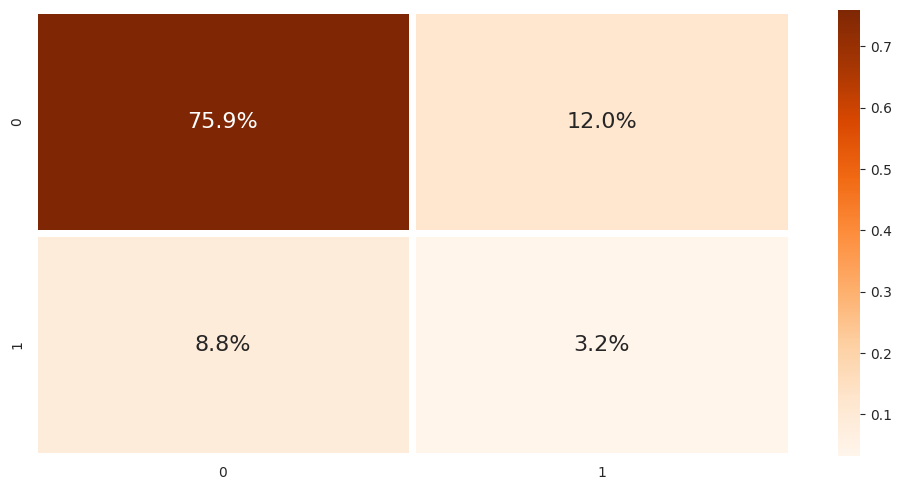

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test_predict_RF_Tuned, y_test)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_predict_RF_Tuned))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_predict_RF_Tuned))

Training Accuracy:  0.9943952802359882
Testing Accuracy:  0.7912735849056604


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_predict_RF_Tuned))
print('Testing Precision: ', precision_score(y_test, y_test_predict_RF_Tuned))

Training Precision:  0.975095785440613
Testing Precision:  0.2647058823529412


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_predict_RF_Tuned))
print('Testing Recall: ', recall_score(y_test, y_test_predict_RF_Tuned))

Training Recall:  0.9883495145631068
Testing Recall:  0.20930232558139536


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_predict_RF_Tuned))
print('Testing F1-Score: ', f1_score(y_test, y_test_predict_RF_Tuned))

Training F1-Score:  0.9816779170684669
Testing F1-Score:  0.2337662337662338


##### Classification Report

In [ ]:
print(classification_report(y_test_predict_RF_Tuned, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       746
         1.0       0.21      0.26      0.23       102

    accuracy                           0.79       848
   macro avg       0.55      0.56      0.56       848
weighted avg       0.81      0.79      0.80       848



##### ROC Curve

In [ ]:
roc_auc_score(y_train, y_train_proba_RF_Tuned)

0.9998909244406923

In [ ]:
roc_auc_score(y_test, y_test_proba_RF_Tuned)

0.6461493676618043

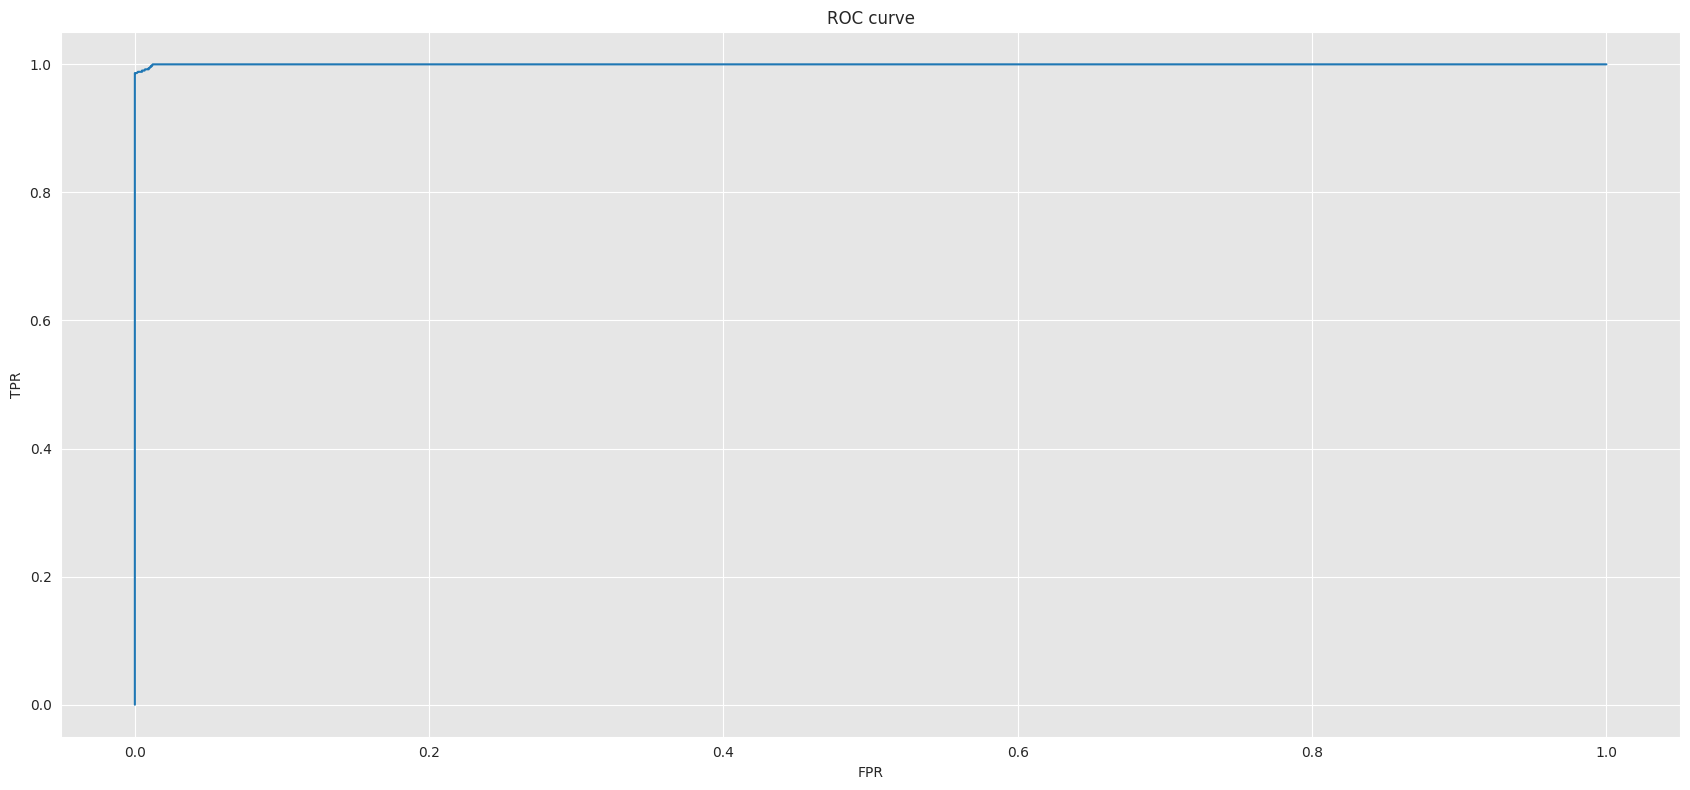

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba_RF_Tuned)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

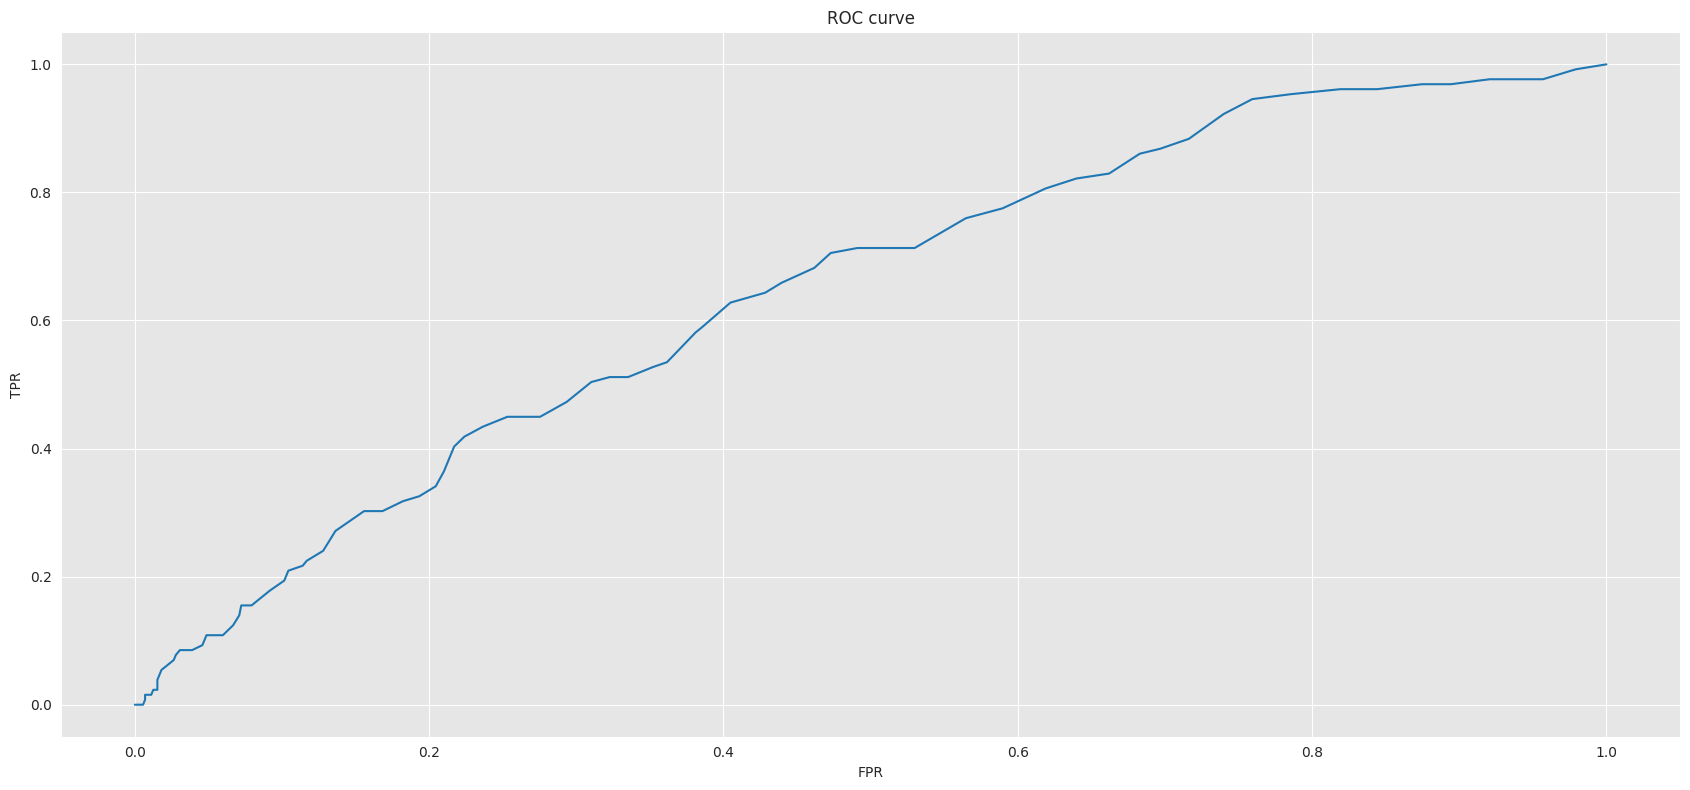

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba_RF_Tuned)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## SVC

### Importing Model Library

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import cross_val_score

### Normal Parameter Training

#### Creating Model Function

In [ ]:
Model_SVC_Normal = SVC(random_state=42, probability=True)

#### Fitting Model

In [ ]:
Model_SVC_Normal.fit(X_train, y_train)

SVC(probability=True, random_state=42)

#### Predicting

In [ ]:
y_train_pred_SVC_normal = Model_SVC_Normal.predict(X_train)
y_test_pred_SVC_normal = Model_SVC_Normal.predict(X_test)

In [ ]:
y_train_proba_SVC_normal = Model_SVC_Normal.predict_proba(X_train)
y_test_proba_SVC_normal = Model_SVC_Normal.predict_proba(X_test)

#### Model Evaluations

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_test_pred_SVC_normal)

array([[719,   0],
       [129,   0]])

<Axes: >

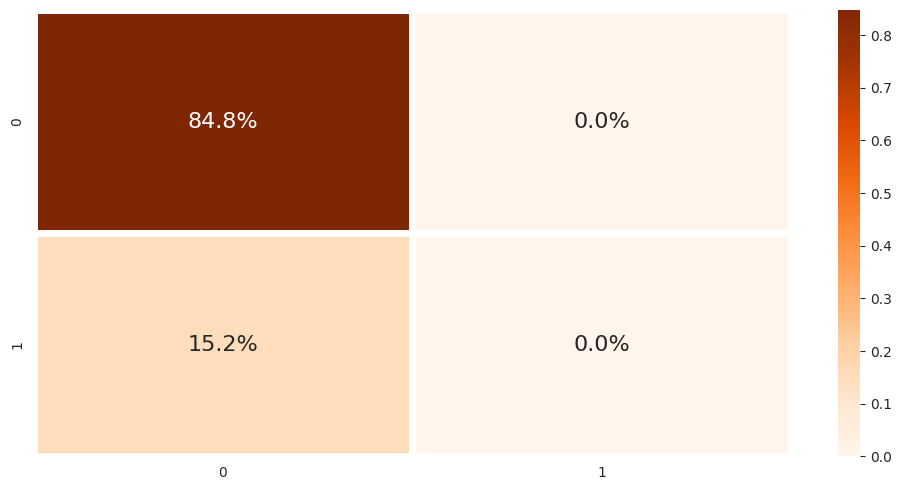

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_test_pred_SVC_normal)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_SVC_normal))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred_SVC_normal))

Training Accuracy:  0.8480825958702065
Testing Accuracy:  0.847877358490566


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_pred_SVC_normal))
print('Testing Precision: ', precision_score(y_test, y_test_pred_SVC_normal))

Training Precision:  0.0
Testing Precision:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_pred_SVC_normal))
print('Testing Recall: ', recall_score(y_test, y_test_pred_SVC_normal))

Training Recall:  0.0
Testing Recall:  0.0


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_pred_SVC_normal))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred_SVC_normal))

Training F1-Score:  0.0
Testing F1-Score:  0.0


#### Modal Results

##### Classification Report

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_SVC = classification_report(y_test, y_test_pred_SVC_normal, output_dict=True)
pd.DataFrame(classification_report_SVC)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0    1.0  accuracy   macro avg  weighted avg
precision    0.847877    0.0  0.847877    0.423939      0.718896
recall       1.000000    0.0  0.847877    0.500000      0.847877
f1-score     0.917677    0.0  0.847877    0.458839      0.778078
support    719.000000  129.0  0.847877  848.000000    848.000000

##### ROC Curve

In [ ]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score_SVC_Normal = Model_SVC_Normal.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_SVC_Normal, train_tpr_SVC_Normal, thresholds_SVC_Normal = roc_curve(y_train, y_train_score_SVC_Normal)

# Calculate the probability scores of each point in the test set
y_test_score_SVC_Normal = Model_SVC_Normal.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_SVC_Normal, test_tpr_SVC_Normal, test_thresholds_SVC_Normal = roc_curve(y_test, y_test_score_SVC_Normal)

Training AUC: 0.7090552975939215


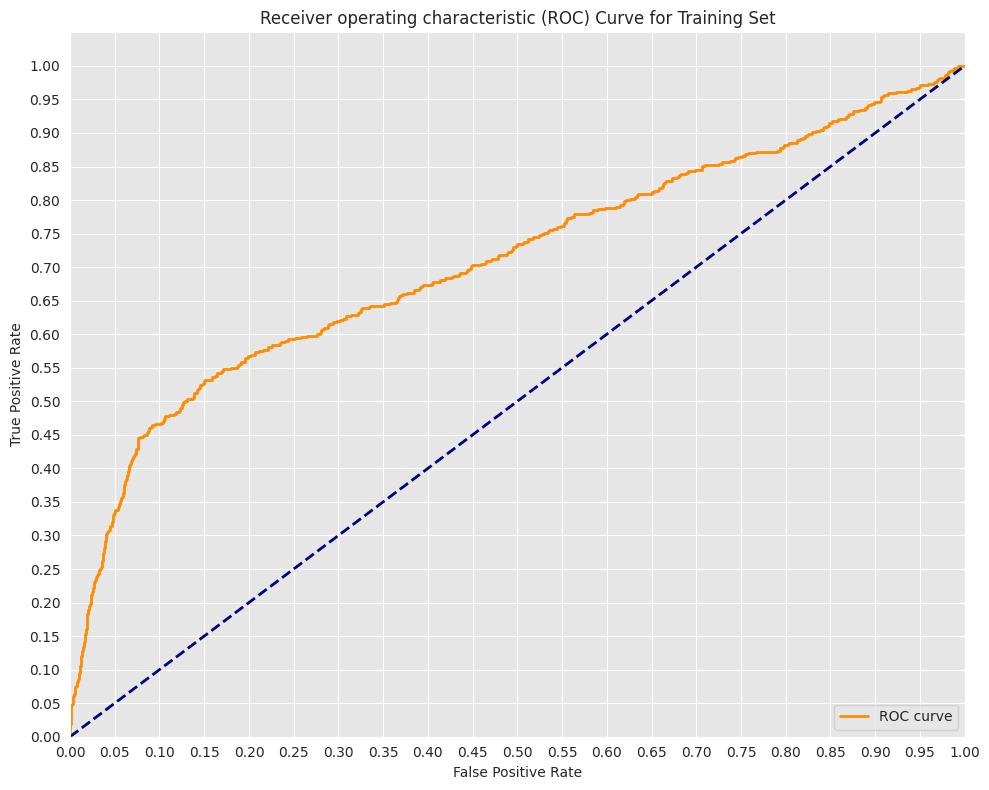

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr_SVC_Normal, train_tpr_SVC_Normal, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr_SVC_Normal, train_tpr_SVC_Normal)))
plt.show()

Test AUC: 0.5548188159696392



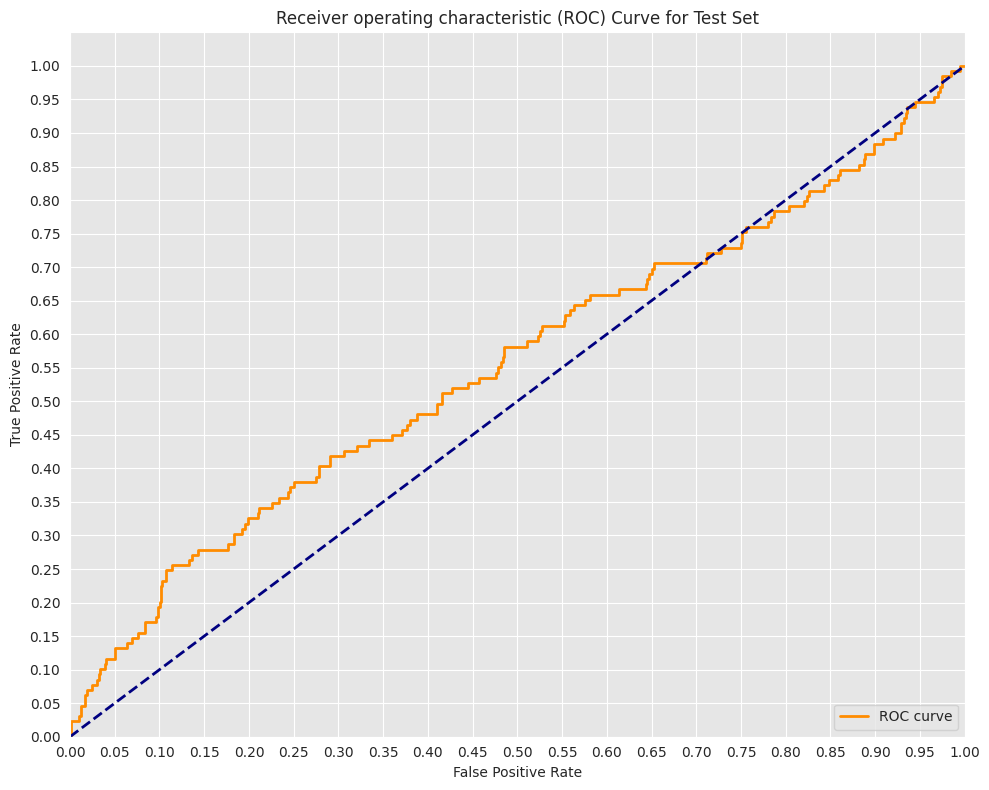

In [ ]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr_SVC_Normal, test_tpr_SVC_Normal, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(test_fpr_SVC_Normal, test_tpr_SVC_Normal)))
print('')
plt.show()

In [ ]:
roc_auc_score(y_train, y_train_proba_SVC_normal[:,1])

0.7090552975939215

In [ ]:
roc_auc_score(y_test, y_test_proba_SVC_normal[:,1])

0.5548188159696392

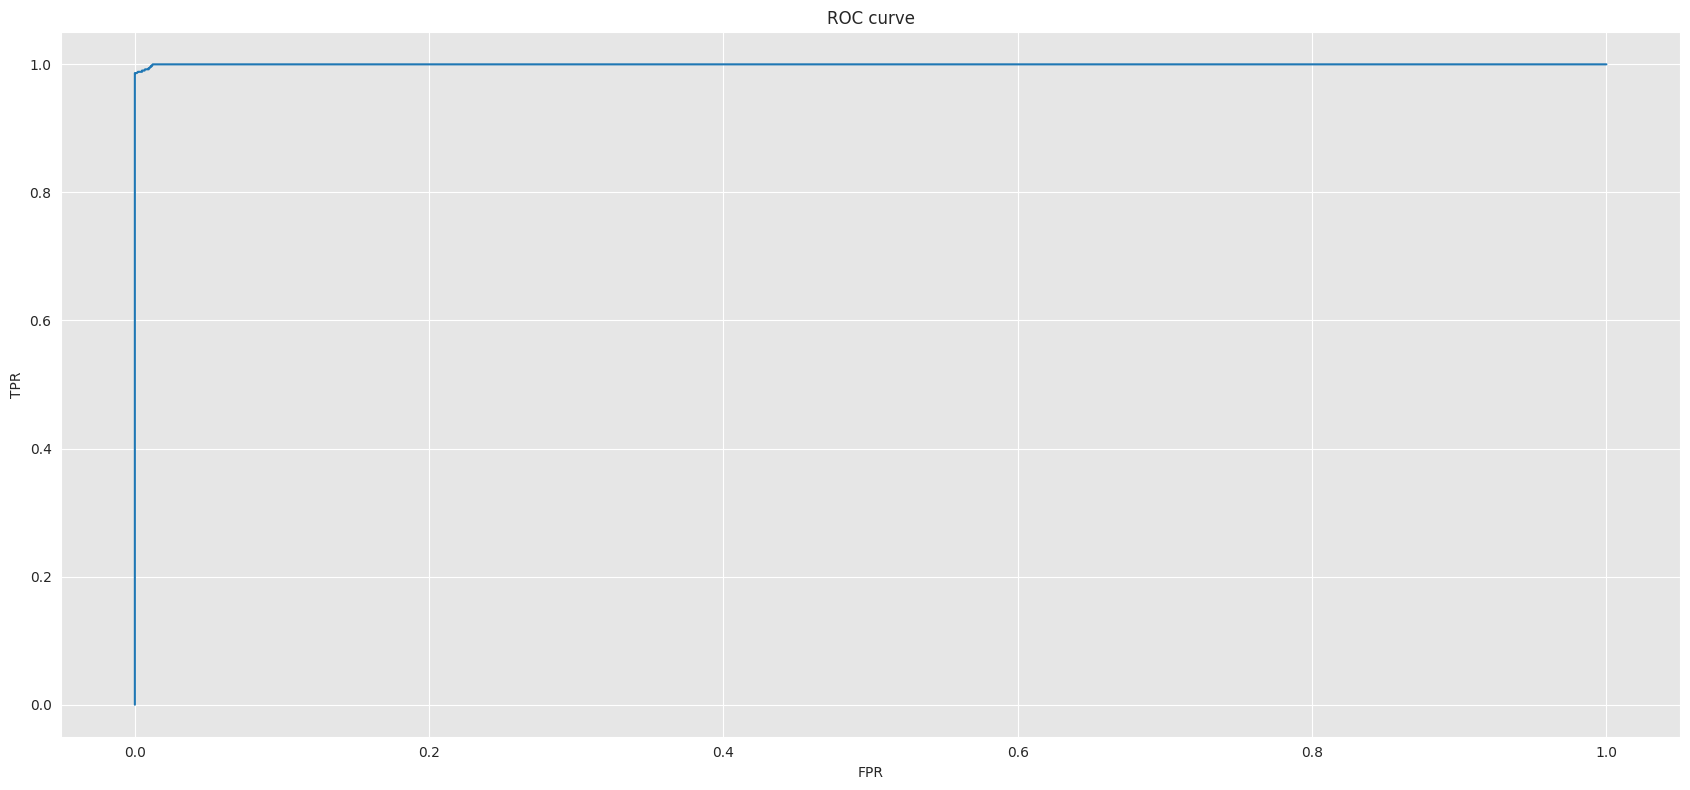

In [ ]:
fpr, tpr, _ = roc_curve(y_train, y_train_proba_RF_Tuned)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

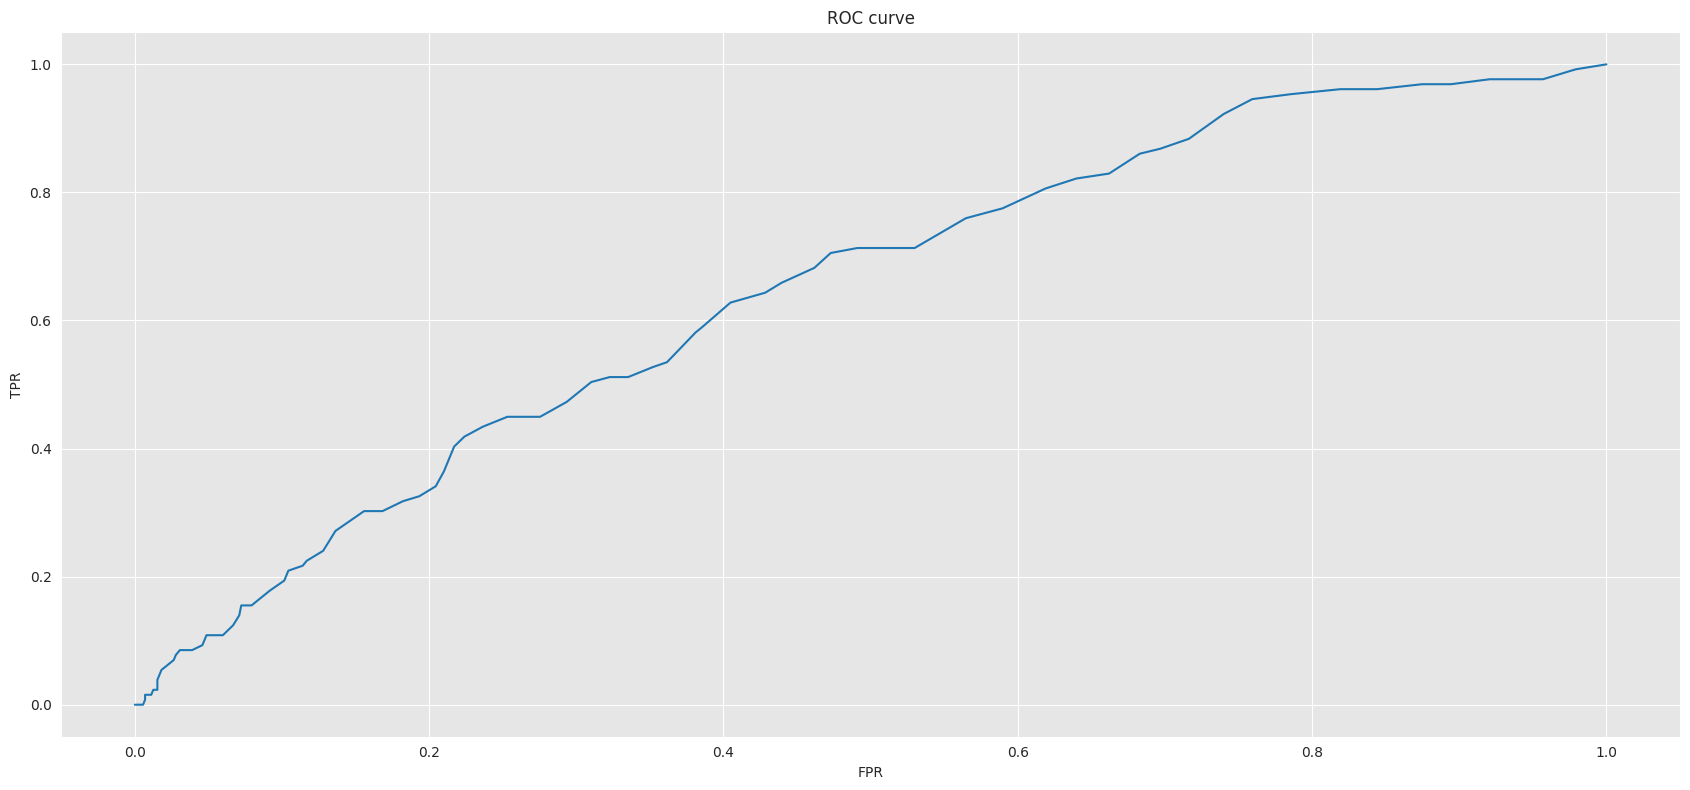

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba_RF_Tuned)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Tuned Parameter Training

#### Defining Tuning Parameters

In [ ]:
hyperparameters_SVC = { 
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5, 6],
    'gamma' : ['scale', 'auto']
}

#### Creating GridSearchCV Model

In [ ]:
# Model_GridSearchCV_SVC_Tuned = GridSearchCV(estimator = Model_SVC_Normal, param_grid = hyperparameters_SVC, cv = 10)

In [ ]:
Model_RandomizedSearchCV_SVC_Tuned = RandomizedSearchCV(estimator = Model_SVC_Normal,
                                      param_distributions = hyperparameters_SVC,
                                      n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

#### Fitting Data into GridSearchCV Model

In [ ]:
Model_RandomizedSearchCV_SVC_Tuned.fit(X_train_resampled[feature_list] , y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'degree': [2, 3, 4, 5, 6],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   random_state=35, verbose=2)

#### Obtaining Model Best Parameters

In [ ]:
print(Model_RandomizedSearchCV_SVC_Tuned.best_params_)
print(Model_RandomizedSearchCV_SVC_Tuned.best_score_)

{'kernel': 'poly', 'gamma': 'scale', 'degree': 6}
0.7265535432642628


#### Predicting

In [ ]:
y_train_proba_SVC_Tuned = Model_RandomizedSearchCV_SVC_Tuned.predict_proba(X_train[feature_list])[:,1]
y_test_proba_SVC_Tuned = Model_RandomizedSearchCV_SVC_Tuned.predict_proba(X_test[feature_list])[:,1]

In [ ]:
y_train_predict_SVC_Tuned = Model_RandomizedSearchCV_SVC_Tuned.predict(X_train[feature_list])
y_test_predict_SVC_Tuned = Model_RandomizedSearchCV_SVC_Tuned.predict(X_test[feature_list])

#### Obtaining Model Coefficients

In [ ]:
# Model Coefficients
Model_RandomizedSearchCV_SVC_Tuned.best_estimator_

SVC(degree=6, kernel='poly', probability=True, random_state=42)

In [ ]:
if(Model_RandomizedSearchCV_SVC_Tuned.best_estimator_.kernel == 'linear'):
  print(Model_RandomizedSearchCV_SVC_Tuned.best_estimator_.coef_)
else:
  print("Cofficient is available only when kernel is linear.")

Cofficient is available only when kernel is linear.


### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, auc

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

##### Confusion Matrix

In [ ]:
confusion_matrix(y_test_predict_SVC_Tuned, y_test)

array([[546,  72],
       [173,  57]])

<Axes: >

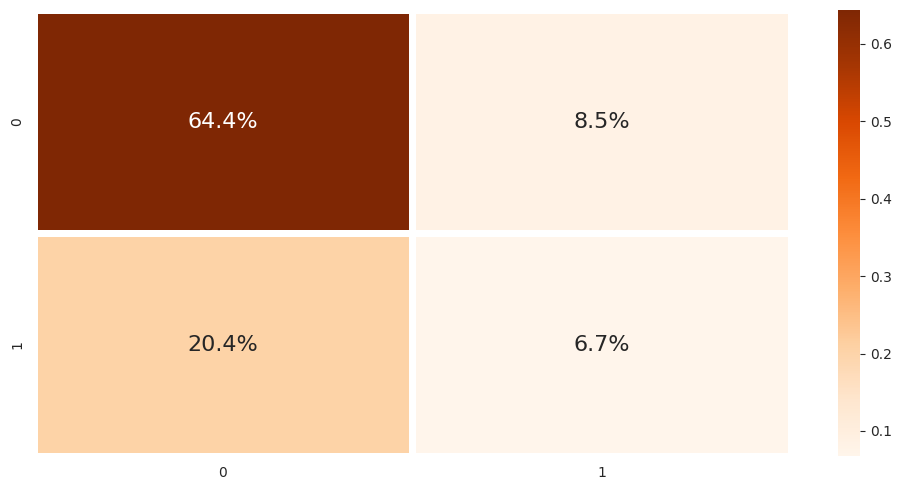

In [ ]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test_predict_SVC_Tuned, y_test) 
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.1%', cmap='Oranges', linewidths=5, annot_kws={"fontsize":16})

##### Accuracy

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_predict_SVC_Tuned))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_predict_SVC_Tuned))

Training Accuracy:  0.7699115044247787
Testing Accuracy:  0.7110849056603774


##### Precision

In [ ]:
print('Training Precision: ', precision_score(y_train, y_train_predict_SVC_Tuned))
print('Testing Precision: ', precision_score(y_test, y_test_predict_SVC_Tuned))

Training Precision:  0.36297828335056875
Testing Precision:  0.24782608695652175


##### Recall

In [ ]:
print('Training Recall: ', recall_score(y_train, y_train_predict_SVC_Tuned))
print('Testing Recall: ', recall_score(y_test, y_test_predict_SVC_Tuned))

Training Recall:  0.6815533980582524
Testing Recall:  0.4418604651162791


##### F1-Score

In [ ]:
print('Training F1-Score: ', f1_score(y_train, y_train_predict_SVC_Tuned))
print('Testing F1-Score: ', f1_score(y_test, y_test_predict_SVC_Tuned))

Training F1-Score:  0.4736842105263157
Testing F1-Score:  0.31754874651810583


### Model Results

##### Classification Report (Precision, Recall & F1 Score)

In [ ]:
# Classification Report (Precision, Recall & F1 Score)
classification_report_SVC = classification_report(y_test, y_test_predict_SVC_Tuned, output_dict=True)
pd.DataFrame(classification_report_SVC)

0.0         1.0  accuracy   macro avg  weighted avg
precision    0.883495    0.247826  0.711085    0.565661      0.786795
recall       0.759388    0.441860  0.711085    0.600624      0.711085
f1-score     0.816754    0.317549  0.711085    0.567151      0.740814
support    719.000000  129.000000  0.711085  848.000000    848.000000

##### ROC Curve

In [ ]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score_SVC_Tuned = Model_RandomizedSearchCV_SVC_Tuned.decision_function(X_train[feature_list])

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr_SVC_Tuned, train_tpr_SVC_Tuned, thresholds_SVC_Tuned = roc_curve(y_train, y_train_score_SVC_Tuned)

# Calculate the probability scores of each point in the test set
y_test_score_SVC_Tuned = Model_RandomizedSearchCV_SVC_Tuned.decision_function(X_test[feature_list])

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr_SVC_Tuned, test_tpr_SVC_Tuned, test_thresholds_SVC_Tuned = roc_curve(y_test, y_test_score_SVC_Tuned)

Training AUC: 0.8002053186998734


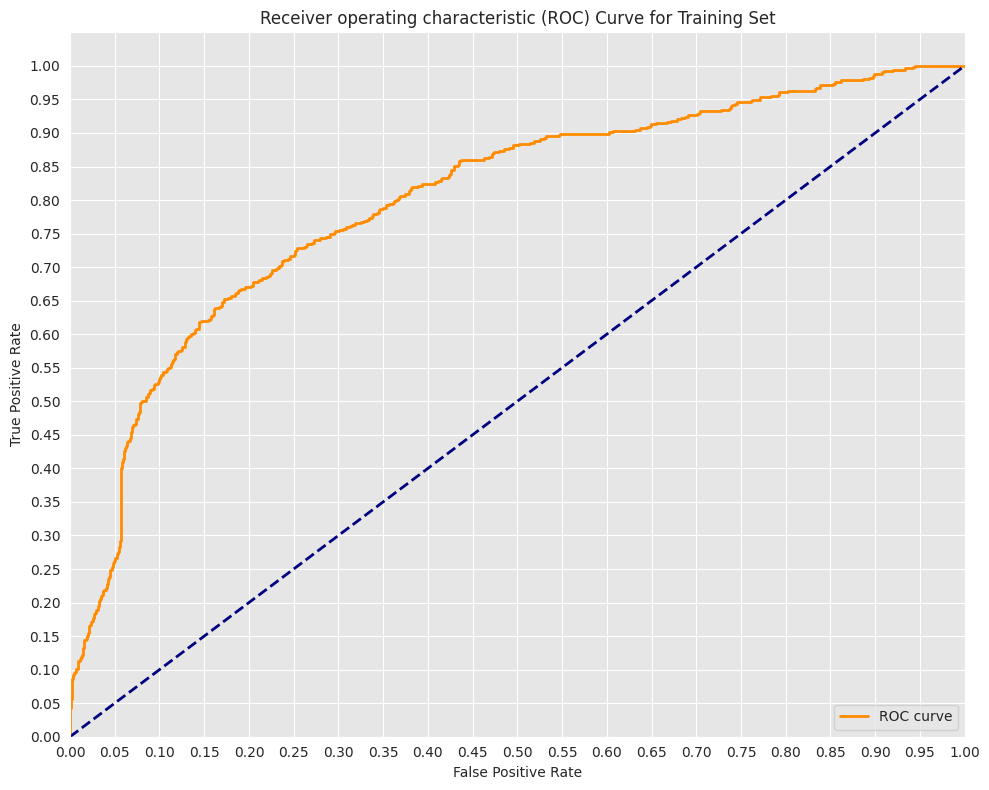

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr_SVC_Tuned, train_tpr_SVC_Tuned, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr_SVC_Tuned, train_tpr_SVC_Tuned)))
plt.show()

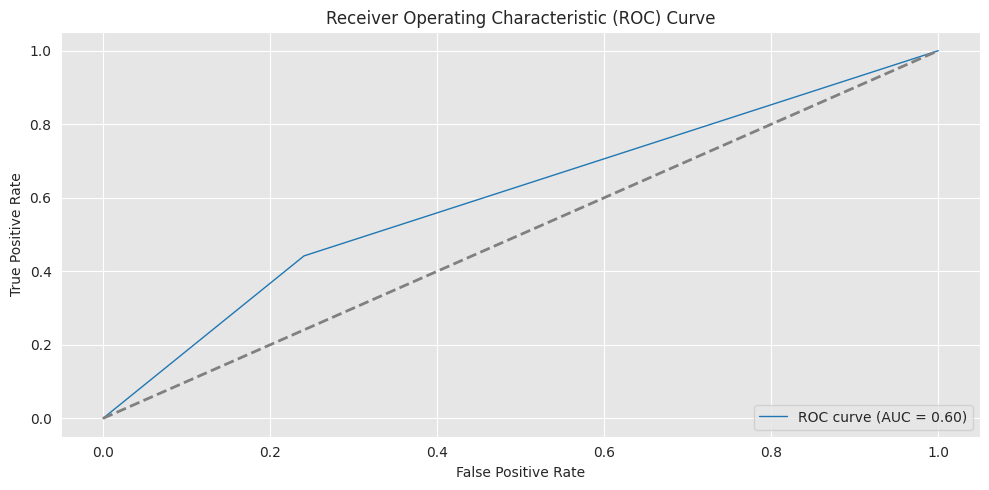

In [ ]:
#Roc curve
#pass value in to roc_curve variable: fpr, tpr, thresholds
fpr_SVC, tpr_SVC, thresholds_SVC = roc_curve(y_test, y_test_predict_SVC_Tuned)
roc_auc_SVC = auc(fpr_SVC, tpr_SVC)

#plot it
plt.figure(figsize=(10,5))
plt.plot(fpr_SVC, tpr_SVC, lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc_SVC)
plt.plot([0, 1], [0, 1], '--', color='gray', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Cross Validation Score

In [ ]:
Model_GridSearchCV = SVC(degree = 2, gamma = 'scale', kernel= 'poly')
print(cross_val_score(Model_RandomizedSearchCV_SVC_Tuned, X_train, y_train, cv = 10, scoring = 'accuracy'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[0.84660767 0.84955752 0.85250737 0.84955752 0.85840708 0.84365782
 0.84660767 0.84955752 0.85250737 0.84365782]


# Comparison of Results

Out of all the models taken into consideration, the Model with the highest accuracy is the Random Forest Classifier. Hence, this model would be downloaded and used in the interface.

# Saving the Model for User Interface

In [ ]:
#create a pickle file using serialization (for streamlit)
import pickle
pickle_out = open("/content/mydrive/MyDrive/Capstone Project/Heart Disease Prediction/Outputs/Saved Model/model.pk1", "wb")
pickle.dump(Model_RandomForestClassifier_Normal, pickle_out)
pickle_out.close()